In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [11]:
order_items = pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_order_reviews_dataset.csv')
orders_dataset = pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_orders_dataset.csv')
products_dataset = pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/(ÏÉàÏãπ) ÌîÑÎ°úÏ†ùÌä∏ 1/Data/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/(·Ñâ·Ö¢·Ñä·Ö°·Ü®) ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥ 1/Data/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/(·Ñâ·Ö¢·Ñä·Ö°·Ü®) ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥ 1/Data/olist_geolocation_dataset.csv')

# ÌÉÄÍ≤üÏÑ§Ï†ï :
- 1Ï∞®Í∏∞Ï§Ä : 1ÌöåÍµ¨Îß§Ïûê (97%) Ï§ë ÎÜíÏùÄ ÏÉÅÌíàÎßåÏ°±ÎèÑ(Î¶¨Î∑∞ 4,5Ï†ê) Íµ¨Îß§Ïûê ÎåÄÏÉÅ
- 2Ï∞® Í∏∞Ï§Ä : 1Ìöå Íµ¨Îß§ÏûêÏùò Íµ¨Îß§ ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨Í∞Ä ÏÜåÎ™®ÏÑ± /Î∞òÎ≥µÏÑ± ÏûàÎäîÍ≤ΩÏö∞

In [12]:
# ÌÉÄÍ≤üÏÑ§Ï†ï 1 Ï∞® Í∏∞Ï§Ä Ï†ÑÏ≤¥ 99441Î™Ö
# Ïû†Ïû¨Íµ¨Îß§Ïûê 1Ï∞® ÎèÑÏ∂ú (Ïû¨Íµ¨Îß§Ïûê Ï†úÏô∏) 97% 93099Î™Ö
# Ïû†Ïû¨Íµ¨Îß§Ïûê 2Ï∞® ÎèÑÏ∂ú (Í∏∞Ï§Ä1-Î¶¨Î∑∞ 4,5Ï†êÏù¥ÏÉÅ) 76470Î™Ö
# Ïû†Ïû¨Íµ¨Îß§Ïûê ÏµúÏ¢ÖÎèÑÏ∂ú (Í∏∞Ï§Ä2-Î∞òÎ≥µ/ÏÜåÎ™®ÏÑ± Ïπ¥ÌÖåÍ≥†Î¶¨ Íµ¨Îß§Ïûê) 20093Î™Ö(Ï†ÑÏ≤¥Ï§ë 20%, 1ÌöåÍµ¨Îß§ÏûêÏ§ë 22% )


customers.shape

(99441, 5)

In [13]:
customer_counts = customers['customer_unique_id'].value_counts()
single_occurrence_customers = customer_counts[customer_counts == 1].index
single_occurrence_df = customers[customers['customer_unique_id'].isin(single_occurrence_customers)][['customer_unique_id', 'customer_id']]
display(single_occurrence_df)


high_score_orders = order_reviews[order_reviews['review_score'].isin([4, 5])]['order_id']
display(high_score_orders)



high_score_orders_df = pd.DataFrame(high_score_orders, columns=['order_id'])
high_score_customers = pd.merge(high_score_orders_df, orders_dataset[['order_id', 'customer_id']], on='order_id', how='left')
display(high_score_customers)

# Find customer_ids present in both high_score_customers and single_occurrence_df
high_score_and_single_occurrence_customers = pd.merge(high_score_customers, single_occurrence_df, on='customer_id', how='inner')

# Display the resulting DataFrame
display(high_score_and_single_occurrence_customers)

# Step 1: Merge with orders_dataset
merged_customers_orders = pd.merge(high_score_and_single_occurrence_customers, orders_dataset[['order_id', 'customer_id']], on='customer_id', how='inner')

# Display the result of the first merge
display(merged_customers_orders)

# Step 2: Merge with order_items
merged_orders_items = pd.merge(merged_customers_orders, order_items[['order_id', 'product_id']], left_on='order_id_x', right_on='order_id', how='inner')

# Display the result of the second merge
display(merged_orders_items)

# Step 3: Merge with products_dataset
merged_items_products = pd.merge(merged_orders_items, products_dataset[['product_id', 'product_category_name']], on='product_id', how='inner')

# Display the result of the third merge
display(merged_items_products)

# Step 4: Filter by category
specified_categories = [
    'beleza_saude',
    'automotivo',
    'fashion_roupa_feminina',
    'fraldas_higiene',
    'bebidas',
    'fashion_roupa_masculina',
    'utilidades_domesticas',
    'alimentos_bebidas',
    'bebes',
    'alimentos',
    'papelaria'
]

filtered_customers_by_category = merged_items_products[
    merged_items_products['product_category_name'].isin(specified_categories)
]

# Step 5: Select relevant columns and display
final_result = filtered_customers_by_category[['customer_id', 'customer_unique_id', 'order_id_x', 'product_category_name']]
display(final_result)

customer_unique_id                       customer_id
0      861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7
1      290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77
2      060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03
3      259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3
4      345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad
...                                 ...                               ...
99436  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f
99437  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8
99438  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e
99439  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9
99440  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8

[93099 rows x 2 columns]

0        73fc7af87114b39712e6da79b0a377eb
1        a548910a1c6147796b98fdf73dbeba33
2        f9e4b658b201a9f2ecdecbb34bed034b
3        658677c97b385a9be170737859d3511b
4        8e6bfb81e283fa7e4f11123a3fb894f1
                       ...               
99218    d699c734a0b1c8111f2272a3f36d398c
99219    2a8c23fee101d4d5662fa670396eb8da
99220    22ec9f0669f784db00fa86d035cf8602
99221    55d4004744368f5571d1f590031933e4
99222    7725825d039fc1f0ceb7635e3f7d9206
Name: order_id, Length: 76470, dtype: object

order_id                       customer_id
0      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104
1      a548910a1c6147796b98fdf73dbeba33  8a2e7ef9053dea531e4dc76bd6d853e6
2      f9e4b658b201a9f2ecdecbb34bed034b  e226dfed6544df5b7b87a48208690feb
3      658677c97b385a9be170737859d3511b  de6dff97e5f1ba84a3cd9a3bc97df5f6
4      8e6bfb81e283fa7e4f11123a3fb894f1  5986b333ca0d44534a156a52a8e33a83
...                                 ...                               ...
76465  d699c734a0b1c8111f2272a3f36d398c  0c7e5a2123d793a5b2059cca7f650dc8
76466  2a8c23fee101d4d5662fa670396eb8da  d8c466a3e7c4cda36cd4ae7d577f44f4
76467  22ec9f0669f784db00fa86d035cf8602  d0d7086dea6fcf42b9b690b9f3745c58
76468  55d4004744368f5571d1f590031933e4  fcc7b1caafe3b77fd587bab964c4d1fb
76469  7725825d039fc1f0ceb7635e3f7d9206  3aa00401736823c73e9fe8683328fa6b

[76470 rows x 2 columns]

order_id                       customer_id  \
0      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
1      a548910a1c6147796b98fdf73dbeba33  8a2e7ef9053dea531e4dc76bd6d853e6   
2      f9e4b658b201a9f2ecdecbb34bed034b  e226dfed6544df5b7b87a48208690feb   
3      658677c97b385a9be170737859d3511b  de6dff97e5f1ba84a3cd9a3bc97df5f6   
4      8e6bfb81e283fa7e4f11123a3fb894f1  5986b333ca0d44534a156a52a8e33a83   
...                                 ...                               ...   
71236  d699c734a0b1c8111f2272a3f36d398c  0c7e5a2123d793a5b2059cca7f650dc8   
71237  2a8c23fee101d4d5662fa670396eb8da  d8c466a3e7c4cda36cd4ae7d577f44f4   
71238  22ec9f0669f784db00fa86d035cf8602  d0d7086dea6fcf42b9b690b9f3745c58   
71239  55d4004744368f5571d1f590031933e4  fcc7b1caafe3b77fd587bab964c4d1fb   
71240  7725825d039fc1f0ceb7635e3f7d9206  3aa00401736823c73e9fe8683328fa6b   

                     customer_unique_id  
0      68a5590b9926689be4e10f4ae2db21a8  
1      64190b91b656ab8f37eb89b93dc84584  
2      1d47144362c14e94ccdd213e8ec277d5  
3      c8cf6cb6b838dc7a33ed199b825e8616  
4      d16000272660a1fef81482ad75ba572a  
...                                 ...  
71236  00db0070b3c3bd0215072323c8499407  
71237  50605c81f77a2171191dffee444613b2  
71238  597cbb334f18a671472f7e16648228b4  
71239  c860357db400d72a2497064f8376fba9  
71240  96ac4cb74918d3ace141d3d3ddc1ff02  

[71241 rows x 3 columns]

order_id_x                       customer_id  \
0      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
1      a548910a1c6147796b98fdf73dbeba33  8a2e7ef9053dea531e4dc76bd6d853e6   
2      f9e4b658b201a9f2ecdecbb34bed034b  e226dfed6544df5b7b87a48208690feb   
3      658677c97b385a9be170737859d3511b  de6dff97e5f1ba84a3cd9a3bc97df5f6   
4      8e6bfb81e283fa7e4f11123a3fb894f1  5986b333ca0d44534a156a52a8e33a83   
...                                 ...                               ...   
71236  d699c734a0b1c8111f2272a3f36d398c  0c7e5a2123d793a5b2059cca7f650dc8   
71237  2a8c23fee101d4d5662fa670396eb8da  d8c466a3e7c4cda36cd4ae7d577f44f4   
71238  22ec9f0669f784db00fa86d035cf8602  d0d7086dea6fcf42b9b690b9f3745c58   
71239  55d4004744368f5571d1f590031933e4  fcc7b1caafe3b77fd587bab964c4d1fb   
71240  7725825d039fc1f0ceb7635e3f7d9206  3aa00401736823c73e9fe8683328fa6b   

                     customer_unique_id                        order_id_y  
0      68a5590b9926689be4e10f4ae2db21a8  73fc7af87114b39712e6da79b0a377eb  
1      64190b91b656ab8f37eb89b93dc84584  a548910a1c6147796b98fdf73dbeba33  
2      1d47144362c14e94ccdd213e8ec277d5  f9e4b658b201a9f2ecdecbb34bed034b  
3      c8cf6cb6b838dc7a33ed199b825e8616  658677c97b385a9be170737859d3511b  
4      d16000272660a1fef81482ad75ba572a  8e6bfb81e283fa7e4f11123a3fb894f1  
...                                 ...                               ...  
71236  00db0070b3c3bd0215072323c8499407  d699c734a0b1c8111f2272a3f36d398c  
71237  50605c81f77a2171191dffee444613b2  2a8c23fee101d4d5662fa670396eb8da  
71238  597cbb334f18a671472f7e16648228b4  22ec9f0669f784db00fa86d035cf8602  
71239  c860357db400d72a2497064f8376fba9  55d4004744368f5571d1f590031933e4  
71240  96ac4cb74918d3ace141d3d3ddc1ff02  7725825d039fc1f0ceb7635e3f7d9206  

[71241 rows x 4 columns]

order_id_x                       customer_id  \
0      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
1      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
2      a548910a1c6147796b98fdf73dbeba33  8a2e7ef9053dea531e4dc76bd6d853e6   
3      f9e4b658b201a9f2ecdecbb34bed034b  e226dfed6544df5b7b87a48208690feb   
4      658677c97b385a9be170737859d3511b  de6dff97e5f1ba84a3cd9a3bc97df5f6   
...                                 ...                               ...   
78712  d699c734a0b1c8111f2272a3f36d398c  0c7e5a2123d793a5b2059cca7f650dc8   
78713  2a8c23fee101d4d5662fa670396eb8da  d8c466a3e7c4cda36cd4ae7d577f44f4   
78714  22ec9f0669f784db00fa86d035cf8602  d0d7086dea6fcf42b9b690b9f3745c58   
78715  55d4004744368f5571d1f590031933e4  fcc7b1caafe3b77fd587bab964c4d1fb   
78716  7725825d039fc1f0ceb7635e3f7d9206  3aa00401736823c73e9fe8683328fa6b   

                     customer_unique_id                        order_id_y  \
0      68a5590b9926689be4e10f4ae2db21a8  73fc7af87114b39712e6da79b0a377eb   
1      68a5590b9926689be4e10f4ae2db21a8  73fc7af87114b39712e6da79b0a377eb   
2      64190b91b656ab8f37eb89b93dc84584  a548910a1c6147796b98fdf73dbeba33   
3      1d47144362c14e94ccdd213e8ec277d5  f9e4b658b201a9f2ecdecbb34bed034b   
4      c8cf6cb6b838dc7a33ed199b825e8616  658677c97b385a9be170737859d3511b   
...                                 ...                               ...   
78712  00db0070b3c3bd0215072323c8499407  d699c734a0b1c8111f2272a3f36d398c   
78713  50605c81f77a2171191dffee444613b2  2a8c23fee101d4d5662fa670396eb8da   
78714  597cbb334f18a671472f7e16648228b4  22ec9f0669f784db00fa86d035cf8602   
78715  c860357db400d72a2497064f8376fba9  55d4004744368f5571d1f590031933e4   
78716  96ac4cb74918d3ace141d3d3ddc1ff02  7725825d039fc1f0ceb7635e3f7d9206   

                               order_id                        product_id  
0      73fc7af87114b39712e6da79b0a377eb  fd25ab760bfbba13c198fa3b4f1a0cd3  
1      73fc7af87114b39712e6da79b0a377eb  fd25ab760bfbba13c198fa3b4f1a0cd3  
2      a548910a1c6147796b98fdf73dbeba33  be0dbdc3d67d55727a65d4cd696ca73c  
3      f9e4b658b201a9f2ecdecbb34bed034b  d1c427060a0f73f6b889a5c7c61f2ac4  
4      658677c97b385a9be170737859d3511b  52c80cedd4e90108bf4fa6a206ef6b03  
...                                 ...                               ...  
78712  d699c734a0b1c8111f2272a3f36d398c  b9ca577f48894c59a9677f895f9a44bc  
78713  2a8c23fee101d4d5662fa670396eb8da  4fb209073dc2ab6a6d3c259a7c285501  
78714  22ec9f0669f784db00fa86d035cf8602  3a33c980b62eb1ef3b8ae61b6fc6fe55  
78715  55d4004744368f5571d1f590031933e4  8ba0118a487ec8671aed57e5ef846574  
78716  7725825d039fc1f0ceb7635e3f7d9206  73a7fbf8c1048131f3b531af31bcdf0e  

[78717 rows x 6 columns]

order_id_x                       customer_id  \
0      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
1      73fc7af87114b39712e6da79b0a377eb  41dcb106f807e993532d446263290104   
2      a548910a1c6147796b98fdf73dbeba33  8a2e7ef9053dea531e4dc76bd6d853e6   
3      f9e4b658b201a9f2ecdecbb34bed034b  e226dfed6544df5b7b87a48208690feb   
4      658677c97b385a9be170737859d3511b  de6dff97e5f1ba84a3cd9a3bc97df5f6   
...                                 ...                               ...   
78712  d699c734a0b1c8111f2272a3f36d398c  0c7e5a2123d793a5b2059cca7f650dc8   
78713  2a8c23fee101d4d5662fa670396eb8da  d8c466a3e7c4cda36cd4ae7d577f44f4   
78714  22ec9f0669f784db00fa86d035cf8602  d0d7086dea6fcf42b9b690b9f3745c58   
78715  55d4004744368f5571d1f590031933e4  fcc7b1caafe3b77fd587bab964c4d1fb   
78716  7725825d039fc1f0ceb7635e3f7d9206  3aa00401736823c73e9fe8683328fa6b   

                     customer_unique_id                        order_id_y  \
0      68a5590b9926689be4e10f4ae2db21a8  73fc7af87114b39712e6da79b0a377eb   
1      68a5590b9926689be4e10f4ae2db21a8  73fc7af87114b39712e6da79b0a377eb   
2      64190b91b656ab8f37eb89b93dc84584  a548910a1c6147796b98fdf73dbeba33   
3      1d47144362c14e94ccdd213e8ec277d5  f9e4b658b201a9f2ecdecbb34bed034b   
4      c8cf6cb6b838dc7a33ed199b825e8616  658677c97b385a9be170737859d3511b   
...                                 ...                               ...   
78712  00db0070b3c3bd0215072323c8499407  d699c734a0b1c8111f2272a3f36d398c   
78713  50605c81f77a2171191dffee444613b2  2a8c23fee101d4d5662fa670396eb8da   
78714  597cbb334f18a671472f7e16648228b4  22ec9f0669f784db00fa86d035cf8602   
78715  c860357db400d72a2497064f8376fba9  55d4004744368f5571d1f590031933e4   
78716  96ac4cb74918d3ace141d3d3ddc1ff02  7725825d039fc1f0ceb7635e3f7d9206   

                               order_id                        product_id  \
0      73fc7af87114b39712e6da79b0a377eb  fd25ab760bfbba13c198fa3b4f1a0cd3   
1      73fc7af87114b39712e6da79b0a377eb  fd25ab760bfbba13c198fa3b4f1a0cd3   
2      a548910a1c6147796b98fdf73dbeba33  be0dbdc3d67d55727a65d4cd696ca73c   
3      f9e4b658b201a9f2ecdecbb34bed034b  d1c427060a0f73f6b889a5c7c61f2ac4   
4      658677c97b385a9be170737859d3511b  52c80cedd4e90108bf4fa6a206ef6b03   
...                                 ...                               ...   
78712  d699c734a0b1c8111f2272a3f36d398c  b9ca577f48894c59a9677f895f9a44bc   
78713  2a8c23fee101d4d5662fa670396eb8da  4fb209073dc2ab6a6d3c259a7c285501   
78714  22ec9f0669f784db00fa86d035cf8602  3a33c980b62eb1ef3b8ae61b6fc6fe55   
78715  55d4004744368f5571d1f590031933e4  8ba0118a487ec8671aed57e5ef846574   
78716  7725825d039fc1f0ceb7635e3f7d9206  73a7fbf8c1048131f3b531af31bcdf0e   

        product_category_name  
0               esporte_lazer  
1               esporte_lazer  
2      informatica_acessorios  
3      informatica_acessorios  
4          ferramentas_jardim  
...                       ...  
78712  livros_interesse_geral  
78713        moveis_decoracao  
78714              brinquedos  
78715               papelaria  
78716           esporte_lazer  

[78717 rows x 7 columns]

customer_id                customer_unique_id  \
16     8ebbeb09e94d1e789142983f73faa9cd  a5ee02c2d02b8929c0949fc114c5a19e   
17     9d53af6298240d4573ca6e52bcfa6c63  b110d5017bf181177474511359c81f46   
20     1f5856eeda57cbd78ba0dcdddd0439e4  b35fe73d885d2fb911e95249814c5785   
24     e494ff798e6549f9ba9747f00f5681c2  a2b04fc2ec07fc6fbbdfbf8fd1fe5a30   
26     ce3e77ff426cf554944d321064dd87f2  cca20bbdb16d521c1f94eaf7209717b6   
...                                 ...                               ...   
78699  9126539aa02befb9271bed176c06c637  c30e0e45d4256ff2f7ff26e600ad0f7c   
78700  ab33748513d842c1bcab5fa685c41449  f04005121441c4852120717cedad6014   
78702  d86567cdc776774d6de508880d117fdd  ca8869414ebfad7610a659da7e1a10b2   
78708  e69d6b0170d42884fd9c5623edd97b0a  4faf8b3420cfd802116fbb2dfd92f390   
78715  fcc7b1caafe3b77fd587bab964c4d1fb  c860357db400d72a2497064f8376fba9   

                             order_id_x  product_category_name  
16     9d6f15f95d01e79bd1349cc208361f09           beleza_saude  
17     2eaf8e099d871cd5c22b83b5ea8f6e0e           beleza_saude  
20     a9953b2f0b1665ac7586cc5a6ac8f58c  utilidades_domesticas  
24     4fc44d78867142c627497b60a7e0228a           beleza_saude  
26     79832b7cb59ac6f887088ffd686e1d5e             automotivo  
...                                 ...                    ...  
78699  0ebf8e35b9807ee2d717922d5663ccdb              papelaria  
78700  795b0bc608229d7cb45e79030bfa7d4b  utilidades_domesticas  
78702  287445be3e2a5f0d3f5036b2a778d1c5             automotivo  
78708  652050879a7da861024a1114f926958d  utilidades_domesticas  
78715  55d4004744368f5571d1f590031933e4              papelaria  

[20093 rows x 4 columns]

# Ïù¥ÌÉàÏ†ÑÌôòÌè¨Ïù∏Ìä∏ Î∂ÑÏÑù(Í≥†Í∞ùÍ≤ΩÌóòÌîÑÎ°úÏÑ∏Ïä§Ï§ë 'Í≤∞Ï†úÎã®Í≥Ñ')

In [14]:
# Ïù¥ÌÉàÏ†ÑÌôòÌè¨Ïù∏Ìä∏ Î∂ÑÏÑù(Í≥†Í∞ùÍ≤ΩÌóòÌîÑÎ°úÏÑ∏Ïä§Ï§ë)
# Ï†ÑÏ≤¥Íµ¨Îß§ÏûêÎåÄÏÉÅ (1Ìöå/Ïû¨Íµ¨Îß§ Ï∂îÌõÑ ÎÇòÎàÑÍ∏∞) - Í≤∞Ï†ú Ï∑®ÏÜåÎÇ¥Ïó≠ ÌôïÏù∏ : canceled / unavailable
# Ï∑®ÏÜåÏûêÏùò Î∞∞ÏÜ°ÏÉÅÌÉú, ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨ ÏÑ§Î™Ö , Í≤∞Ï†úÏàòÎã®(Ïø†Ìè∞ Î∞è Ïã†Ïö©Ïπ¥Îìú) Ïó∞Í≥Ñ ÏöîÏù∏ Î∂ÑÏÑù
# Ï∑®ÏÜåÏûê Ï†ÑÏ≤¥ Ï§ë 99441Ï§ë Ï∑®ÏÜå, Î∂àÍ∞ÄÎä• 1234 Í±¥ (Ï∑®ÏÜåÏöîÏù∏, Î∂àÍ∞ÄÎä•ÏöîÏù∏? Ïπ¥ÎìúvsÌòÑÍ∏àÏ∞®Ïù¥?)
orders_dataset.head()
orders_dataset.shape
orders_dataset['order_status'].value_counts()
orders_dataset['order_status']
cancel_unable_orders=orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])] #Ï†ÑÏ≤¥Ï£ºÎ¨∏ 99441Ï§ë Ï∑®ÏÜå, Î∂àÍ∞ÄÎä• 1234 Í±¥
orders_dataset[orders_dataset['order_status'].isin(['processing'])]

# Ï∑®ÏÜå/Î∂àÍ∞Ä Ïù∏Ïõê 1234Î™Ö (Ï§ëÎ≥µ Í≤∞Ï∏°x)
cancel_unable_customer_ids = cancel_unable_orders['customer_id'].unique()  # Ï§ëÎ≥µ Ï†úÍ±∞Îêú Í≥†Í∞ù ID
print(f"Ï∑®ÏÜå/Î∞òÌíà Í≥†Í∞ù Ïàò: {len(cancel_unable_customer_ids)}Î™Ö")
print("Ï∑®ÏÜå/Î∞òÌíà Í≥†Í∞ù ID Î™©Î°ù:")
print(cancel_unable_customer_ids)

#Ï∑®ÏÜå/Î∂àÍ∞Ä Ï£ºÎ¨∏ ÌïÑÌÑ∞ÎßÅ
cancel_unable_orders = orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])]
print(f"Ï†ÑÏ≤¥ Ï£ºÎ¨∏ {len(orders_dataset)}Í±¥ Ï§ë Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• {len(cancel_unable_orders)}Í±¥")

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

(99441, 8)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
99436    delivered
99437    delivered
99438    delivered
99439    delivered
99440    delivered
Name: order_status, Length: 99441, dtype: object

order_id                       customer_id  \
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
324    d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
741    6a6c7d523fd59eb5bbefc007331af717  d954782ec6c0e911292c8a80757ef28d   
1192   745e1d4a7f8c4b548881788d4113bb1d  7198d7088442e4ddfe553353d8ddc957   
1516   1d52ba7197c7acebbb4f826f6585536f  c9c7fe860d602373a9e93f8bfe9d877a   
...                                 ...                               ...   
97400  dcdfc540e42725663242bb884c28f0a6  38972104038aa68fcc61277dbf6e7ca9   
97666  e471815e7114cdb474064f7dbb1a8b67  092c9316ae71b2fe43e526043f351967   
98089  10951d02d64917a34959abeb8130601e  3e6754e591ff3568ccc5bf69a649918c   
99140  aea0db338150b526dde24f6fd953a5ed  379a02efdc6a56bd27f99b95fc2f6c06   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   

      order_status order_purchase_timestamp    order_approved_at  \
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
324     processing      2016-10-05 22:44:13  2016-10-06 15:51:05   
741     processing      2017-11-24 20:09:33  2017-11-24 23:15:15   
1192    processing      2017-11-17 06:34:36  2017-11-18 02:15:40   
1516    processing      2017-02-13 18:32:55  2017-02-13 18:43:55   
...            ...                      ...                  ...   
97400   processing      2017-10-30 10:46:44  2017-10-30 11:09:55   
97666   processing      2017-12-20 11:00:02  2017-12-20 11:10:43   
98089   processing      2018-02-13 21:02:02  2018-02-15 04:11:21   
99140   processing      2017-12-26 21:56:13  2017-12-26 22:05:26   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   

      order_delivered_carrier_date order_delivered_customer_date  \
128                            NaN                           NaN   
324                            NaN                           NaN   
741                            NaN                           NaN   
1192                           NaN                           NaN   
1516                           NaN                           NaN   
...                            ...                           ...   
97400                          NaN                           NaN   
97666                          NaN                           NaN   
98089                          NaN                           NaN   
99140                          NaN                           NaN   
99313                          NaN                           NaN   

      order_estimated_delivery_date  
128             2017-10-03 00:00:00  
324             2016-12-09 00:00:00  
741             2017-12-20 00:00:00  
1192            2017-12-12 00:00:00  
1516            2017-04-04 00:00:00  
...                             ...  
97400           2017-11-23 00:00:00  
97666           2018-02-02 00:00:00  
98089           2018-03-13 00:00:00  
99140           2018-01-26 00:00:00  
99313           2018-02-06 00:00:00  

[301 rows x 8 columns]

Ï∑®ÏÜå/Î∞òÌíà Í≥†Í∞ù Ïàò: 1234Î™Ö
Ï∑®ÏÜå/Î∞òÌíà Í≥†Í∞ù ID Î™©Î°ù:
['64a254d30eed42cd0e6c36dddb88adf0' '6d6b50b66d79f80827b6d96751528d30'
 '9582c5bbecc65eb568e2c1d839b5cba1' ... '2f0524a7b1b3845a1a57fcf3910c4333'
 '726f0894b5becdf952ea537d5266e543' '32c9df889d41b0ee8309a5efb6855dcb']
Ï†ÑÏ≤¥ Ï£ºÎ¨∏ 99441Í±¥ Ï§ë Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 1234Í±¥


In [15]:
# ÌÉÄÍ≤üÍµ¨Îß§ÏûêÏ§ë(2ÎßåÎ™ÖÏ§ë Í≥†Ïú†ÌïúÍ≥†Í∞ù 18390Î™Ö) Ï§ë cancel/unavailable ÎπÑÏú® 15Î™Ö0.081% -> ÎåÄÎ∂ÄÎ∂Ñ
# ÌïÑÌÑ∞ÎßÅÎêú Ï¥ù Í≥†Í∞ù Ïàò: 18390Î™Ö
# Ï∑®ÏÜåÌïú Ï¥ù Í≥†Í∞ù Ïàò: 1234Î™Ö
# ÌïÑÌÑ∞ÎßÅÎêú Í≥†Í∞ù Ï§ë Ï∑®ÏÜåÌïú Í≥†Í∞ù Ïàò: 15Î™Ö
# Ïù¥ÎØ∏ ÌïÑÌÑ∞ÎßÅÎêú Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ (final_resultÏóêÏÑú Í≥†Ïú† Í≥†Í∞ù ID Ï∂îÏ∂ú)
filtered_customer_ids = final_result['customer_id'].unique()
print(f"ÌïÑÌÑ∞ÎßÅÎêú Ï¥ù Í≥†Í∞ù Ïàò: {len(filtered_customer_ids)}Î™Ö")

# ÏïûÏÑú Ï†ïÏùòÌïú Ï∑®ÏÜå Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ (cancel_unable_oders)ÏóêÏÑú Í≥†Í∞ù ID Ï∂îÏ∂ú
cancel_customer_ids = cancel_unable_orders['customer_id'].unique()
print(f"Ï∑®ÏÜåÌïú Ï¥ù Í≥†Í∞ù Ïàò: {len(cancel_customer_ids)}Î™Ö")

# ÌïÑÌÑ∞ÎßÅÎêú Í≥†Í∞ù Ï§ë Ï∑®ÏÜåÌïú Í≥†Í∞ù Ï∞æÍ∏∞
filtered_customers_who_canceled = np.intersect1d(filtered_customer_ids, cancel_customer_ids)
print(f"ÌïÑÌÑ∞ÎßÅÎêú Í≥†Í∞ù Ï§ë Ï∑®ÏÜåÌïú Í≥†Í∞ù Ïàò: {len(filtered_customers_who_canceled)}Î™Ö")


ÌïÑÌÑ∞ÎßÅÎêú Ï¥ù Í≥†Í∞ù Ïàò: 18390Î™Ö
Ï∑®ÏÜåÌïú Ï¥ù Í≥†Í∞ù Ïàò: 1234Î™Ö
ÌïÑÌÑ∞ÎßÅÎêú Í≥†Í∞ù Ï§ë Ï∑®ÏÜåÌïú Í≥†Í∞ù Ïàò: 15Î™Ö


In [16]:
# Ï†ÑÏ≤¥ Í≥†Í∞ùÏ§ë Ï∑®ÏÜåÏûêÎåÄÏÉÅ
# Cancel ÏöîÏù∏Î∂ÑÏÑù : Î∞∞ÏÜ°ÏÉÅÌÉú, ÏÉÅÌíàÏπ¥ÌÖåÍ≥†Î¶¨ ÏÑ§Î™Ö , Í≤∞Ï†úÏàòÎã®(Ïø†Ìè∞ Î∞è Ïã†Ïö©Ïπ¥Îìú) Ïó∞Í≥Ñ ÏöîÏù∏ Î∂ÑÏÑù
# unavailable ÏöîÏù∏Î∂ÑÏÑù: Ï∑®ÏÜåÏöîÏù∏, Î∂àÍ∞ÄÎä•ÏöîÏù∏? Ïπ¥ÎìúvsÌòÑÍ∏àÏ∞®Ïù¥?

# 1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ï§ë Ï∑®ÏÜå/Î∞òÌíàÏûêÎ•º Ï∞æÎäî ÏΩîÎìúÎ•º Ï†úÍ≥µÌï¥ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§:
# 1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ (Ïù¥ÎØ∏ Ï†ïÏùòÎê®)
# 1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò: 93099Î™Ö
# 1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ï§ë Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ïàò: 1098Î™Ö

customer_counts = customers['customer_unique_id'].value_counts()
single_occurrence_customers = customer_counts[customer_counts == 1].index
single_occurrence_df = customers[customers['customer_unique_id'].isin(single_occurrence_customers)][['customer_unique_id', 'customer_id']]
display(single_occurrence_df)

print(f"1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò: {len(single_occurrence_df)}Î™Ö")

# 1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ï§ë Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ï∞æÍ∏∞
single_occurrence_customer_ids = single_occurrence_df['customer_id'].unique()
cancel_customer_ids = cancel_unable_orders['customer_id'].unique()

# ÍµêÏßëÌï© Ï∞æÍ∏∞
single_occurrence_canceled_customers = np.intersect1d(single_occurrence_customer_ids, cancel_customer_ids)
print(f"1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ï§ë Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ïàò: {len(single_occurrence_canceled_customers)}Î™Ö")

if len(single_occurrence_canceled_customers) > 0:
    print("\n1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù ID:")
    print(single_occurrence_canceled_customers)

    # Ìï¥Îãπ Í≥†Í∞ùÎì§Ïùò ÏÉÅÏÑ∏ Ï†ïÎ≥¥
    single_canceled_customers_info = single_occurrence_df[
        single_occurrence_df['customer_id'].isin(single_occurrence_canceled_customers)
    ]
    print(f"\n1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ï†ïÎ≥¥:")
    display(single_canceled_customers_info)

    # Ìï¥Îãπ Í≥†Í∞ùÎì§Ïùò Ï∑®ÏÜå Ï£ºÎ¨∏ Ï†ïÎ≥¥
    single_canceled_orders = cancel_unable_orders[
        cancel_unable_orders['customer_id'].isin(single_occurrence_canceled_customers)
    ]
    print(f"\n1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Ï£ºÎ¨∏ Ï†ïÎ≥¥:")
    display(single_canceled_orders[['customer_id', 'order_id', 'order_status']])


customer_unique_id                       customer_id
0      861eff4711a542e4b93843c6dd7febb0  06b8999e2fba1a1fbc88172c00ba8bc7
1      290c77bc529b7ac935b93aa66c333dc3  18955e83d337fd6b2def6b18a428ac77
2      060e732b5b29e8181a18229c7b0b2b5e  4e7b3e00288586ebd08712fdd0374a03
3      259dac757896d24d7702b9acbbff3f3c  b2b6027bc5c5109e529d4dc6358b12c3
4      345ecd01c38d18a9036ed96c73b8d066  4f2d8ab171c80ec8364f7c12e35b23ad
...                                 ...                               ...
99436  1a29b476fee25c95fbafc67c5ac95cf8  17ddf5dd5d51696bb3d7c6291687be6f
99437  d52a67c98be1cf6a5c84435bd38d095d  e7b71a9017aa05c9a7fd292d714858e8
99438  e9f50caf99f032f0bf3c55141f019d99  5e28dfe12db7fb50a4b2f691faecea5e
99439  73c2643a0a458b49f58cea58833b192e  56b18e2166679b8a959d72dd06da27f9
99440  84732c5050c01db9b23e19ba39899398  274fa6071e5e17fe303b9748641082c8

[93099 rows x 2 columns]

1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ïàò: 93099Î™Ö
1Ìöå Ï£ºÎ¨∏ Í≥†Í∞ù Ï§ë Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ïàò: 1098Î™Ö

1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù ID:
['001574cd5824c0b1ea90dd4f4ba6d5b8' '0037d14e53af1d555a582504a4058f4c'
 '008e1bbc8f278134d10d8788a3ca0b7c' ... 'ffaded93e5a1fce06363cfb6905676a1'
 'fffc22669ca576ae3f654ea64c8f36be' 'ffffe8b65bbe3087b653a978c870db99']

1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Í≥†Í∞ù Ï†ïÎ≥¥:


customer_unique_id                       customer_id
46     233896de79986082f1f479f1f85281cb  f34a6e874087ec1f0e3dab9fdf659c5d
288    0071f46a072a9ae25bbe4438b15efe9c  5bfe800011656c0afb81db64519982db
373    035f60af6e7d7f78470e9443be08d339  b08064e24083fee8fbe8797902b07ecd
378    b8c37ee810b38c416022e1c9f51e740c  3ba47b09546c2da91ef141efce2d5888
380    0dc0731aafd5659410244092b0dc7d65  cfffbb322333151f8df6398a8c3340db
...                                 ...                               ...
98746  46c0a00dac020d24bfdfbc8b214d54de  ef775ae2f3b831b79dd2e9bcf77bfb06
98786  22af178809fa6887af2cc4f7d7bdc0bc  d9335c099e6943d88ac5f8a7cb418b66
99007  cb47d51801e7379766c5cd8ff623f37f  2034cc6d6d517007a9ba3e22ba643344
99105  639b4096a4e5c96549a9bb495ca4871e  882b44646ab3f186597b1622a9443ff9
99178  6a65df7b3e532c05f3b312bb7e77ff33  a10afcc34f66a704819e459a8f524ffa

[1098 rows x 2 columns]


1Ìöå Ï£ºÎ¨∏ ÌõÑ Ï∑®ÏÜå/Î∞òÌíàÌïú Ï£ºÎ¨∏ Ï†ïÎ≥¥:


customer_id                          order_id  \
266    64a254d30eed42cd0e6c36dddb88adf0  8e24261a7e58791d10cb1bf9da94df5c   
397    6d6b50b66d79f80827b6d96751528d30  1b9ecfe83cdc259250e1a8aca174f0ad   
586    9582c5bbecc65eb568e2c1d839b5cba1  c272bcd21c287498b4883c7512019702   
687    7607cd563696c27ede287e515812d528  37553832a3a89c9b2db59701c357ca67   
737    470b93b3f1cde85550fc74cd3a476c78  d57e15fb07fd180f06ab3926b39edcd2   
...                                 ...                               ...   
99233  95b1767df51d6fa09402267d8de314df  1c7c8ab324927f5b6e52338bd110bef4   
99252  df20748206e4b865b2f14a5eabbfcf34  aaab15da689073f8f9aa978a390a69d1   
99283  0b0d6095c5555fe083844281f6b093bb  3a3cddda5a7c27851bd96c3313412840   
99348  726f0894b5becdf952ea537d5266e543  a69ba794cc7deb415c3e15a0a3877e69   
99415  32c9df889d41b0ee8309a5efb6855dcb  5fabc81b6322c8443648e1b21a6fef21   

      order_status  
266    unavailable  
397       canceled  
586    unavailable  
687    unavailable  
737    unavailable  
...            ...  
99233  unavailable  
99252  unavailable  
99283     canceled  
99348  unavailable  
99415  unavailable  

[1098 rows x 3 columns]

# Í≤∞Ï†úÏàòÎã®Ïùò Ï∞®Ïù¥ (Í≤∞Ï†úÏ∑®ÏÜå Ï§ë Voucher ÎπÑÏ§ë)

In [17]:
# Ï£ºÎ¨∏ Ï∑®ÏÜå/ÏäπÏù∏Î∂àÍ∞Ä ÏõêÏù∏ Î∂ÑÏÑù - Í≤∞Ï†úÏàòÎã®

order_payments.shape # 103886Í±¥ (Ï£ºÎ¨∏Î™©Î°ùÏù¥ Ïó¨Îü¨Í∞úÏùºÎìØ)
order_payments.head()
order_payments['payment_type'].value_counts() #credit 70% >boleto 20% >voucher>debit

# Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÏÑù
cancel_orders_with_payment = pd.merge(cancel_unable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')

print("Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:")
cancel_payment_counts = cancel_orders_with_payment['payment_type'].value_counts()
print(cancel_payment_counts)

print(f"\nÏ∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
cancel_payment_ratio = (cancel_payment_counts / cancel_payment_counts.sum()) * 100
print(cancel_payment_ratio.round(2))

# Ï†ÑÏ≤¥ Ï£ºÎ¨∏ ÎåÄÎπÑ ÎπÑÍµê
print(f"\nÏ†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
total_payment_ratio = (order_payments['payment_type'].value_counts() / len(order_payments)) * 100
print(total_payment_ratio.round(2))


(103886, 5)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:
payment_type
credit_card    890
boleto         245
voucher        162
debit_card      13
not_defined      3
Name: count, dtype: int64

Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    67.78
boleto         18.66
voucher        12.34
debit_card      0.99
not_defined     0.23
Name: count, dtype: float64

Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64


Ï†ÑÏ≤¥ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞: 103886Í±¥

Ï†ÑÏ≤¥ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:
payment_type
credit_card    890
boleto         245
voucher        162
debit_card      13
not_defined      3
Name: count, dtype: int64

Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    67.78
boleto         18.66
voucher        12.34
debit_card      0.99
not_defined     0.23
Name: count, dtype: float64

Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    73.92
boleto         19.04
voucher         5.56
debit_card      1.47
not_defined     0.00
Name: count, dtype: float64

=== Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÍµê ===
             Ï†ÑÏ≤¥_ÎπÑÏú®(%)  Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)  Ï†ÑÏ≤¥_Í±¥Ïàò  Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_Í±¥Ïàò  Ï∞®Ïù¥(%p)
credit_card     73.92        67.78  76795       890   -6.14
bol

Text(0.5, 1.0, 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú®')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'ÎπÑÏú® (%)')

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'boleto'),
 Text(2, 0, 'voucher'),
 Text(3, 0, 'debit_card'),
 Text(4, 0, 'not_defined')]

Text(-0.175, 74.92237645110987, '73.9%')

Text(0.175, 68.78370144706778, '67.8%')

Text(0.825, 20.043952024334367, '19.0%')

Text(1.175, 19.65955826351866, '18.7%')

Text(1.825, 6.558978110621258, '5.6%')

Text(2.175, 13.338156892612338, '12.3%')

Text(2.825, 2.471805633097819, '1.5%')

Text(3.175, 1.99009900990099, '1.0%')

Text(3.825, 1.0028877808366863, '0.0%')

Text(4.175, 1.2284843869002284, '0.2%')

Text(0.5, 1.0, 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® Ï∞®Ïù¥ (Ï†ÑÏ≤¥ ÎåÄÎπÑ)')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'Ï∞®Ïù¥ (%p)')

Text(0, -6.338675004042085, '-6.1%p')

Text(1, -0.5843937608157048, '-0.4%p')

Text(2, 6.97917878199108, '+6.8%p')

Text(3, -0.6817066231968287, '-0.5%p')

Text(4, 0.4255966060635421, '+0.2%p')

Text(0.5, 1.0, 'Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨')

Text(0.5, 1.0, 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨')

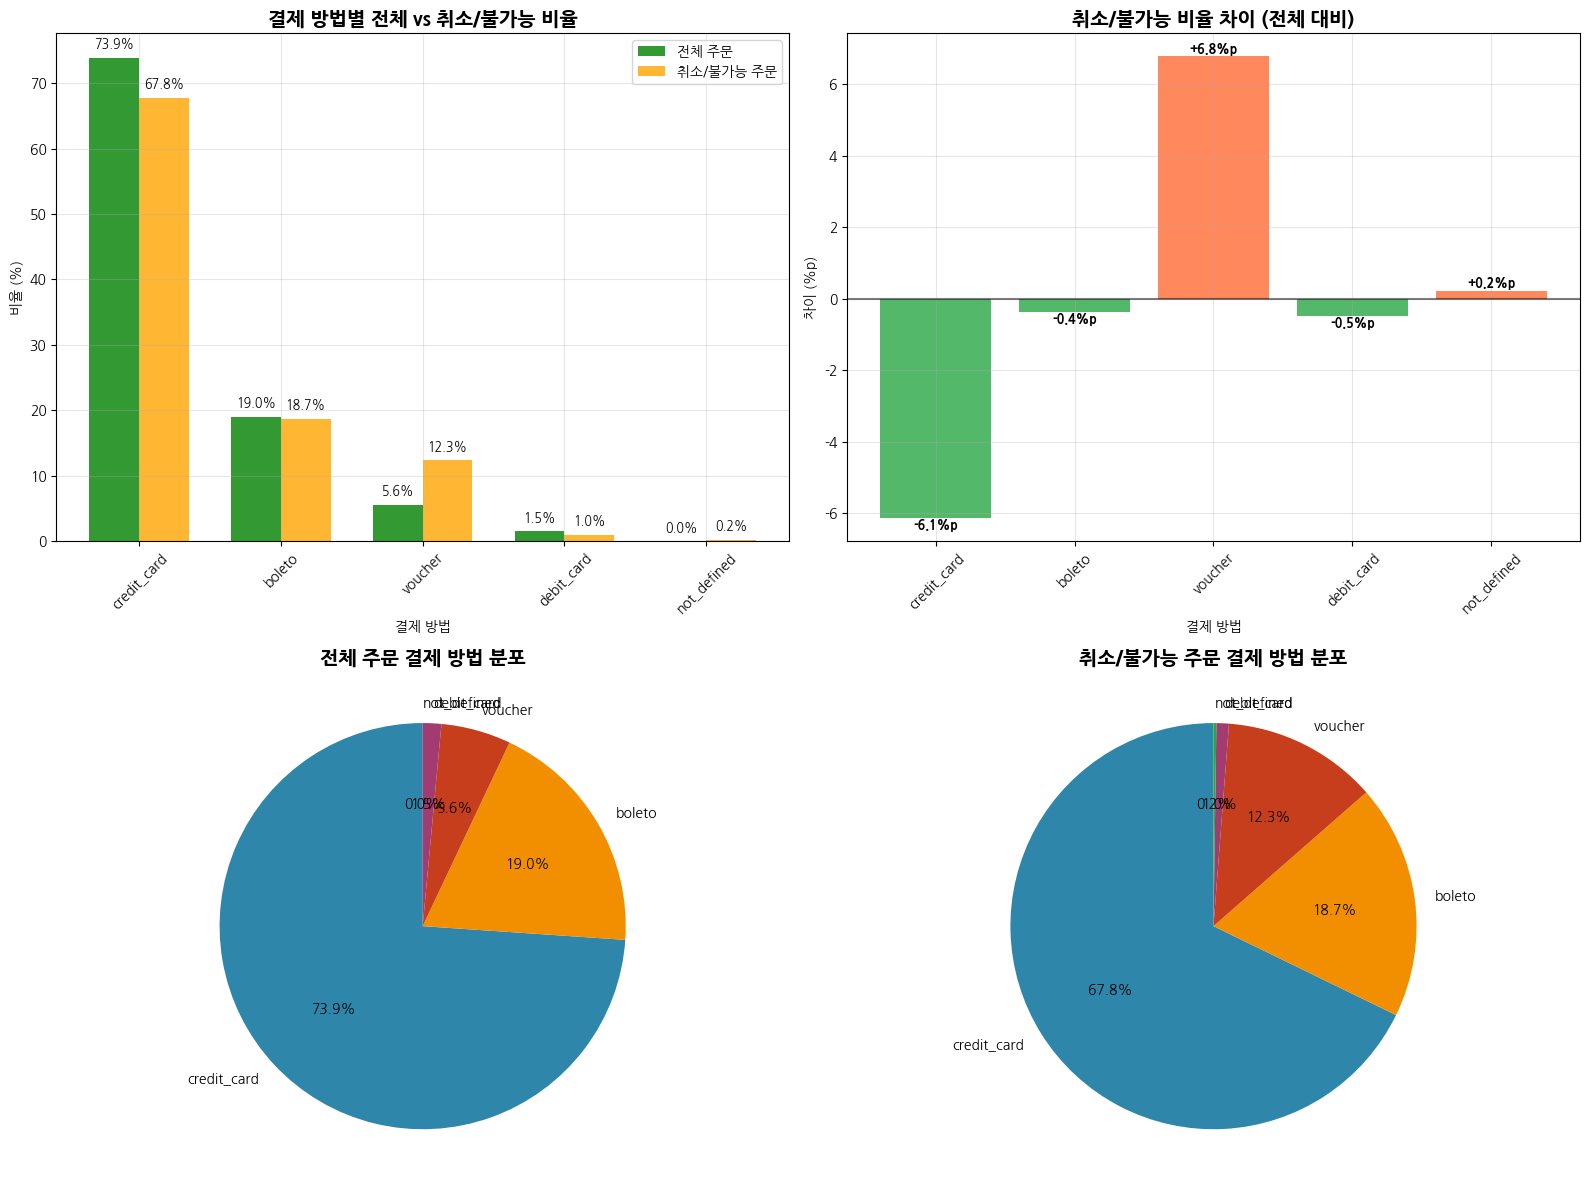

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ Ï£ºÎ¨∏ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ ÎπÑÏú® ÎπÑÍµê')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'ÎπÑÏú® (%)')

([<matplotlib.axis.XTick at 0x7d3c63b45bd0>,
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

Text(-0.175, 74.92237645110987, '73.9%')

Text(0.175, 68.78370144706778, '67.8%')

Text(0.825, 20.043952024334367, '19.0%')

Text(1.175, 19.65955826351866, '18.7%')

Text(1.825, 6.558978110621258, '5.6%')

Text(2.175, 13.338156892612338, '12.3%')

Text(2.825, 2.471805633097819, '1.5%')

Text(3.175, 1.99009900990099, '1.0%')

Text(3.825, 1.0028877808366863, '0.0%')

Text(4.175, 1.2284843869002284, '0.2%')

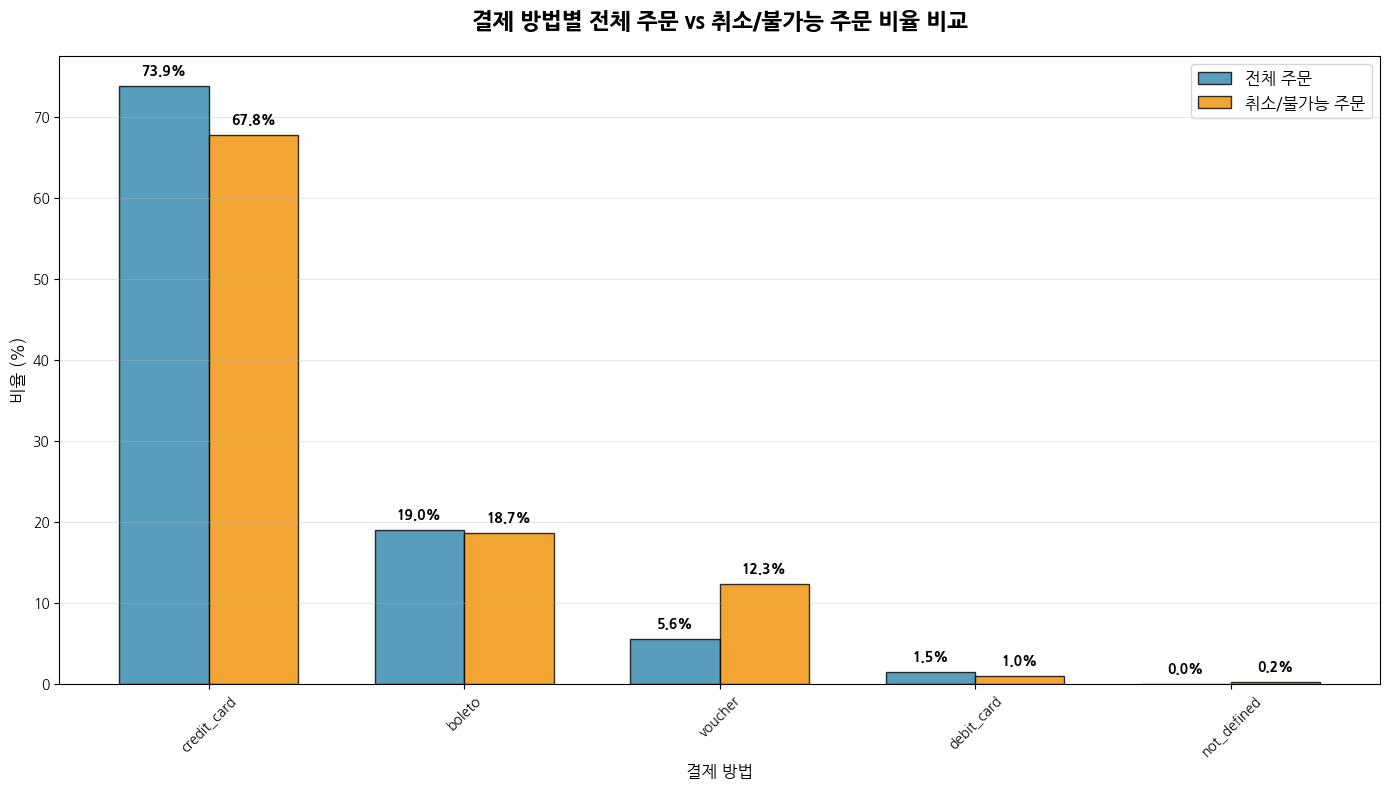


=== Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Î∂ÑÏÑù Í≤∞Í≥º ===
üö® Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÏúÑÌóòÎèÑÍ∞Ä ÎÜíÏùÄ Í≤∞Ï†ú Î∞©Î≤ï:
  - voucher: Ï†ÑÏ≤¥ 5.6% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 12.3% (+6.8%p)
  - not_defined: Ï†ÑÏ≤¥ 0.0% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 0.2% (+0.2%p)

‚úÖ ÏïàÏ†ïÏ†ÅÏù∏ Í≤∞Ï†ú Î∞©Î≤ï:
  - credit_card: Ï†ÑÏ≤¥ 73.9% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 67.8% (-6.1%p)
  - debit_card: Ï†ÑÏ≤¥ 1.5% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 1.0% (-0.5%p)
  - boleto: Ï†ÑÏ≤¥ 19.0% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• 18.7% (-0.4%p)

üìä Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:
  Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Ïàò: 103,886Í±¥
  Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Ïàò: 1,313Í±¥
  Ï†ÑÏ≤¥ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä•Î•†: 1.26%


In [61]:
# Ï£ºÎ¨∏ Ï∑®ÏÜå/ÏäπÏù∏Î∂àÍ∞Ä ÏõêÏù∏ Î∂ÑÏÑù - Í≤∞Ï†úÏàòÎã®
print(f"Ï†ÑÏ≤¥ Í≤∞Ï†ú Îç∞Ïù¥ÌÑ∞: {order_payments.shape[0]}Í±¥")
print("\nÏ†ÑÏ≤¥ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:")
total_payment_counts = order_payments['payment_type'].value_counts()
print(total_payment_counts)

# Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÏÑù
cancel_orders_with_payment = pd.merge(cancel_unable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')

print("\nÏ∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨:")
cancel_payment_counts = cancel_orders_with_payment['payment_type'].value_counts()
print(cancel_payment_counts)

print(f"\nÏ∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
cancel_payment_ratio = (cancel_payment_counts / cancel_payment_counts.sum()) * 100
print(cancel_payment_ratio.round(2))

# Ï†ÑÏ≤¥ Ï£ºÎ¨∏ ÎåÄÎπÑ ÎπÑÍµê
print(f"\nÏ†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
total_payment_ratio = (order_payments['payment_type'].value_counts() / len(order_payments)) * 100
print(total_payment_ratio.round(2))

# ÎπÑÍµê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
all_payment_methods = set(total_payment_ratio.index) | set(cancel_payment_ratio.index)
comparison_data = pd.DataFrame({
    'Ï†ÑÏ≤¥_ÎπÑÏú®(%)': [total_payment_ratio.get(method, 0) for method in all_payment_methods],
    'Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)': [cancel_payment_ratio.get(method, 0) for method in all_payment_methods],
    'Ï†ÑÏ≤¥_Í±¥Ïàò': [total_payment_counts.get(method, 0) for method in all_payment_methods],
    'Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_Í±¥Ïàò': [cancel_payment_counts.get(method, 0) for method in all_payment_methods]
}, index=list(all_payment_methods))

# Ï†ÑÏ≤¥ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÎ†¨
comparison_data = comparison_data.sort_values('Ï†ÑÏ≤¥_ÎπÑÏú®(%)', ascending=False)
comparison_data['Ï∞®Ïù¥(%p)'] = comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'] - comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)']

print("\n=== Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÍµê ===")
print(comparison_data.round(2))

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1) Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® ÎπÑÍµê (Í∑∏Î£π Î∞î Ï∞®Ìä∏)
ax1 = axes[0, 0]
x = np.arange(len(comparison_data))
width = 0.35

bars1 = ax1.bar(x - width/2, comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'], width,
                label='Ï†ÑÏ≤¥ Ï£ºÎ¨∏', color='green', alpha=0.8)
bars2 = ax1.bar(x + width/2, comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'], width,
                label='Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏', color='orange', alpha=0.8)

ax1.set_title('Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú®', fontsize=14, fontweight='bold')
ax1.set_xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
ax1.set_ylabel('ÎπÑÏú® (%)')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_data.index, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# ÏàòÏπò ÌëúÏãú
for i, (total, cancel) in enumerate(zip(comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'], comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'])):
    ax1.text(i - width/2, total + 1, f'{total:.1f}%', ha='center', va='bottom', fontsize=9)
    ax1.text(i + width/2, cancel + 1, f'{cancel:.1f}%', ha='center', va='bottom', fontsize=9)

# 2) Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® Ï∞®Ïù¥ (Ï†ÑÏ≤¥ ÎåÄÎπÑ)
ax2 = axes[0, 1]
colors = ['#FF6B35' if x > 0 else '#28A745' for x in comparison_data['Ï∞®Ïù¥(%p)']]
bars = ax2.bar(comparison_data.index, comparison_data['Ï∞®Ïù¥(%p)'], color=colors, alpha=0.8)

ax2.set_title('Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® Ï∞®Ïù¥ (Ï†ÑÏ≤¥ ÎåÄÎπÑ)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
ax2.set_ylabel('Ï∞®Ïù¥ (%p)')
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.grid(True, alpha=0.3)

# Ï∞®Ïù¥ ÏàòÏπò ÌëúÏãú
for i, (method, diff) in enumerate(zip(comparison_data.index, comparison_data['Ï∞®Ïù¥(%p)'])):
    y_pos = diff + 0.2 if diff > 0 else diff - 0.2
    ax2.text(i, y_pos, f'{diff:+.1f}%p', ha='center', va='center', fontsize=9, fontweight='bold')

# 3) Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú® (ÌååÏù¥ Ï∞®Ìä∏)
ax3 = axes[1, 0]
colors_pie = ['#2E86AB', '#F18F01', '#C73E1D', '#A23B72', '#28A745']
wedges, texts, autotexts = ax3.pie(comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'],
                                  labels=comparison_data.index,
                                  autopct='%1.1f%%',
                                  colors=colors_pie[:len(comparison_data)],
                                  startangle=90)
ax3.set_title('Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨', fontsize=14, fontweight='bold')

# 4) Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú® (ÌååÏù¥ Ï∞®Ìä∏)
ax4 = axes[1, 1]
wedges2, texts2, autotexts2 = ax4.pie(comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'],
                                      labels=comparison_data.index,
                                      autopct='%1.1f%%',
                                      colors=colors_pie[:len(comparison_data)],
                                      startangle=90)
ax4.set_title('Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Îã®ÎèÖ Î∞î Ï∞®Ìä∏ (Îçî ÌÅ∞ ÏÇ¨Ïù¥Ï¶à)
plt.figure(figsize=(14, 8))

# Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÍµê Î∞î Ï∞®Ìä∏
x = np.arange(len(comparison_data))
width = 0.35

bars1 = plt.bar(x - width/2, comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'], width,
                label='Ï†ÑÏ≤¥ Ï£ºÎ¨∏', color='#2E86AB', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x + width/2, comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'], width,
                label='Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏', color='#F18F01', alpha=0.8, edgecolor='black')

plt.title('Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ Ï£ºÎ¨∏ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ ÎπÑÏú® ÎπÑÍµê', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Í≤∞Ï†ú Î∞©Î≤ï', fontsize=12)
plt.ylabel('ÎπÑÏú® (%)', fontsize=12)
plt.xticks(x, comparison_data.index, rotation=45)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Í∞Å Î∞î ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for i, (total, cancel) in enumerate(zip(comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'], comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'])):
    plt.text(i - width/2, total + 1, f'{total:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + width/2, cancel + 1, f'{cancel:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ Ï∂úÎ†•
print("\n" + "="*50)
print("=== Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Î∂ÑÏÑù Í≤∞Í≥º ===")
print("="*50)

# ÏúÑÌóòÎèÑÍ∞Ä ÎÜíÏùÄ Í≤∞Ï†ú Î∞©Î≤ï
high_risk_methods = comparison_data[comparison_data['Ï∞®Ïù¥(%p)'] > 0].sort_values('Ï∞®Ïù¥(%p)', ascending=False)
if not high_risk_methods.empty:
    print("üö® Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÏúÑÌóòÎèÑÍ∞Ä ÎÜíÏùÄ Í≤∞Ï†ú Î∞©Î≤ï:")
    for method, row in high_risk_methods.iterrows():
        print(f"  - {method}: Ï†ÑÏ≤¥ {row['Ï†ÑÏ≤¥_ÎπÑÏú®(%)']:.1f}% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• {row['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)']:.1f}% (+{row['Ï∞®Ïù¥(%p)']:.1f}%p)")

# ÏïàÏ†ïÏ†ÅÏù∏ Í≤∞Ï†ú Î∞©Î≤ï
stable_methods = comparison_data[comparison_data['Ï∞®Ïù¥(%p)'] < 0].sort_values('Ï∞®Ïù¥(%p)', ascending=True)
if not stable_methods.empty:
    print("\n‚úÖ ÏïàÏ†ïÏ†ÅÏù∏ Í≤∞Ï†ú Î∞©Î≤ï:")
    for method, row in stable_methods.iterrows():
        print(f"  - {method}: Ï†ÑÏ≤¥ {row['Ï†ÑÏ≤¥_ÎπÑÏú®(%)']:.1f}% ‚Üí Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• {row['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)']:.1f}% ({row['Ï∞®Ïù¥(%p)']:.1f}%p)")

# Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ
total_orders = len(order_payments)
total_cancel_orders = len(cancel_orders_with_payment)
overall_cancel_rate = (total_cancel_orders / total_orders) * 100

print(f"\nüìä Ï†ÑÏ≤¥ ÌÜµÍ≥Ñ:")
print(f"  Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Ïàò: {total_orders:,}Í±¥")
print(f"  Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Ïàò: {total_cancel_orders:,}Í±¥")
print(f"  Ï†ÑÏ≤¥ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä•Î•†: {overall_cancel_rate:.2f}%")

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ Ï£ºÎ¨∏ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ ÎπÑÏú® ÎπÑÍµê')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'ÎπÑÏú® (%)')

([<matplotlib.axis.XTick at 0x7d3c63971f90>,
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

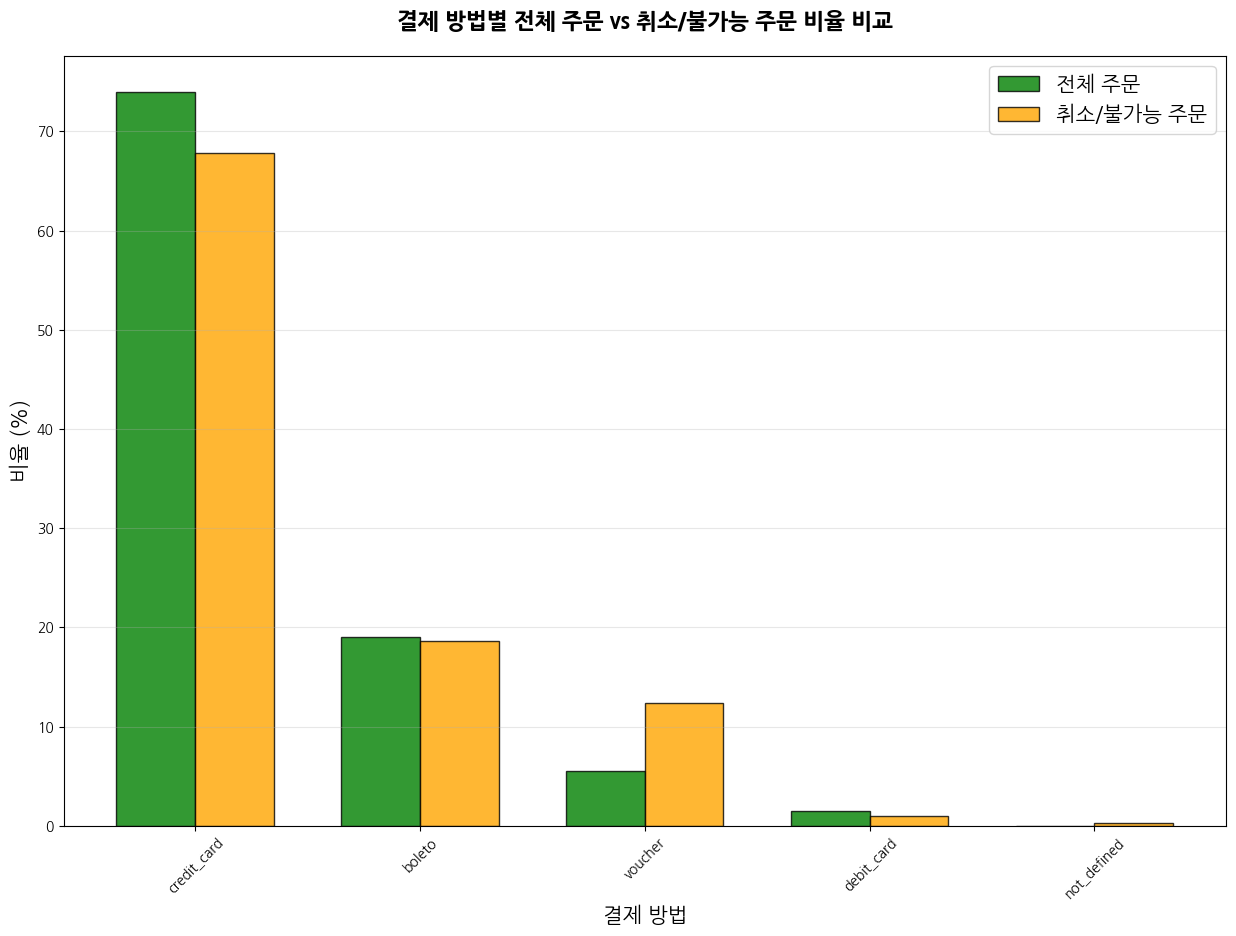

In [69]:

# Ï†ÑÏ≤¥ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÍµê Î∞î Ï∞®Ìä∏
plt.figure(figsize=(15, 10))
x = np.arange(len(comparison_data))
width = 0.35

bars1 = plt.bar(x - width/2, comparison_data['Ï†ÑÏ≤¥_ÎπÑÏú®(%)'], width,
                label='Ï†ÑÏ≤¥ Ï£ºÎ¨∏', color='green', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x + width/2, comparison_data['Ï∑®ÏÜåÎ∂àÍ∞ÄÎä•_ÎπÑÏú®(%)'], width,
                label='Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏', color='orange', alpha=0.8, edgecolor='black')

plt.title('Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï†ÑÏ≤¥ Ï£ºÎ¨∏ vs Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ ÎπÑÏú® ÎπÑÍµê', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Í≤∞Ï†ú Î∞©Î≤ï', fontsize=15)
plt.ylabel('ÎπÑÏú® (%)', fontsize=15)
plt.xticks(x, comparison_data.index, rotation=45)
plt.legend(fontsize=15)
plt.grid(True, alpha=0.3, axis='y')

Ï∑®ÏÜå Ï£ºÎ¨∏ Ïàò: 625Í±¥
Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Ïàò: 609Í±¥

=== Ï∑®ÏÜå(canceled) Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ===
payment_type
credit_card    444
voucher        115
boleto          95
debit_card       7
not_defined      3
Name: count, dtype: int64

Ï∑®ÏÜå Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    66.87
voucher        17.32
boleto         14.31
debit_card      1.05
not_defined     0.45
Name: count, dtype: float64

=== Î∂àÍ∞ÄÎä•(unavailable) Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ===
payment_type
credit_card    446
boleto         150
voucher         47
debit_card       6
Name: count, dtype: int64

Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:
payment_type
credit_card    68.72
boleto         23.11
voucher         7.24
debit_card      0.92
Name: count, dtype: float64

=== Ï∑®ÏÜå vs Î∂àÍ∞ÄÎä• Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÍµê ===


canceled_ratio(%)  unavailable_ratio(%)
payment_type                                         
boleto                    14.31                 23.11
credit_card               66.87                 68.72
debit_card                 1.05                  0.92
not_defined                0.45                  0.00
voucher                   17.32                  7.24

<Axes: title={'center': 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® ÎπÑÍµê (Ï∑®ÏÜå ÎπÑÏú® Í∏∞Ï§Ä Ï†ïÎ†¨)'}, xlabel='payment_type'>

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'ÎπÑÏú® (%)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'voucher'),
  Text(2, 0, 'boleto'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

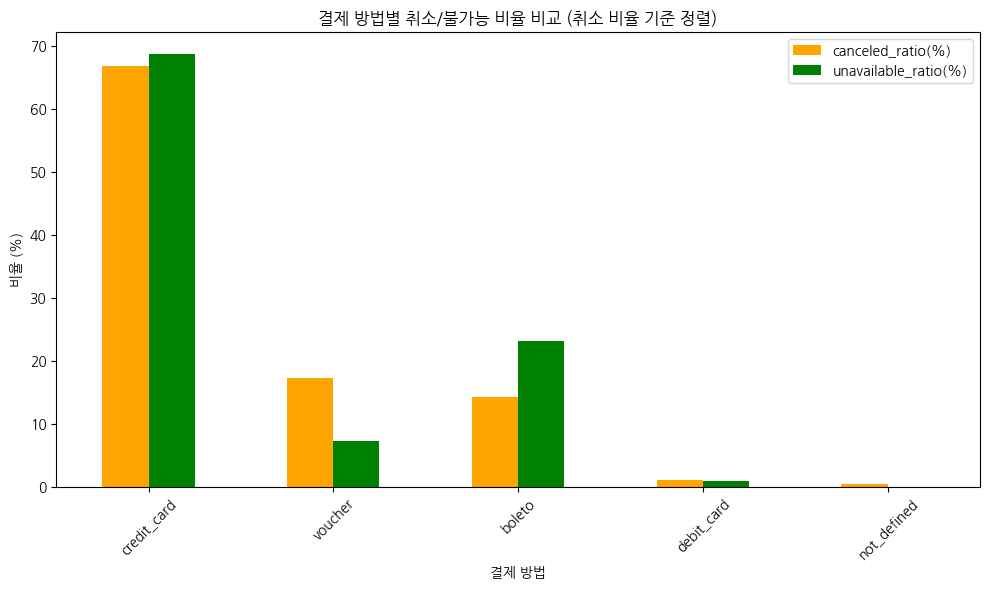

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [73]:
# Ï∑®ÏÜå(canceled)ÏôÄ Î∂àÍ∞ÄÎä•(unavailable)ÏùÑ ÎÇòÎà†ÏÑú Í≤∞Ï†ú Î∞©Î≤ïÏùÑ Î∂ÑÏÑùÌï¥ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§:
# Ï∑®ÏÜåÏôÄ Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ÏùÑ Í∞ÅÍ∞Å Î∂ÑÎ¶¨
canceled_orders = orders_dataset[orders_dataset['order_status'] == 'canceled']
unavailable_orders = orders_dataset[orders_dataset['order_status'] == 'unavailable']

print(f"Ï∑®ÏÜå Ï£ºÎ¨∏ Ïàò: {len(canceled_orders)}Í±¥")
print(f"Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Ïàò: {len(unavailable_orders)}Í±¥")

# Í∞ÅÍ∞ÅÏùò Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÏÑù
print("\n=== Ï∑®ÏÜå(canceled) Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ===")
canceled_with_payment = pd.merge(canceled_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')
canceled_payment_counts = canceled_with_payment['payment_type'].value_counts()
print(canceled_payment_counts)
print(f"\nÏ∑®ÏÜå Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
canceled_payment_ratio = (canceled_payment_counts / canceled_payment_counts.sum()) * 100
print(canceled_payment_ratio.round(2))

print("\n=== Î∂àÍ∞ÄÎä•(unavailable) Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ï ===")
unavailable_with_payment = pd.merge(unavailable_orders, order_payments[['order_id', 'payment_type']], on='order_id', how='left')
unavailable_payment_counts = unavailable_with_payment['payment_type'].value_counts()
print(unavailable_payment_counts)
print(f"\nÎ∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú®:")
unavailable_payment_ratio = (unavailable_payment_counts / unavailable_payment_counts.sum()) * 100
print(unavailable_payment_ratio.round(2))

# ÎπÑÍµê Ìëú
print("\n=== Ï∑®ÏÜå vs Î∂àÍ∞ÄÎä• Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÍµê ===")
comparison_df = pd.DataFrame({
    'canceled_ratio(%)': canceled_payment_ratio.round(2),
    'unavailable_ratio(%)': unavailable_payment_ratio.round(2)
}).fillna(0)

display(comparison_df)

# Î∞©Î≤ï 1: Ï∑®ÏÜå Ï£ºÎ¨∏ ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨
comparison_df_sorted = comparison_df.sort_values('canceled_ratio(%)', ascending=False)
comparison_df_sorted.plot(kind='bar', figsize=(10, 6), title='Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• ÎπÑÏú® ÎπÑÍµê (Ï∑®ÏÜå ÎπÑÏú® Í∏∞Ï§Ä Ï†ïÎ†¨)', color=['orange', 'green'])
plt.xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
plt.ylabel('ÎπÑÏú® (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Ï∑®ÏÜå Ï£ºÎ¨∏ ÎπÑÏú® Í∑∏ÎûòÌîÑ (ÎÇ¥Î¶ºÏ∞®Ïàú)
canceled_payment_ratio.sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Ï∑®ÏÜå Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÎπÑÏú® (ÎÇ¥Î¶ºÏ∞®Ïàú)')
axes[0].set_xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
axes[0].set_ylabel('ÎπÑÏú® (%)')
axes[0].tick_params(axis='x', rotation=45)

# Ïû¨Íµ¨Îß§ÏûêÏùò Ï£ºÎ¨∏Îã®Í≥Ñ(ÏÉÅÌíàÏÑ§Î™Ö) Í¥ÄÎ†®ÏÑ±

In [50]:
# Ïû¨Íµ¨Îß§ÏûêÏùò ÏÉÅÌíà Í¥ÄÎ†®ÏÑ±

customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# Ï¥ù 6342Í∞ú ÎÇòÏò§Îäî Îç∞Ïù¥ÌÑ∞

# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342Í∞ú Ï§ë 92 Í∞ú unavailable 44Í∞ú ÎäòÏñ¥ÎÇòÏÑú Ï¥ù 136 Í∞ú


# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")


# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
0802a1a217680f13264a70ddb7220823     2
634420a0ea42302205032ed44ac7fccc     2
bb99e6ae642f462d7bf05db05fc9aa11     2
e7688fef5438be571d0c39bbb3e8e998     2
e65862da4f9f183565831cf7e1cbb7a5     2
Name: count, Length: 2997, dtype: int64

5        879864dab9bc3047522c92c82e1212b8
8        5adf08e34b2e993982a47070956c5c65
13       eabebad39a88bb6f5b52376faec28612
32       2d5831cb2dff7cdefba62e950ae3dc7b
33       b2bed119388167a954382cca36c4777f
                       ...               
99324    5b46a0d983eec8c97363bea78d4a69dd
99327    c1affa46f9f3b514555259049a0307b9
99336    ebf46ff530343a129926adc1f831dea4
99353    282fbce48e4d2077aad602dd125c9225
99406    d9110683c7a282144e9fc97660026a28
Name: customer_id, Length: 6342, dtype: object

Repeat customers have canceled or unavailable orders. Here are the details:


order_id                       customer_id  \
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2296   f0df036e9be21fc238f131bbfcdde769  1fa16395beca89233661543954ca6cf1   
3094   5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
...                                 ...                               ...   
95932  a144aa25d9d14f25ee9f3ec4118e5517  9353974c6d727e3739a8370ff655a774   
96315  ae443cb420061bab1f2c5e3ad279fde8  3d59638a168c209ccb33a27424fc06da   
96996  5a14c8b3d919a4ef3f3428b0459c47b2  666094835d60d986eb87350b31efdcae   
97100  b34369ee8397436dd7ceb8bb7783671d  c96771504b0c9d89ad8da161e0e3d092   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp    order_approved_at  \
613       canceled      2018-01-26 21:34:08  2018-01-26 21:58:39   
1801      canceled      2018-09-20 13:54:16                  NaN   
2161      canceled      2017-05-01 16:12:39                  NaN   
2296   unavailable      2017-02-24 23:39:21  2017-02-24 23:45:14   
3094      canceled      2018-08-21 10:25:18                  NaN   
...            ...                      ...                  ...   
95932  unavailable      2017-11-06 17:36:36  2017-11-07 03:31:02   
96315  unavailable      2018-03-03 09:32:36  2018-03-03 09:48:36   
96996     canceled      2017-05-29 23:53:39                  NaN   
97100     canceled      2017-06-07 20:11:29                  NaN   
99347     canceled      2018-09-06 18:45:47                  NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
613            2018-01-29 22:33:25                           NaN   
1801                           NaN                           NaN   
2161                           NaN                           NaN   
2296                           NaN                           NaN   
3094                           NaN                           NaN   
...                            ...                           ...   
95932                          NaN                           NaN   
96315                          NaN                           NaN   
96996                          NaN                           NaN   
97100                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  year  
613             2018-02-22 00:00:00  2018  
1801            2018-10-17 00:00:00  2018  
2161            2017-05-30 00:00:00  2017  
2296            2017-04-07 00:00:00  2017  
3094            2018-09-06 00:00:00  2018  
...                             ...   ...  
95932           2017-11-24 00:00:00  2017  
96315           2018-03-28 00:00:00  2018  
96996           2017-06-23 00:00:00  2017  
97100           2017-07-04 00:00:00  2017  
99347           2018-09-27 00:00:00  2018  

[136 rows x 9 columns]

Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
15  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16  403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
44  ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
46  d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   

   order_status order_purchase_timestamp    order_approved_at  \
0     delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
15    delivered      2018-06-07 19:03:12  2018-06-12 23:31:02   
16    delivered      2018-01-02 19:00:43  2018-01-02 19:09:04   
44      shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
46    delivered      2017-05-14 20:28:25  2017-05-14 20:42:45   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
15          2018-06-11 14:54:00           2018-06-21 15:34:32   
16          2018-01-03 18:19:09           2018-01-20 01:38:59   
44          2018-06-05 14:32:00                           NaN   
46          2017-05-16 08:17:46           2017-05-25 09:14:31   

   order_estimated_delivery_date  year  
0            2017-10-18 00:00:00  2017  
15           2018-07-04 00:00:00  2018  
16           2018-02-06 00:00:00  2018  
44           2018-06-28 00:00:00  2018  
46           2017-06-12 00:00:00  2017

(6342, 9)


order_id                        product_id
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523

(7568, 2)


order_id                        product_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a   
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73   
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672   
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0   
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523   

   product_description_lenght  product_photos_qty  
0                       268.0                 4.0  
1                       991.0                 3.0  
2                       143.0                 2.0  
3                      1782.0                 1.0  
4                       521.0                 1.0

(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


# Í≤∞Ï†úÏ∑®ÏÜåÍ∏àÏï°Ïùò Ï†ÑÏ≤¥ÏàòÏùµ ÎåÄÎπÑ Í∏àÏï°ÎπÑÏ§ë

In [51]:
order_payments['order_id']
order_payments.head()

0         b81ef226f3fe1789b1e8b2acac839d17
1         a9810da82917af2d9aefd1278f1dcfa0
2         25e8ea4e93396b6fa0d3dd708e76c1bd
3         ba78997921bbcdc1373bb41e913ab953
4         42fdf880ba16b47b59251dd489d4441a
                        ...               
103881    0406037ad97740d563a178ecc7a2075c
103882    7b905861d7c825891d6347454ea7863f
103883    32609bbb3dd69b3c066a6860554a77bf
103884    b8b61059626efa996a60be9bb9320e10
103885    28bbae6599b09d39ca406b747b6632b1
Name: order_id, Length: 103886, dtype: object

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

266      8e24261a7e58791d10cb1bf9da94df5c
397      1b9ecfe83cdc259250e1a8aca174f0ad
586      c272bcd21c287498b4883c7512019702
613      714fb133a6730ab81fa1d3c1b2007291
687      37553832a3a89c9b2db59701c357ca67
                       ...               
99252    aaab15da689073f8f9aa978a390a69d1
99283    3a3cddda5a7c27851bd96c3313412840
99347    a89abace0dcc01eeb267a9660b5ac126
99348    a69ba794cc7deb415c3e15a0a3877e69
99415    5fabc81b6322c8443648e1b21a6fef21
Name: order_id, Length: 1234, dtype: object

order_id order_status  payment_sequential  \
0  8e24261a7e58791d10cb1bf9da94df5c  unavailable                   1   
1  1b9ecfe83cdc259250e1a8aca174f0ad     canceled                   1   
2  c272bcd21c287498b4883c7512019702  unavailable                   1   
3  714fb133a6730ab81fa1d3c1b2007291     canceled                   1   
4  37553832a3a89c9b2db59701c357ca67  unavailable                   1   

  payment_type  payment_installments  payment_value  
0  credit_card                     5          84.00  
1       boleto                     1          33.34  
2  credit_card                     1          97.68  
3  credit_card                     4          96.01  
4       boleto                     1         132.46

(1313, 6)

count    1313.000000
mean      205.434204
std       370.070555
min         0.000000
25%        56.400000
50%       102.090000
75%       192.770000
max      4809.440000
Name: payment_value, dtype: float64

<Axes: >

0        84.00
1        33.34
2        97.68
3        96.01
4       132.46
         ...  
1308    210.09
1309     63.89
1310    107.13
1311    195.91
1312    133.97
Name: payment_value, Length: 1313, dtype: float64

=== Í≤∞Ï†ú Ï∑®ÏÜå Í∏àÏï° ÎπÑÏ§ë Î∂ÑÏÑù ===
Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: 16,008,872.12
Ï∑®ÏÜå Í≤∞Ï†ú Í∏àÏï°: 269,735.11
Ï∑®ÏÜå ÎπÑÏ§ë: 1.68%


([<matplotlib.patches.Wedge at 0x7d3c6a201fd0>,
 [Text(-0.05819913656682741, 1.0984593121745, 'Ï∑®ÏÜå Í∏àÏï°\n1.7%'),
  Text(0.058198839757529465, -1.0984593279001629, 'Ï†ïÏÉÅ Í∏àÏï°\n98.3%')],
 [Text(-0.031744983581905854, 0.5991596248224546, '1.7%'),
  Text(0.03174482168592516, -0.5991596334000888, '98.3%')])

Text(0.5, 1.0, 'Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï° ÎåÄÎπÑ Ï∑®ÏÜå Í∏àÏï° ÎπÑÏ§ë')

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° ÎπÑÍµê')

Text(0, 0.5, 'Í≤∞Ï†ú Í∏àÏï°')

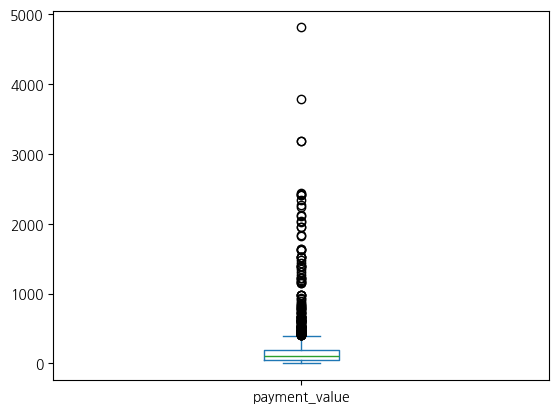

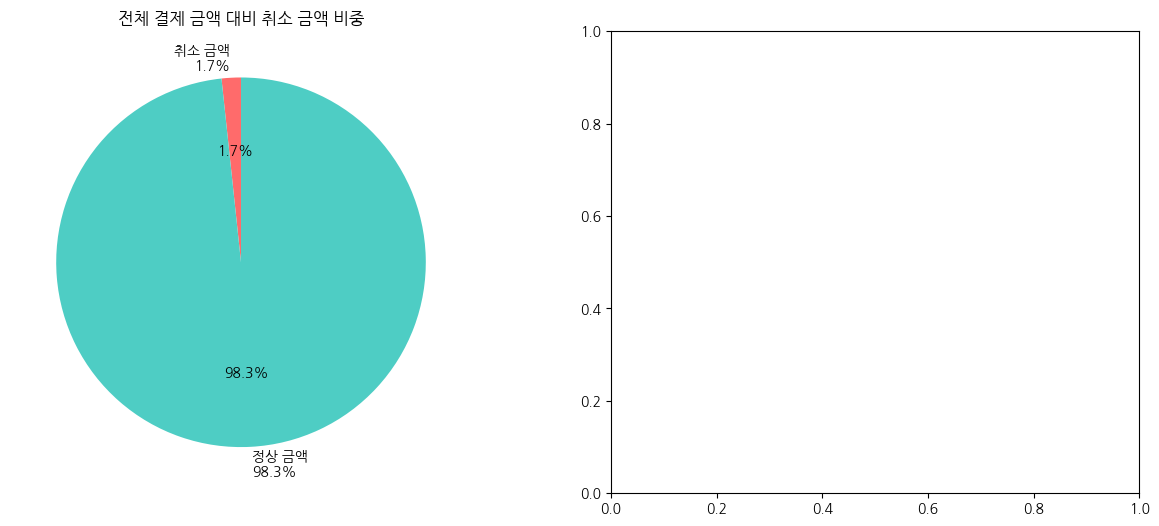

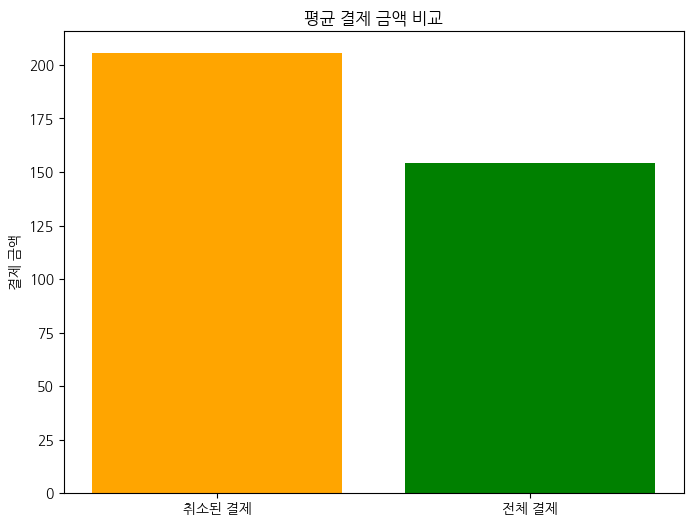

Ï∑®ÏÜåÎêú Í≤∞Ï†ú ÌèâÍ∑†: 205.43
Ï†ÑÏ≤¥ Í≤∞Ï†ú ÌèâÍ∑†: 154.10

=== ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° ÎπÑÍµê ===
Ï†ÑÏ≤¥ ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: 154.10
Ï∑®ÏÜå ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: 205.43
ÌèâÍ∑† Í∏àÏï° Ï∞®Ïù¥: 51.33 (33.3%)


In [52]:
# Í≤∞Ï†úÏ∑®ÏÜå/Î∂àÍ∞ÄÎä•Ïûê 1234Î™ÖÏùò Í∏àÏï°
# Í≤∞Ï†úÏ∑®ÏÜå/Î∂àÍ∞ÄÎä•Í±¥ 1313Í±¥, Ï§ëÍ∞ÑÍ∞í $ 102 ÌèâÍ∑† $205, ÏµúÎåÄ $4809, 25% ÏÜåÏàòÏùò Í≥†Ïï°Í≤∞Ï†úÍ∞Ä ÌèâÍ∑† ÎÜíÏûÑ

cancel_unable_orders = orders_dataset[orders_dataset['order_status'].isin(['canceled','unavailable'])]
cancel_unable_orders['order_id']

# merge
cancel_payments_merged = pd.merge(
    cancel_unable_orders[['order_id', 'order_status']],
    order_payments,
    on='order_id',
    how='inner'
)

cancel_payments_merged.head()
cancel_payments_merged.shape #1313Í±¥, Ïôú Í≤∞Ï†úÏ∑®ÏÜåÎ≥¥Îã§ Îçî ÎßéÏù¥ ÎÇòÏò§ÏßÄ? order Í±¥ÏàòÎùºÏÑú?
cancel_payments_merged['payment_value'].describe() # ÌèâÍ∑† 205$, ÏµúÎåÄ 4809$

cancel_payments_merged['payment_value'].plot(kind='box')

cancel_payments_merged['payment_value']

# Ï†ÑÏ≤¥Í≤∞Ï†úÍ∏àÏï° ÎåÄÎπÑ Í≤∞Ï†úÏ∑®ÏÜåÎπÑÏ§ë 1.68%
#Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: 16,008,872.12
#Ï∑®ÏÜå Í≤∞Ï†ú Í∏àÏï°: 269,735.11
#Ï∑®ÏÜå ÎπÑÏ§ë: 1.68%


# 1. Ï∑®ÏÜå Í≤∞Ï†ú Í∏àÏï° Ï¥ùÌï©
cancel_total_amount = cancel_payments_merged['payment_value'].sum()

# 2. Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï° Ï¥ùÌï©
total_all_amount = order_payments['payment_value'].sum()

# 3. ÎπÑÏ§ë Í≥ÑÏÇ∞
cancel_ratio = (cancel_total_amount / total_all_amount) * 100

print("=== Í≤∞Ï†ú Ï∑®ÏÜå Í∏àÏï° ÎπÑÏ§ë Î∂ÑÏÑù ===")
print(f"Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: {total_all_amount:,.2f}")
print(f"Ï∑®ÏÜå Í≤∞Ï†ú Í∏àÏï°: {cancel_total_amount:,.2f}")
print(f"Ï∑®ÏÜå ÎπÑÏ§ë: {cancel_ratio:.2f}%")

# Í∏àÏï° ÎπÑÏ§ë ÌååÏù¥Ï∞®Ìä∏
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

amounts = [cancel_total_amount, total_all_amount - cancel_total_amount]
labels = [f'Ï∑®ÏÜå Í∏àÏï°\n{cancel_ratio:.1f}%', f'Ï†ïÏÉÅ Í∏àÏï°\n{100-cancel_ratio:.1f}%']
colors = ['#ff6b6b', '#4ecdc4']

axes[0].pie(amounts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï° ÎåÄÎπÑ Ï∑®ÏÜå Í∏àÏï° ÎπÑÏ§ë')


# Ï†ÑÏ≤¥ Í≤∞Ï†úÍ∏àÏï° ÎåÄÎπÑ Ï∑®ÏÜåÍ∏àÏï° ÌèâÍ∑† : Ï∑®ÏÜåÍ±¥ Ï£ºÎ¨∏Í∏àÏï° Îçî ÎÜíÎã§
#Ï†ÑÏ≤¥ ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: 154.10
#Ï∑®ÏÜå ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: 205.43
#ÌèâÍ∑† Í∏àÏï° Ï∞®Ïù¥: 51.33 (33.3%)

# 4. ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° ÎπÑÍµê
avg_cancel = cancel_payments_merged['payment_value'].mean()
avg_total = order_payments['payment_value'].mean()

# Î∞îÏ∞®Ìä∏ ÏÉùÏÑ±
categories = ['Ï∑®ÏÜåÎêú Í≤∞Ï†ú', 'Ï†ÑÏ≤¥ Í≤∞Ï†ú']
values = [avg_cancel, avg_total]

plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['orange', 'green'])
plt.title('ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° ÎπÑÍµê')
plt.ylabel('Í≤∞Ï†ú Í∏àÏï°')
plt.show()

print(f"Ï∑®ÏÜåÎêú Í≤∞Ï†ú ÌèâÍ∑†: {avg_cancel:.2f}")
print(f"Ï†ÑÏ≤¥ Í≤∞Ï†ú ÌèâÍ∑†: {avg_total:.2f}")

print(f"\n=== ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï° ÎπÑÍµê ===")
print(f"Ï†ÑÏ≤¥ ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: {avg_total:.2f}")
print(f"Ï∑®ÏÜå ÌèâÍ∑† Í≤∞Ï†ú Í∏àÏï°: {avg_cancel:.2f}")
print(f"ÌèâÍ∑† Í∏àÏï° Ï∞®Ïù¥: {avg_cancel - avg_total:.2f} ({((avg_cancel/avg_total-1)*100):.1f}%)")

# Í≤∞Ï†úÏ∑®ÏÜåÏûêÏùò Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÏú®

=== Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå ÌòÑÌô© ===
   year  Ï∑®ÏÜå_Í±¥Ïàò     Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°  ÌèâÍ∑†_Ï∑®ÏÜåÍ∏àÏï°
0  2016     33    7548.96   228.76
1  2017    783  157255.08   200.84
2  2018    497  104931.07   211.13

=== Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜåÏú® ÎπÑÍµê ===
   year  Ï∑®ÏÜå_Í±¥Ïàò     Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°  ÌèâÍ∑†_Ï∑®ÏÜåÍ∏àÏï°  Ï†ÑÏ≤¥_Ï£ºÎ¨∏Í±¥Ïàò  Ï∑®ÏÜåÏú®_percent
0  2016     33    7548.96   228.76      329        10.03
1  2017    783  157255.08   200.84    45101         1.74
2  2018    497  104931.07   211.13    54011         0.92

=== Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÏú® ===
   year  Ï∑®ÏÜåÍ±¥Ïàò_Ï¶ùÍ∞ÄÏú®  Ï∑®ÏÜåÍ∏àÏï°_Ï¶ùÍ∞ÄÏú®  Ï∑®ÏÜåÏú®_Î≥ÄÌôî
0  2016      0.00      0.00    0.00
1  2017   2272.73   1983.14   -8.29
2  2018    -36.53    -33.27   -0.82


/tmp/ipython-input-78-1530749369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_unable_orders['order_purchase_timestamp'] = pd.to_datetime(cancel_unable_orders['order_purchase_timestamp'])
/tmp/ipython-input-78-1530749369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancel_unable_orders['year'] = cancel_unable_orders['order_purchase_timestamp'].dt.year
/tmp/ipython-input-78-1530749369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0.5, 1.0, 'Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Ï∑®ÏÜå Í±¥Ïàò')

Text(0, 10, '33')

Text(0, 10, '783')

Text(0, 10, '497')

Text(0.5, 1.0, 'Ïó∞ÎèÑÎ≥Ñ Ï¥ù Ï∑®ÏÜå Í∏àÏï° Ìä∏Î†åÎìú')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Ï¥ù Ï∑®ÏÜå Í∏àÏï° ($)')

Text(0, 10, '$7,548')

Text(0, 10, '$157,255')

Text(0, 10, '$104,931')

Text(0.5, 1.0, 'Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜåÏú® Ìä∏Î†åÎìú')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Ï∑®ÏÜåÏú® (%)')

Text(0, 10, '10.03%')

Text(0, 10, '1.74%')

Text(0, 10, '0.92%')

Text(0.5, 1.0, 'ÏõîÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú')

Text(0.5, 0, 'ÏãúÍ∞Ñ (Ïõî)')

Text(0, 0.5, 'ÏõîÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò')

[Text(0, 0, '2016-09'),
 Text(2, 0, '2017-01'),
 Text(4, 0, '2017-03'),
 Text(6, 0, '2017-05'),
 Text(8, 0, '2017-07'),
 Text(10, 0, '2017-09'),
 Text(12, 0, '2017-11'),
 Text(14, 0, '2018-01'),
 Text(16, 0, '2018-03'),
 Text(18, 0, '2018-05'),
 Text(20, 0, '2018-07'),
 Text(22, 0, '2018-09')]

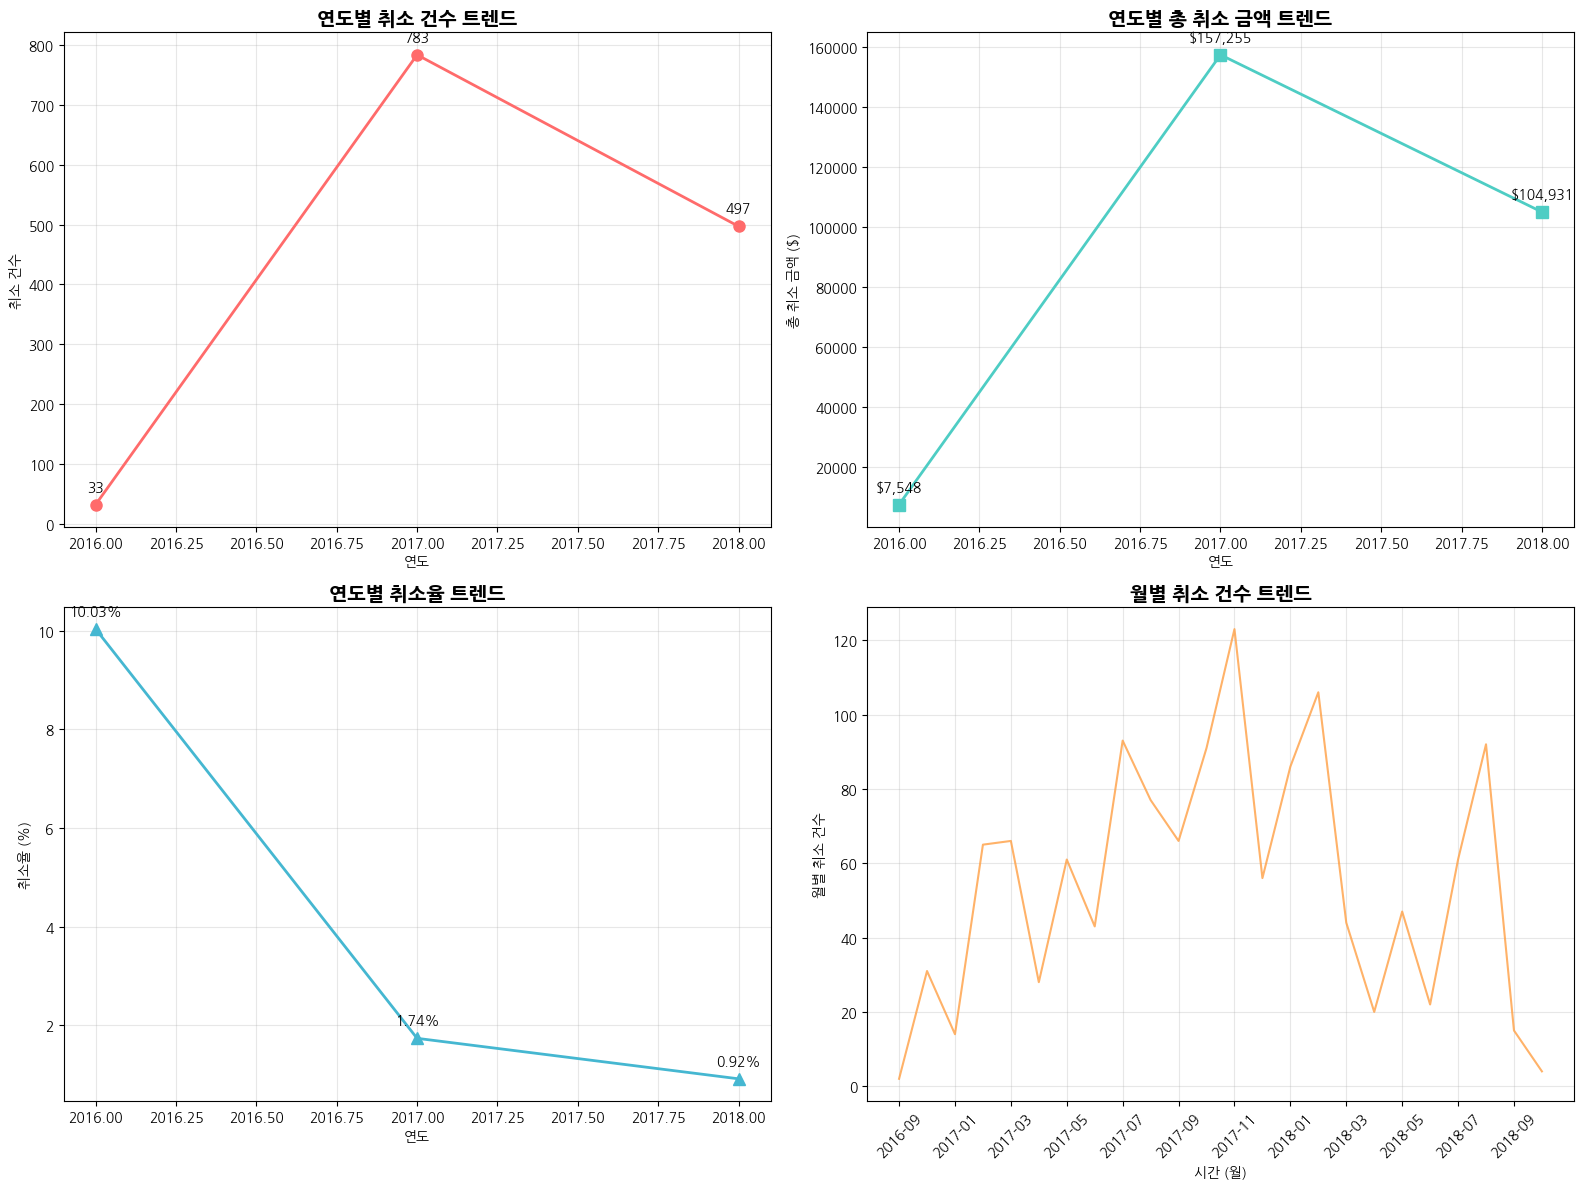

In [78]:
# Ï∑®ÏÜåÏûêÏùò Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÏÑ∏

# Í≤∞Ï†úÏ∑®ÏÜåÏûê Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÏÑ∏ Î∂ÑÏÑù

# 1. Ï£ºÎ¨∏ ÎÇ†ÏßúÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò (ÌïÑÏöîÏãú)
cancel_unable_orders['order_purchase_timestamp'] = pd.to_datetime(cancel_unable_orders['order_purchase_timestamp'])

# 2. Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Î∞è Í∏àÏï° Î∂ÑÏÑù
cancel_unable_orders['year'] = cancel_unable_orders['order_purchase_timestamp'].dt.year
cancel_unable_orders['month'] = cancel_unable_orders['order_purchase_timestamp'].dt.month
cancel_unable_orders['year_month'] = cancel_unable_orders['order_purchase_timestamp'].dt.to_period('M')

# 3. Ï∑®ÏÜå Ï£ºÎ¨∏Í≥º Í≤∞Ï†ú Ï†ïÎ≥¥ Î≥ëÌï© (Ïù¥ÎØ∏ ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌôúÏö©)
cancel_with_payments = pd.merge(
    cancel_unable_orders,
    order_payments,
    on='order_id',
    how='inner'
)

# 4. Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå ÌòÑÌô© Î∂ÑÏÑù
yearly_cancel_stats = cancel_with_payments.groupby('year').agg({
    'order_id': 'count',  # Ï∑®ÏÜå Í±¥Ïàò
    'payment_value': ['sum', 'mean']  # Ï¥ù Ï∑®ÏÜå Í∏àÏï°, ÌèâÍ∑† Ï∑®ÏÜå Í∏àÏï°
}).round(2)

yearly_cancel_stats.columns = ['Ï∑®ÏÜå_Í±¥Ïàò', 'Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°', 'ÌèâÍ∑†_Ï∑®ÏÜåÍ∏àÏï°']
yearly_cancel_stats = yearly_cancel_stats.reset_index()

print("=== Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå ÌòÑÌô© ===")
print(yearly_cancel_stats)

# 5. Ï†ÑÏ≤¥ Ï£ºÎ¨∏ ÎåÄÎπÑ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞
# Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Ïó∞ÎèÑÎ≥Ñ ÌÜµÍ≥Ñ
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['year'] = orders_dataset['order_purchase_timestamp'].dt.year

yearly_total_orders = orders_dataset.groupby('year')['order_id'].count().reset_index()
yearly_total_orders.columns = ['year', 'Ï†ÑÏ≤¥_Ï£ºÎ¨∏Í±¥Ïàò']

# Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞
yearly_comparison = pd.merge(yearly_cancel_stats, yearly_total_orders, on='year', how='left')
yearly_comparison['Ï∑®ÏÜåÏú®_percent'] = (yearly_comparison['Ï∑®ÏÜå_Í±¥Ïàò'] / yearly_comparison['Ï†ÑÏ≤¥_Ï£ºÎ¨∏Í±¥Ïàò'] * 100).round(2)

print("\n=== Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜåÏú® ÎπÑÍµê ===")
print(yearly_comparison)

# 6. Ï¶ùÍ∞ÄÏú® Í≥ÑÏÇ∞
yearly_comparison['Ï∑®ÏÜåÍ±¥Ïàò_Ï¶ùÍ∞ÄÏú®'] = yearly_comparison['Ï∑®ÏÜå_Í±¥Ïàò'].pct_change().fillna(0) * 100
yearly_comparison['Ï∑®ÏÜåÍ∏àÏï°_Ï¶ùÍ∞ÄÏú®'] = yearly_comparison['Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°'].pct_change().fillna(0) * 100
yearly_comparison['Ï∑®ÏÜåÏú®_Î≥ÄÌôî'] = yearly_comparison['Ï∑®ÏÜåÏú®_percent'].diff().fillna(0)

print("\n=== Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÏú® ===")
print(yearly_comparison[['year', 'Ï∑®ÏÜåÍ±¥Ïàò_Ï¶ùÍ∞ÄÏú®', 'Ï∑®ÏÜåÍ∏àÏï°_Ï¶ùÍ∞ÄÏú®', 'Ï∑®ÏÜåÏú®_Î≥ÄÌôî']].round(2))

# 7. ÏõîÎ≥Ñ Ìä∏Î†åÎìú Î∂ÑÏÑù (Îçî ÏÑ∏Î∞ÄÌïú Î∂ÑÏÑù)
monthly_cancel_stats = cancel_with_payments.groupby('year_month').agg({
    'order_id': 'count',
    'payment_value': ['sum', 'mean']
}).round(2)

monthly_cancel_stats.columns = ['ÏõîÎ≥Ñ_Ï∑®ÏÜåÍ±¥Ïàò', 'ÏõîÎ≥Ñ_Ï¥ùÏ∑®ÏÜåÍ∏àÏï°', 'ÏõîÎ≥Ñ_ÌèâÍ∑†Ï∑®ÏÜåÍ∏àÏï°']
monthly_cancel_stats = monthly_cancel_stats.reset_index()

# 8. ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 8-1. Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú
axes[0,0].plot(yearly_comparison['year'], yearly_comparison['Ï∑®ÏÜå_Í±¥Ïàò'],
               marker='o', linewidth=2, markersize=8, color='#ff6b6b')
axes[0,0].set_title('Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Ïó∞ÎèÑ')
axes[0,0].set_ylabel('Ï∑®ÏÜå Í±¥Ïàò')
axes[0,0].grid(True, alpha=0.3)

# Í∞í ÌëúÏãú
for i, row in yearly_comparison.iterrows():
    axes[0,0].annotate(f"{int(row['Ï∑®ÏÜå_Í±¥Ïàò'])}",
                      (row['year'], row['Ï∑®ÏÜå_Í±¥Ïàò']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-2. Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜå Í∏àÏï° Ìä∏Î†åÎìú
axes[0,1].plot(yearly_comparison['year'], yearly_comparison['Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°'],
               marker='s', linewidth=2, markersize=8, color='#4ecdc4')
axes[0,1].set_title('Ïó∞ÎèÑÎ≥Ñ Ï¥ù Ï∑®ÏÜå Í∏àÏï° Ìä∏Î†åÎìú', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Ïó∞ÎèÑ')
axes[0,1].set_ylabel('Ï¥ù Ï∑®ÏÜå Í∏àÏï° ($)')
axes[0,1].grid(True, alpha=0.3)

# Í∞í ÌëúÏãú
for i, row in yearly_comparison.iterrows():
    axes[0,1].annotate(f"${int(row['Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°']):,}",
                      (row['year'], row['Ï¥ù_Ï∑®ÏÜåÍ∏àÏï°']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-3. Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜåÏú® Ìä∏Î†åÎìú
axes[1,0].plot(yearly_comparison['year'], yearly_comparison['Ï∑®ÏÜåÏú®_percent'],
               marker='^', linewidth=2, markersize=8, color='#45b7d1')
axes[1,0].set_title('Ïó∞ÎèÑÎ≥Ñ Ï∑®ÏÜåÏú® Ìä∏Î†åÎìú', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Ïó∞ÎèÑ')
axes[1,0].set_ylabel('Ï∑®ÏÜåÏú® (%)')
axes[1,0].grid(True, alpha=0.3)

# Í∞í ÌëúÏãú
for i, row in yearly_comparison.iterrows():
    axes[1,0].annotate(f"{row['Ï∑®ÏÜåÏú®_percent']:.2f}%",
                      (row['year'], row['Ï∑®ÏÜåÏú®_percent']),
                      textcoords="offset points", xytext=(0,10), ha='center')

# 8-4. ÏõîÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú (ÏãúÍ∞Ñ ÌùêÎ¶Ñ)
monthly_cancel_stats['year_month_str'] = monthly_cancel_stats['year_month'].astype(str)
x_ticks = range(0, len(monthly_cancel_stats), max(1, len(monthly_cancel_stats)//10))

axes[1,1].plot(monthly_cancel_stats['ÏõîÎ≥Ñ_Ï∑®ÏÜåÍ±¥Ïàò'],
               linewidth=1.5, color='#ff9f43', alpha=0.8)
axes[1,1].set_title('ÏõîÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò Ìä∏Î†åÎìú', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('ÏãúÍ∞Ñ (Ïõî)')
axes[1,1].set_ylabel('ÏõîÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò')
axes[1,1].set_xticks(x_ticks)
axes[1,1].set_xticklabels([monthly_cancel_stats.iloc[i]['year_month_str'] for i in x_ticks],
                         rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [23]:
# Ïû¨Íµ¨Îß§ÏûêÏùò Í≤∞Ï†úÎπÑÏ§ëÏ∞æÍ∏∞
# Ï†ÑÏ≤¥ Í≥†Í∞ù 99441
customers['customer_unique_id']


0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: object

In [24]:
# Ïû¨Íµ¨Îß§Ïûê 2997 (Ïö©ÌòÅÎãòÏΩîÎìú)
orders_with_unique_customer_id=pd.merge(
    orders_dataset,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

customer_order_counts = orders_with_unique_customer_id['customer_unique_id'].value_counts().reset_index()
customer_order_counts.columns = ['customer_unique_id', 'order_count']

repeat_customers_df = customer_order_counts[customer_order_counts['order_count'] > 1]

repeat_customers_df

customer_unique_id  order_count
0     8d50f5eadf50201ccdcedfb9e2ac8455           17
1     3e43e6105506432c953e165fb2acf44c            9
2     6469f99c1f9dfae7733b25662e7f1782            7
3     1b6c7548a2a1f9037c1fd3ddfed95f33            7
4     ca77025e7201e3b30c44b472ff346268            7
...                                ...          ...
2992  b8c5ccc844de0242c85efacf5b6a51da            2
2993  f62d6572c9c25b3796d058d7b833f8b7            2
2994  bfc84496b1100cbbd83a6f8087526168            2
2995  3b80d2592c113d689c05232eb90db0ff            2
2996  9bff67cbd491a775eb1e262b778da4e6            2

[2997 rows x 2 columns]

In [54]:

# 2. Ïû¨Íµ¨Îß§ÏûêÏùò Ï£ºÎ¨∏ ID Ï∂îÏ∂ú
repeat_customer_orders = pd.merge(
    orders_with_unique_customer_id,
    repeat_customers_df[['customer_unique_id']],
    on='customer_unique_id',
    how='inner'
)

# 3. Ïû¨Íµ¨Îß§ÏûêÏùò Í≤∞Ï†ú Ï†ïÎ≥¥ Î≥ëÌï©
repeat_customer_payments = pd.merge(
    repeat_customer_orders[['order_id', 'customer_unique_id']],
    order_payments,
    on='order_id',
    how='inner'
)

# 4. Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÌÜµÍ≥Ñ
repeat_payment_total = repeat_customer_payments['payment_value'].sum()
repeat_payment_count = len(repeat_customer_payments)
repeat_customer_count = len(repeat_customers_df)

print(f"Ïû¨Íµ¨Îß§Ïûê Ïàò: {repeat_customer_count:,}Î™Ö")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í±¥Ïàò: {repeat_payment_count:,}Í±¥")
print(f"Ïû¨Íµ¨Îß§Ïûê Ï¥ù Í≤∞Ï†ú Í∏àÏï°: ${repeat_payment_total:,.2f}")

# 5. Ï†ÑÏ≤¥ Í≤∞Ï†ú ÎåÄÎπÑ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë
total_payment_amount = order_payments['payment_value'].sum()
repeat_payment_ratio = (repeat_payment_total / total_payment_amount) * 100

print(f"\nÏ†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: ${total_payment_amount:,.2f}")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í∏àÏï°: ${repeat_payment_total:,.2f}")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë: {repeat_payment_ratio:.2f}%")


Ïû¨Íµ¨Îß§Ïûê Ïàò: 2,997Î™Ö
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í±¥Ïàò: 6,723Í±¥
Ïû¨Íµ¨Îß§Ïûê Ï¥ù Í≤∞Ï†ú Í∏àÏï°: $944,022.71

Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: $16,008,872.12
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í∏àÏï°: $944,022.71
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë: 5.90%


# Ïû¨Íµ¨Îß§ÏûêÏùò Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÎπÑÏú® Î∞è Í≤∞Ï†úÍ∏àÏï°ÎπÑÏú®

In [55]:
# Ïû¨Íµ¨Îß§ÏûêÏùò Ïó∞ÎèÑÎ≥Ñ Ï¶ùÍ∞ÄÎπÑÏú®Í≥º Ïó∞ÎèÑÎ≥Ñ Í≤∞Ï†úÍ∏àÏï°ÎπÑÏú®

# 2. Ïû¨Íµ¨Îß§ÏûêÏùò Ï£ºÎ¨∏ ID Ï∂îÏ∂ú
repeat_customer_orders = pd.merge(
    orders_with_unique_customer_id,
    repeat_customers_df[['customer_unique_id']],
    on='customer_unique_id',
    how='inner'
)

# 3. Ïû¨Íµ¨Îß§ÏûêÏùò Í≤∞Ï†ú Ï†ïÎ≥¥ Î≥ëÌï©
repeat_customer_payments = pd.merge(
    repeat_customer_orders[['order_id', 'customer_unique_id']],
    order_payments,
    on='order_id',
    how='inner'
)

# 4. Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÌÜµÍ≥Ñ
repeat_payment_total = repeat_customer_payments['payment_value'].sum()
repeat_payment_count = len(repeat_customer_payments)
repeat_customer_count = len(repeat_customers_df)

print(f"Ïû¨Íµ¨Îß§Ïûê Ïàò: {repeat_customer_count:,}Î™Ö")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í±¥Ïàò: {repeat_payment_count:,}Í±¥")
print(f"Ïû¨Íµ¨Îß§Ïûê Ï¥ù Í≤∞Ï†ú Í∏àÏï°: ${repeat_payment_total:,.2f}")

# 5. Ï†ÑÏ≤¥ Í≤∞Ï†ú ÎåÄÎπÑ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë
total_payment_amount = order_payments['payment_value'].sum()
repeat_payment_ratio = (repeat_payment_total / total_payment_amount) * 100

print(f"\nÏ†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: ${total_payment_amount:,.2f}")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í∏àÏï°: ${repeat_payment_total:,.2f}")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë: {repeat_payment_ratio:.2f}%")


Ïû¨Íµ¨Îß§Ïûê Ïàò: 2,997Î™Ö
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í±¥Ïàò: 6,723Í±¥
Ïû¨Íµ¨Îß§Ïûê Ï¥ù Í≤∞Ï†ú Í∏àÏï°: $944,022.71

Ï†ÑÏ≤¥ Í≤∞Ï†ú Í∏àÏï°: $16,008,872.12
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú Í∏àÏï°: $944,022.71
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë: 5.90%


In [56]:
# 1. Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞Ïóê Ïó∞ÎèÑ Ï∂îÍ∞Ä
orders_with_year = orders_dataset.copy()
orders_with_year['order_purchase_timestamp'] = pd.to_datetime(orders_with_year['order_purchase_timestamp'])
orders_with_year['year'] = orders_with_year['order_purchase_timestamp'].dt.year

# 2. Í≥†Í∞ù Í≥†Ïú† IDÏôÄ Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
orders_with_customer_year = pd.merge(
    orders_with_year,
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# 3. Ïó∞ÎèÑÎ≥Ñ Ïû¨Íµ¨Îß§Ïûê ÏãùÎ≥Ñ Ìï®Ïàò
def identify_repeat_customers_by_year(df, target_year):
    """ÌäπÏ†ï Ïó∞ÎèÑÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Íµ¨Îß§ÏûêÎ•º ÏãùÎ≥Ñ"""
    # Ìï¥Îãπ Ïó∞ÎèÑÍπåÏßÄÏùò Ï£ºÎ¨∏Îßå ÌïÑÌÑ∞ÎßÅ
    df_filtered = df[df['year'] <= target_year]

    # Í≥†Í∞ùÎ≥Ñ Ï£ºÎ¨∏ ÌöüÏàò Í≥ÑÏÇ∞
    customer_counts = df_filtered['customer_unique_id'].value_counts().reset_index()
    customer_counts.columns = ['customer_unique_id', 'order_count']

    # Ïû¨Íµ¨Îß§Ïûê (2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§)
    repeat_customers = customer_counts[customer_counts['order_count'] > 1]['customer_unique_id'].tolist()

    return repeat_customers

# 4. Ïó∞ÎèÑÎ≥Ñ Î∂ÑÏÑù
years = sorted(orders_with_customer_year['year'].unique())
yearly_analysis = []

for year in years:
    # Ìï¥Îãπ Ïó∞ÎèÑÏùò Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞
    year_orders = orders_with_customer_year[orders_with_customer_year['year'] == year]

    # Ìï¥Îãπ Ïó∞ÎèÑÍπåÏßÄÏùò Ïû¨Íµ¨Îß§Ïûê ÏãùÎ≥Ñ
    repeat_customers = identify_repeat_customers_by_year(orders_with_customer_year, year)

    # Ìï¥Îãπ Ïó∞ÎèÑÏùò Ïû¨Íµ¨Îß§Ïûê Ï£ºÎ¨∏Îßå Ï∂îÏ∂ú
    repeat_orders_in_year = year_orders[year_orders['customer_unique_id'].isin(repeat_customers)]

    # Í≤∞Ï†ú Ï†ïÎ≥¥ Î≥ëÌï©
    year_payments = pd.merge(year_orders[['order_id']], order_payments, on='order_id', how='inner')
    repeat_payments = pd.merge(repeat_orders_in_year[['order_id']], order_payments, on='order_id', how='inner')

    # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
    total_payment = year_payments['payment_value'].sum()
    repeat_payment = repeat_payments['payment_value'].sum()
    repeat_ratio = (repeat_payment / total_payment * 100) if total_payment > 0 else 0

    total_customers = year_orders['customer_unique_id'].nunique()
    repeat_customer_count = len(repeat_customers)
    repeat_customer_ratio = (repeat_customer_count / total_customers * 100) if total_customers > 0 else 0

    yearly_analysis.append({
        'year': year,
        'total_payment': total_payment,
        'repeat_payment': repeat_payment,
        'repeat_payment_ratio': repeat_ratio,
        'total_customers': total_customers,
        'repeat_customers': repeat_customer_count,
        'repeat_customer_ratio': repeat_customer_ratio,
        'avg_payment_per_repeat_customer': repeat_payment / repeat_customer_count if repeat_customer_count > 0 else 0
    })

# 5. Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
yearly_df = pd.DataFrame(yearly_analysis)

# 6. Ï¶ùÍ∞ÄÏú® Í≥ÑÏÇ∞
yearly_df['payment_growth_rate'] = yearly_df['repeat_payment'].pct_change() * 100
yearly_df['customer_growth_rate'] = yearly_df['repeat_customers'].pct_change() * 100
yearly_df['ratio_growth_rate'] = yearly_df['repeat_payment_ratio'].pct_change() * 100

# 7. Í≤∞Í≥º Ï∂úÎ†•
print("=== Ïû¨Íµ¨Îß§Ïûê Ïó∞ÎèÑÎ≥Ñ Î∂ÑÏÑù ===")
print(yearly_df.round(2))

print("\n=== Ïó∞ÎèÑÎ≥Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î≥ÄÌôî ===")
for _, row in yearly_df.iterrows():
    print(f"{int(row['year'])}ÎÖÑ: {row['repeat_payment_ratio']:.1f}% "
          f"(Ïû¨Íµ¨Îß§Ïûê {int(row['repeat_customers'])}Î™Ö, Í≤∞Ï†úÍ∏àÏï° ${row['repeat_payment']:,.0f})")

# 8. ÏÑ±Ïû•Î•† Î∂ÑÏÑù
print("\n=== Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•† ===")
for _, row in yearly_df.iterrows():
    if not pd.isna(row['payment_growth_rate']):
        print(f"{int(row['year'])}ÎÖÑ:")
        print(f"  - Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï¶ùÍ∞ÄÏú®: {row['payment_growth_rate']:.1f}%")
        print(f"  - Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¶ùÍ∞ÄÏú®: {row['customer_growth_rate']:.1f}%")
        print(f"  - Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Ï¶ùÍ∞ÄÏú®: {row['ratio_growth_rate']:.1f}%")


=== Ïû¨Íµ¨Îß§Ïûê Ïó∞ÎèÑÎ≥Ñ Î∂ÑÏÑù ===
   year  total_payment  repeat_payment  repeat_payment_ratio  total_customers  \
0  2016       59362.34          976.17                  1.64              326   
1  2017     7249746.73       388939.17                  5.36            43713   
2  2018     8699763.05       467548.80                  5.37            52749   

   repeat_customers  repeat_customer_ratio  avg_payment_per_repeat_customer  \
0                 3                   0.92                           325.39   
1              1264                   2.89                           307.71   
2              2997                   5.68                           156.01   

   payment_growth_rate  customer_growth_rate  ratio_growth_rate  
0                  NaN                   NaN                NaN  
1             39743.38              42033.33             226.25  
2                20.21                137.10               0.18  

=== Ïó∞ÎèÑÎ≥Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î≥ÄÌôî ===
201

<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î≥ÄÌôî')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†ú ÎπÑÏ§ë (%)')

Text(0, 10, '1.6%')

Text(0, 10, '5.4%')

Text(0, 10, '5.4%')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Ïó∞ÎèÑÎ≥Ñ Í≤∞Ï†úÍ∏àÏï°')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†úÍ∏àÏï° ($)')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Ïàò Î≥ÄÌôî')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Ïû¨Íµ¨Îß§Ïûê Ïàò (Î™Ö)')

<Axes: >

Text(0.5, 1.0, 'Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'ÏÑ±Ïû•Î•† (%)')

<Axes: >

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê ÌèâÍ∑† Í≤∞Ï†úÏï° Î≥ÄÌôî')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'ÌèâÍ∑† Í≤∞Ï†úÏï° ($)')

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Ìä∏Î†åÎìú')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'ÎπÑÏ§ë (%)')

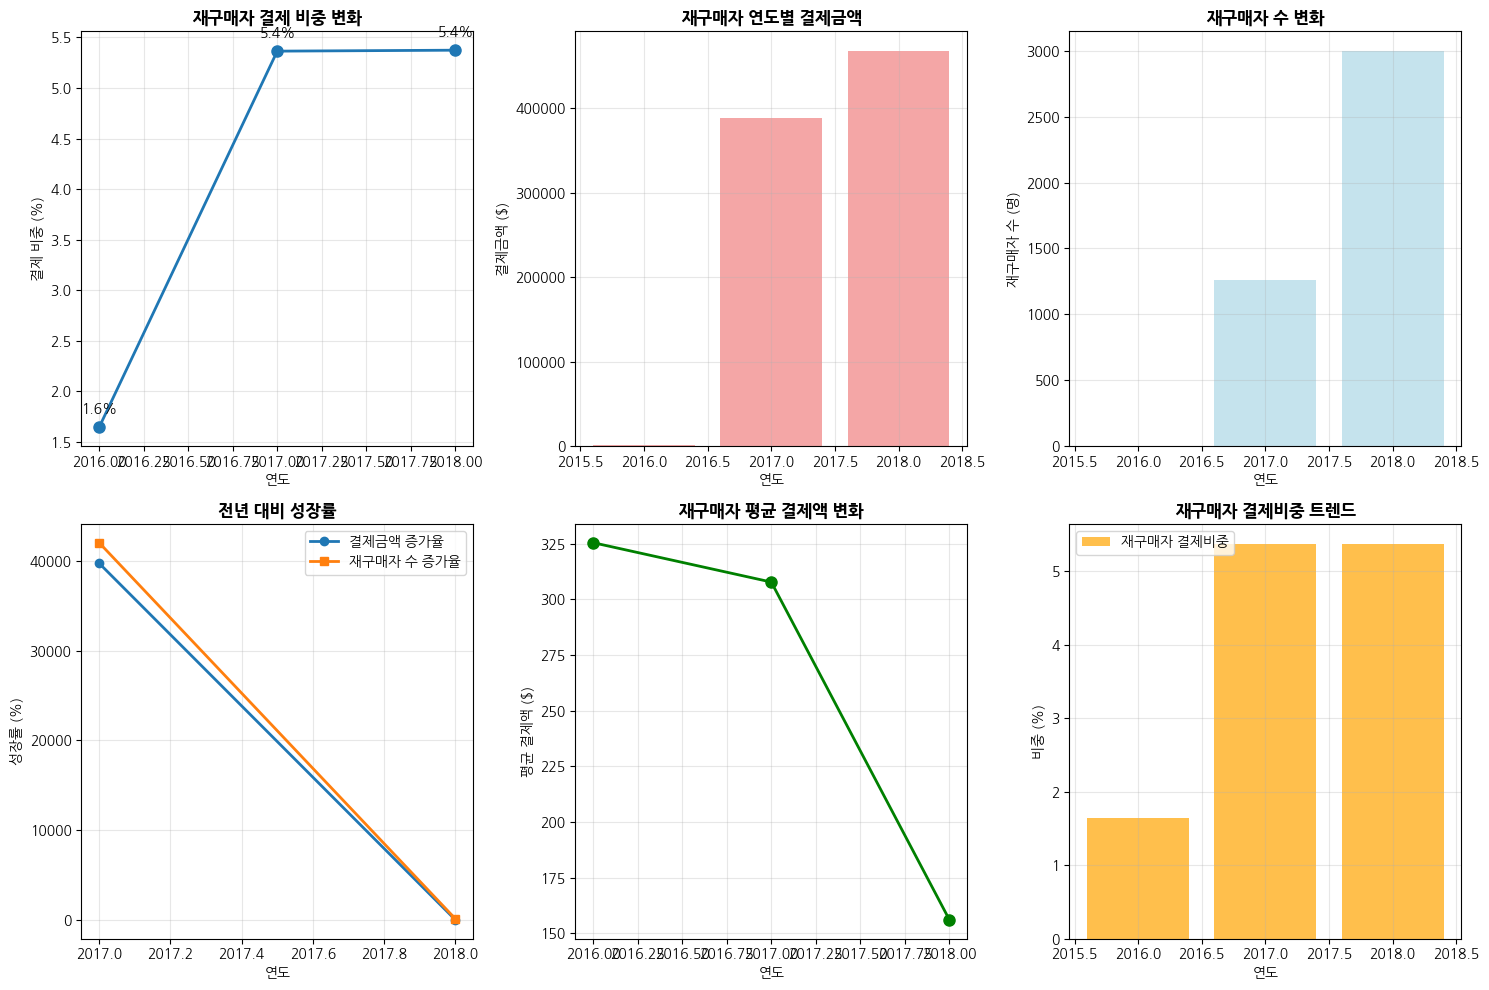


=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ===
Î∂ÑÏÑù Í∏∞Í∞Ñ: 2016ÎÖÑ ~ 2018ÎÖÑ
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Î≥ÄÌôî: 1.6% ‚Üí 5.4%
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Î≥ÄÌôî: $976 ‚Üí $467,549
Ïû¨Íµ¨Îß§Ïûê Ïàò Î≥ÄÌôî: 3Î™Ö ‚Üí 2997Î™Ö

Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎàÑÏ†Å ÏÑ±Ïû•Î•†:
Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: 47796.2%
Ïû¨Íµ¨Îß§Ïûê Ïàò: 99800.0%


In [57]:
# 9. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(15, 10))

# Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î≥ÄÌôî
plt.subplot(2, 3, 1)
plt.plot(yearly_df['year'], yearly_df['repeat_payment_ratio'], marker='o', linewidth=2, markersize=8)
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î≥ÄÌôî', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†ú ÎπÑÏ§ë (%)')
plt.grid(True, alpha=0.3)
for i, (year, ratio) in enumerate(zip(yearly_df['year'], yearly_df['repeat_payment_ratio'])):
    plt.annotate(f'{ratio:.1f}%', (year, ratio), textcoords="offset points", xytext=(0,10), ha='center')

# Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Î≥ÄÌôî
plt.subplot(2, 3, 2)
plt.bar(yearly_df['year'], yearly_df['repeat_payment'], color='lightcoral', alpha=0.7)
plt.title('Ïû¨Íµ¨Îß§Ïûê Ïó∞ÎèÑÎ≥Ñ Í≤∞Ï†úÍ∏àÏï°', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†úÍ∏àÏï° ($)')
plt.grid(True, alpha=0.3)

# Ïû¨Íµ¨Îß§Ïûê Ïàò Î≥ÄÌôî
plt.subplot(2, 3, 3)
plt.bar(yearly_df['year'], yearly_df['repeat_customers'], color='lightblue', alpha=0.7)
plt.title('Ïû¨Íµ¨Îß§Ïûê Ïàò Î≥ÄÌôî', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Ïû¨Íµ¨Îß§Ïûê Ïàò (Î™Ö)')
plt.grid(True, alpha=0.3)

# Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†
plt.subplot(2, 3, 4)
x = yearly_df['year'][1:]  # Ï≤´ Î≤àÏß∏ Ïó∞ÎèÑ Ï†úÏô∏ (ÏÑ±Ïû•Î•† Í≥ÑÏÇ∞ Î∂àÍ∞Ä)
plt.plot(x, yearly_df['payment_growth_rate'][1:], marker='o', label='Í≤∞Ï†úÍ∏àÏï° Ï¶ùÍ∞ÄÏú®', linewidth=2)
plt.plot(x, yearly_df['customer_growth_rate'][1:], marker='s', label='Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¶ùÍ∞ÄÏú®', linewidth=2)
plt.title('Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÏÑ±Ïû•Î•† (%)')
plt.legend()
plt.grid(True, alpha=0.3)

# Ïû¨Íµ¨Îß§Ïûê ÌèâÍ∑† Í≤∞Ï†úÏï° Î≥ÄÌôî
plt.subplot(2, 3, 5)
plt.plot(yearly_df['year'], yearly_df['avg_payment_per_repeat_customer'], marker='o', color='green', linewidth=2, markersize=8)
plt.title('Ïû¨Íµ¨Îß§Ïûê ÌèâÍ∑† Í≤∞Ï†úÏï° Î≥ÄÌôî', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÌèâÍ∑† Í≤∞Ï†úÏï° ($)')
plt.grid(True, alpha=0.3)

# Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§Ïûê ÎπÑÏ§ë ÎπÑÍµê
plt.subplot(2, 3, 6)
plt.bar(yearly_df['year'], yearly_df['repeat_payment_ratio'], color='orange', alpha=0.7, label='Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë')
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Ìä∏Î†åÎìú', fontsize=12, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÎπÑÏ§ë (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Ï¢ÖÌï© ÏöîÏïΩ
print("\n=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ===")
first_year = yearly_df.iloc[0]
last_year = yearly_df.iloc[-1]

print(f"Î∂ÑÏÑù Í∏∞Í∞Ñ: {int(first_year['year'])}ÎÖÑ ~ {int(last_year['year'])}ÎÖÑ")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Î≥ÄÌôî: {first_year['repeat_payment_ratio']:.1f}% ‚Üí {last_year['repeat_payment_ratio']:.1f}%")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Î≥ÄÌôî: ${first_year['repeat_payment']:,.0f} ‚Üí ${last_year['repeat_payment']:,.0f}")
print(f"Ïû¨Íµ¨Îß§Ïûê Ïàò Î≥ÄÌôî: {int(first_year['repeat_customers'])}Î™Ö ‚Üí {int(last_year['repeat_customers'])}Î™Ö")


# Ï†ÑÏ≤¥ Í∏∞Í∞Ñ ÎàÑÏ†Å ÏÑ±Ïû•Î•†
total_payment_growth = ((last_year['repeat_payment'] / first_year['repeat_payment']) - 1) * 100
total_customer_growth = ((last_year['repeat_customers'] / first_year['repeat_customers']) - 1) * 100

print(f"\nÏ†ÑÏ≤¥ Í∏∞Í∞Ñ ÎàÑÏ†Å ÏÑ±Ïû•Î•†:")
print(f"Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: {total_payment_growth:.1f}%")
print(f"Ïû¨Íµ¨Îß§Ïûê Ïàò: {total_customer_growth:.1f}%")


=== Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÎπÑÏ§ëÏùò Ïó∞ÎèÑÎ≥Ñ ÏÑ±Ïû•ÏÑ∏ ===
   year  total_payment  repeat_payment  new_payment  repeat_payment_share  \
0  2016       59362.34          976.17     58386.17                  1.64   
1  2017     7249746.73       388939.17   6860807.56                  5.36   
2  2018     8699763.05       467548.80   8232214.25                  5.37   

   new_payment_share  total_customers  repeat_customers  new_customers  \
0              98.36              326                 3            323   
1              94.64            43713              1261          42452   
2              94.63            52749              1799          50950   

   avg_repeat_payment  avg_new_payment  payment_share_growth  \
0              325.39           180.76                   NaN   
1              308.44           161.61                226.25   
2              259.89           161.57                  0.18   

   payment_amount_growth  customer_count_growth  
0                    Na

<Figure size 1600x1200 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë ÏÑ±Ïû• Ï∂îÏÑ∏')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†ú ÎπÑÏ§ë (%)')

([<matplotlib.axis.XTick at 0x7d3c6a3ea5d0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 15, '1.6%')

Text(0, 15, '5.4%')

Text(0, 15, '5.4%')

<Axes: >

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê vs 1Ìöå Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†ú ÎπÑÏ§ë (%)')

([<matplotlib.axis.XTick at 0x7d3c69519ad0>,
 [Text(0, 0, '2016'), Text(1, 0, '2017'), Text(2, 0, '2018')])

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†úÍ∏àÏï° ($)')

([<matplotlib.axis.XTick at 0x7d3c69282d90>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 5, '$976')

Text(0, 5, '$388,939')

Text(0, 5, '$467,549')

<Axes: >

Text(0.5, 1.0, 'Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'ÏÑ±Ïû•Î•† (%)')

([<matplotlib.axis.XTick at 0x7d3c692a7410>,
 [Text(2017, 0, '2017'), Text(2018, 0, '2018')])

<Axes: >

Text(0.5, 1.0, 'ÌèâÍ∑† Í≤∞Ï†úÏï° ÎπÑÍµê')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'ÌèâÍ∑† Í≤∞Ï†úÏï° ($)')

([<matplotlib.axis.XTick at 0x7d3c692e60d0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

<Axes: >

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë ÏÑ±Ïû• Ï∂îÏÑ∏')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†ú ÎπÑÏ§ë (%)')

([<matplotlib.axis.XTick at 0x7d3c6931dfd0>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

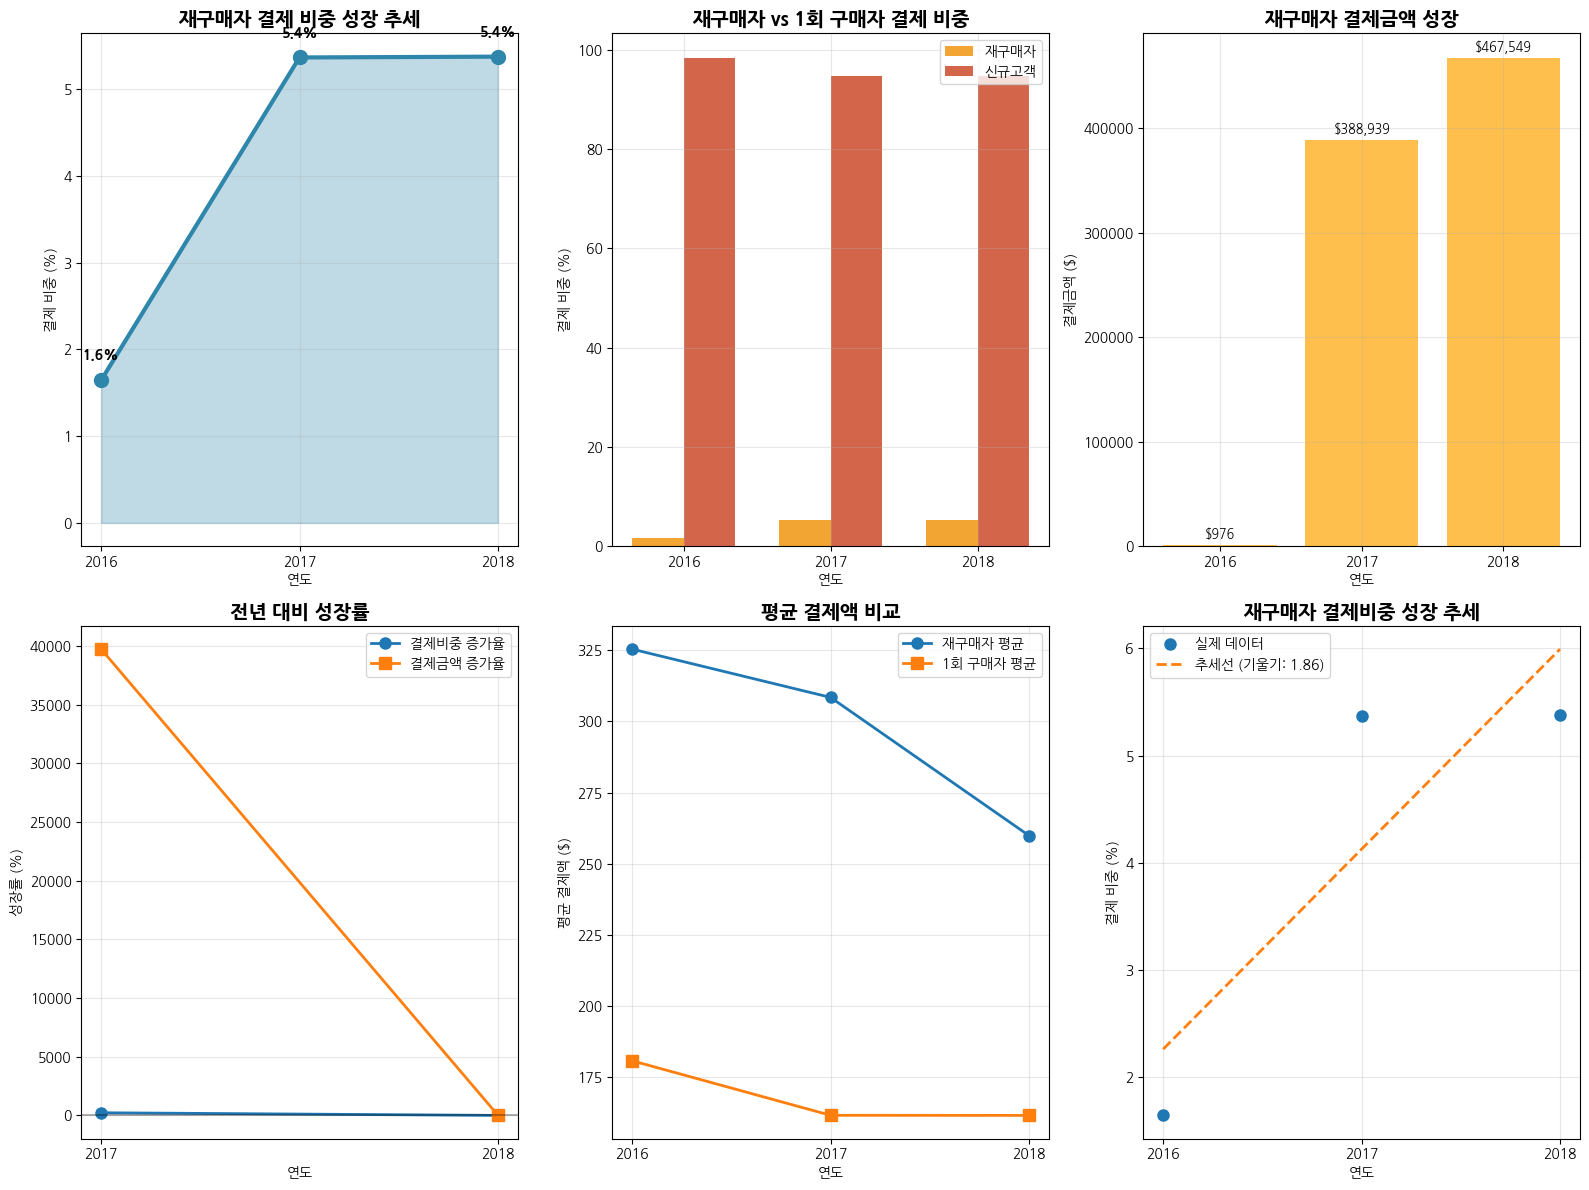


=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ===
üìä Î∂ÑÏÑù Í∏∞Í∞Ñ: 2016ÎÖÑ ~ 2018ÎÖÑ (2ÎÖÑÍ∞Ñ)
üìà Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Î≥ÄÌôî: 1.6% ‚Üí 5.4%
üìä Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† (CAGR): 80.8%
üìä Ï†àÎåÄ ÏÑ±Ïû•: 3.7%p Ï¶ùÍ∞Ä
üìä ÏµúÎåÄ ÏÑ±Ïû•Î•†: 2017ÎÖÑ 226.2%p

üí∞ Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•:
  Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: $976 ‚Üí $467,549
  Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï¥ù ÏÑ±Ïû•Î•†: 47796.2%

üë• Í≥†Í∞ù Ïàò Î≥ÄÌôî:
  Ïû¨Íµ¨Îß§Ïûê Ïàò: 3Î™Ö ‚Üí 1799Î™Ö
  Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¥ù ÏÑ±Ïû•Î•†: 59866.7%

üîç ÏÑ±Ïû• ÎèôÎ†• Î∂ÑÏÑù:
  Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¶ùÍ∞Ä Í∏∞Ïó¨ÎèÑ: 59866.7%
  1Ïù∏Îãπ ÌèâÍ∑† Í≤∞Ï†úÏï° Ï¶ùÍ∞Ä Í∏∞Ïó¨ÎèÑ: -12070.4%

‚öñÔ∏è Í≥†Í∞ù Íµ¨ÏÑ± Î≥ÄÌôî:
  2016ÎÖÑ - Ïû¨Íµ¨Îß§Ïûê: 1.6%, 1Ìöå Íµ¨Îß§Ïûê: 98.4%
  2018ÎÖÑ - Ïû¨Íµ¨Îß§Ïûê: 5.4%, 1Ìöå Íµ¨Îß§Ïûê: 94.6%


In [58]:
# Ïó∞ÎèÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ (ÏõîÎ≥Ñ Î∂ÑÎ¶¨ Î¨∏Ï†ú Ìï¥Í≤∞)
# Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïó∞ÎèÑÎßå Ï∂îÏ∂úÌïòÏó¨ Ï†ïÎ¶¨
orders_with_customer_year['year'] = orders_with_customer_year['order_purchase_timestamp'].dt.year

# 2. Ïó∞ÎèÑÎ≥Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Î∂ÑÏÑù
def analyze_repeat_customer_payment_share():
    years = sorted(orders_with_customer_year['year'].unique())
    analysis_results = []

    for year in years:
        # Ìï¥Îãπ Ïó∞ÎèÑÏùò Î™®Îì† Ï£ºÎ¨∏
        year_orders = orders_with_customer_year[orders_with_customer_year['year'] == year]

        # Ìï¥Îãπ Ïó∞ÎèÑÍπåÏßÄ ÎàÑÏ†ÅÏúºÎ°ú Ïû¨Íµ¨Îß§Ïûê ÏãùÎ≥Ñ (Í≥ºÍ±∞ Íµ¨Îß§ Ïù¥Î†• Ìè¨Ìï®)
        historical_orders = orders_with_customer_year[orders_with_customer_year['year'] <= year]
        customer_order_counts = historical_orders['customer_unique_id'].value_counts()
        repeat_customers = customer_order_counts[customer_order_counts > 1].index.tolist()

        # Ìï¥Îãπ Ïó∞ÎèÑÏùò Ïû¨Íµ¨Îß§Ïûê Ï£ºÎ¨∏Îßå Ï∂îÏ∂ú
        repeat_orders_in_year = year_orders[year_orders['customer_unique_id'].isin(repeat_customers)]

        # Í≤∞Ï†ú Ï†ïÎ≥¥ Î≥ëÌï©
        # Ï†ÑÏ≤¥ Í≤∞Ï†ú
        total_year_payments = pd.merge(
            year_orders[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú
        repeat_year_payments = pd.merge(
            repeat_orders_in_year[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # Ïã†Í∑úÍ≥†Í∞ù Í≤∞Ï†ú (Ìï¥Îãπ Ïó∞ÎèÑÏóê Ï≤òÏùå Íµ¨Îß§Ìïú Í≥†Í∞ù)
        new_customers_in_year = year_orders[~year_orders['customer_unique_id'].isin(repeat_customers)]
        new_year_payments = pd.merge(
            new_customers_in_year[['order_id']],
            order_payments,
            on='order_id',
            how='inner'
        )

        # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
        total_payment = total_year_payments['payment_value'].sum()
        repeat_payment = repeat_year_payments['payment_value'].sum()
        new_payment = new_year_payments['payment_value'].sum()

        repeat_payment_share = (repeat_payment / total_payment * 100) if total_payment > 0 else 0
        new_payment_share = (new_payment / total_payment * 100) if total_payment > 0 else 0

        # Í≥†Í∞ù Ïàò ÌÜµÍ≥Ñ
        total_customers = year_orders['customer_unique_id'].nunique()
        repeat_customer_count = repeat_orders_in_year['customer_unique_id'].nunique()
        new_customer_count = new_customers_in_year['customer_unique_id'].nunique()

        # ÌèâÍ∑† Í≤∞Ï†úÏï°
        avg_repeat_payment = repeat_payment / repeat_customer_count if repeat_customer_count > 0 else 0
        avg_new_payment = new_payment / new_customer_count if new_customer_count > 0 else 0

        analysis_results.append({
            'year': year,
            'total_payment': total_payment,
            'repeat_payment': repeat_payment,
            'new_payment': new_payment,
            'repeat_payment_share': repeat_payment_share,
            'new_payment_share': new_payment_share,
            'total_customers': total_customers,
            'repeat_customers': repeat_customer_count,
            'new_customers': new_customer_count,
            'avg_repeat_payment': avg_repeat_payment,
            'avg_new_payment': avg_new_payment
        })

    return pd.DataFrame(analysis_results)

# 3. Î∂ÑÏÑù Ïã§Ìñâ
yearly_share_df = analyze_repeat_customer_payment_share()

# 4. ÏÑ±Ïû•Î•† Í≥ÑÏÇ∞
yearly_share_df['payment_share_growth'] = yearly_share_df['repeat_payment_share'].pct_change() * 100
yearly_share_df['payment_amount_growth'] = yearly_share_df['repeat_payment'].pct_change() * 100
yearly_share_df['customer_count_growth'] = yearly_share_df['repeat_customers'].pct_change() * 100

# 5. Í≤∞Í≥º Ï∂úÎ†•
print("=== Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÎπÑÏ§ëÏùò Ïó∞ÎèÑÎ≥Ñ ÏÑ±Ïû•ÏÑ∏ ===")
print(yearly_share_df.round(2))

print("\n=== Ïó∞ÎèÑÎ≥Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
for _, row in yearly_share_df.iterrows():
    print(f"\n{int(row['year'])}ÎÖÑ:")
    print(f"  Ï†ÑÏ≤¥ Í≤∞Ï†úÍ∏àÏï°: ${row['total_payment']:,.0f}")
    print(f"  Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: ${row['repeat_payment']:,.0f} ({row['repeat_payment_share']:.1f}%)")
    print(f"  1Ìöå Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: ${row['new_payment']:,.0f} ({row['new_payment_share']:.1f}%)")
    print(f"  Ïû¨Íµ¨Îß§Ïûê {int(row['repeat_customers'])}Î™Ö vs 1Ìöå Íµ¨Îß§Ïûê {int(row['new_customers'])}Î™Ö")

# 6. ÏÑ±Ïû•Î•† Î∂ÑÏÑù
print("\n=== Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•† ===")
for _, row in yearly_share_df.iterrows():
    if not pd.isna(row['payment_share_growth']):
        print(f"\n{int(row['year'])}ÎÖÑ (Ï†ÑÎÖÑ ÎåÄÎπÑ):")
        print(f"  Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Ï¶ùÍ∞ÄÏú®: {row['payment_share_growth']:+.1f}%p")
        print(f"  Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï¶ùÍ∞ÄÏú®: {row['payment_amount_growth']:+.1f}%")
        print(f"  Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¶ùÍ∞ÄÏú®: {row['customer_count_growth']:+.1f}%")

# 7. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 12))

# 1) Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë Ìä∏Î†åÎìú (Î©îÏù∏ Ï∞®Ìä∏)
plt.subplot(2, 3, 1)
plt.plot(yearly_share_df['year'], yearly_share_df['repeat_payment_share'],
         marker='o', linewidth=3, markersize=10, color='#2E86AB')
plt.fill_between(yearly_share_df['year'], yearly_share_df['repeat_payment_share'],
                 alpha=0.3, color='#2E86AB')
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë ÏÑ±Ïû• Ï∂îÏÑ∏', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†ú ÎπÑÏ§ë (%)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # Ïó∞ÎèÑÎßå ÌëúÏãú
# Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïóê ÏàòÏπò ÌëúÏãú
for i, (year, share) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment_share'])):
    plt.annotate(f'{share:.1f}%', (year, share),
                textcoords="offset points", xytext=(0,15), ha='center', fontweight='bold')

# 2) Ïû¨Íµ¨Îß§Ïûê vs Ïã†Í∑úÍ≥†Í∞ù Í≤∞Ï†ú ÎπÑÏ§ë ÎπÑÍµê
plt.subplot(2, 3, 2)
width = 0.35
x = np.arange(len(yearly_share_df))
plt.bar(x - width/2, yearly_share_df['repeat_payment_share'], width,
        label='Ïû¨Íµ¨Îß§Ïûê', color='#F18F01', alpha=0.8)
plt.bar(x + width/2, yearly_share_df['new_payment_share'], width,
        label='Ïã†Í∑úÍ≥†Í∞ù', color='#C73E1D', alpha=0.8)
plt.title('Ïû¨Íµ¨Îß§Ïûê vs 1Ìöå Íµ¨Îß§Ïûê Í≤∞Ï†ú ÎπÑÏ§ë', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†ú ÎπÑÏ§ë (%)')
plt.xticks(x, yearly_share_df['year'].astype(int))
plt.legend()
plt.grid(True, alpha=0.3)

# 3) Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï†àÎåÄÍ∞í ÏÑ±Ïû•
plt.subplot(2, 3, 3)
plt.bar(yearly_share_df['year'], yearly_share_df['repeat_payment'],
        color='orange', alpha=0.7)
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†úÍ∏àÏï° ($)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # Ïó∞ÎèÑÎßå ÌëúÏãú
# Í∏àÏï° ÌëúÏãú
for i, (year, amount) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment'])):
    plt.annotate(f'${amount:,.0f}', (year, amount),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

# 4) Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†
plt.subplot(2, 3, 4)
x_growth = yearly_share_df['year'][1:]
plt.plot(x_growth, yearly_share_df['payment_share_growth'][1:],
         marker='o', label='Í≤∞Ï†úÎπÑÏ§ë Ï¶ùÍ∞ÄÏú®', linewidth=2, markersize=8)
plt.plot(x_growth, yearly_share_df['payment_amount_growth'][1:],
         marker='s', label='Í≤∞Ï†úÍ∏àÏï° Ï¶ùÍ∞ÄÏú®', linewidth=2, markersize=8)
plt.title('Ï†ÑÎÖÑ ÎåÄÎπÑ ÏÑ±Ïû•Î•†', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÏÑ±Ïû•Î•† (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xticks(x_growth)  # Ïó∞ÎèÑÎßå ÌëúÏãú

# 5) Ïû¨Íµ¨Îß§Ïûê ÌèâÍ∑† Í≤∞Ï†úÏï° vs Ïã†Í∑úÍ≥†Í∞ù ÌèâÍ∑† Í≤∞Ï†úÏï°
plt.subplot(2, 3, 5)
plt.plot(yearly_share_df['year'], yearly_share_df['avg_repeat_payment'],
         marker='o', label='Ïû¨Íµ¨Îß§Ïûê ÌèâÍ∑†', linewidth=2, markersize=8)
plt.plot(yearly_share_df['year'], yearly_share_df['avg_new_payment'],
         marker='s', label='1Ìöå Íµ¨Îß§Ïûê ÌèâÍ∑†', linewidth=2, markersize=8)
plt.title('ÌèâÍ∑† Í≤∞Ï†úÏï° ÎπÑÍµê', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÌèâÍ∑† Í≤∞Ï†úÏï° ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # Ïó∞ÎèÑÎßå ÌëúÏãú

# 6) Ïû¨Íµ¨Îß§Ïûê ÎπÑÏ§ë ÏÑ±Ïû• Ìä∏Î†åÎìú (ÏÑ†Ìòï ÌöåÍ∑Ä)
plt.subplot(2, 3, 6)
x_vals = yearly_share_df['year'].values
y_vals = yearly_share_df['repeat_payment_share'].values
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)
plt.plot(x_vals, y_vals, 'o', markersize=8, label='Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞')
plt.plot(x_vals, p(x_vals), "--", linewidth=2, label=f'Ï∂îÏÑ∏ÏÑ† (Í∏∞Ïö∏Í∏∞: {z[0]:.2f})')
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë ÏÑ±Ïû• Ï∂îÏÑ∏', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†ú ÎπÑÏ§ë (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # Ïó∞ÎèÑÎßå ÌëúÏãú

plt.tight_layout()
plt.show()

# 8. Ï¢ÖÌï© Î∂ÑÏÑù Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏
print("\n" + "="*50)
print("=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ===")
print("="*50)

first_year = yearly_share_df.iloc[0]
last_year = yearly_share_df.iloc[-1]
years_span = int(last_year['year'] - first_year['year'])

print(f"üìä Î∂ÑÏÑù Í∏∞Í∞Ñ: {int(first_year['year'])}ÎÖÑ ~ {int(last_year['year'])}ÎÖÑ ({years_span}ÎÖÑÍ∞Ñ)")
print(f"üìà Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÎπÑÏ§ë Î≥ÄÌôî: {first_year['repeat_payment_share']:.1f}% ‚Üí {last_year['repeat_payment_share']:.1f}%")

# Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† Í≥ÑÏÇ∞
if years_span > 0:
    cagr = ((last_year['repeat_payment_share'] / first_year['repeat_payment_share']) ** (1/years_span) - 1) * 100
    print(f"üìä Ïó∞ÌèâÍ∑† ÏÑ±Ïû•Î•† (CAGR): {cagr:.1f}%")

# Ï†àÎåÄ ÏÑ±Ïû• Ìè¨Ïù∏Ìä∏
growth_points = last_year['repeat_payment_share'] - first_year['repeat_payment_share']
print(f"üìä Ï†àÎåÄ ÏÑ±Ïû•: {growth_points:.1f}%p Ï¶ùÍ∞Ä")

# ÏµúÍ≥† ÏÑ±Ïû•Î•† Ïó∞ÎèÑ
max_growth_idx = yearly_share_df['payment_share_growth'].idxmax()
if not pd.isna(yearly_share_df.loc[max_growth_idx, 'payment_share_growth']):
    max_growth_year = int(yearly_share_df.loc[max_growth_idx, 'year'])
    max_growth_rate = yearly_share_df.loc[max_growth_idx, 'payment_share_growth']
    print(f"üìä ÏµúÎåÄ ÏÑ±Ïû•Î•†: {max_growth_year}ÎÖÑ {max_growth_rate:.1f}%p")

print(f"\nüí∞ Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•:")
print(f"  Ï†ÑÏ≤¥ Í∏∞Í∞Ñ Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï°: ${first_year['repeat_payment']:,.0f} ‚Üí ${last_year['repeat_payment']:,.0f}")
payment_growth = ((last_year['repeat_payment'] / first_year['repeat_payment']) - 1) * 100
print(f"  Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï¥ù ÏÑ±Ïû•Î•†: {payment_growth:.1f}%")

print(f"\nüë• Í≥†Í∞ù Ïàò Î≥ÄÌôî:")
print(f"  Ïû¨Íµ¨Îß§Ïûê Ïàò: {int(first_year['repeat_customers'])}Î™Ö ‚Üí {int(last_year['repeat_customers'])}Î™Ö")
customer_growth = ((last_year['repeat_customers'] / first_year['repeat_customers']) - 1) * 100
print(f"  Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¥ù ÏÑ±Ïû•Î•†: {customer_growth:.1f}%")

# ÏÑ±Ïû• ÎèôÎ†• Î∂ÑÏÑù
print(f"\nüîç ÏÑ±Ïû• ÎèôÎ†• Î∂ÑÏÑù:")
print(f"  Ïû¨Íµ¨Îß§Ïûê Ïàò Ï¶ùÍ∞Ä Í∏∞Ïó¨ÎèÑ: {customer_growth:.1f}%")
print(f"  1Ïù∏Îãπ ÌèâÍ∑† Í≤∞Ï†úÏï° Ï¶ùÍ∞Ä Í∏∞Ïó¨ÎèÑ: {payment_growth - customer_growth:.1f}%")

# Ïû¨Íµ¨Îß§Ïûê vs 1Ìöå Íµ¨Îß§Ïûê ÎπÑÏ§ë Î≥ÄÌôî
print(f"\n‚öñÔ∏è Í≥†Í∞ù Íµ¨ÏÑ± Î≥ÄÌôî:")
print(f"  {int(first_year['year'])}ÎÖÑ - Ïû¨Íµ¨Îß§Ïûê: {first_year['repeat_payment_share']:.1f}%, 1Ìöå Íµ¨Îß§Ïûê: {first_year['new_payment_share']:.1f}%")
print(f"  {int(last_year['year'])}ÎÖÑ - Ïû¨Íµ¨Îß§Ïûê: {last_year['repeat_payment_share']:.1f}%, 1Ìöå Íµ¨Îß§Ïûê: {last_year['new_payment_share']:.1f}%")

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•')

Text(0.5, 0, 'Ïó∞ÎèÑ')

Text(0, 0.5, 'Í≤∞Ï†úÍ∏àÏï° ($)')

([<matplotlib.axis.XTick at 0x7d3c6a345450>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

Text(0, 5, '$976')

Text(0, 5, '$388,939')

Text(0, 5, '$467,549')

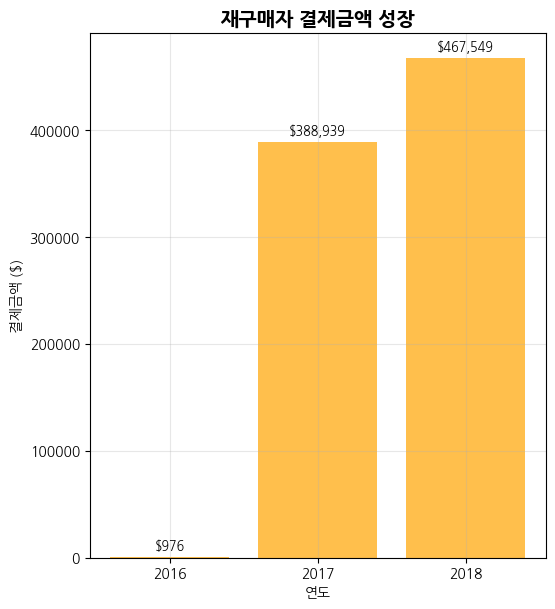

In [47]:

# 3) Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° Ï†àÎåÄÍ∞í ÏÑ±Ïû•
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 3)
plt.bar(yearly_share_df['year'], yearly_share_df['repeat_payment'],
        color='orange', alpha=0.7)
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÍ∏àÏï° ÏÑ±Ïû•', fontsize=14, fontweight='bold')
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('Í≤∞Ï†úÍ∏àÏï° ($)')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_share_df['year'])  # Ïó∞ÎèÑÎßå ÌëúÏãú
# Í∏àÏï° ÌëúÏãú
for i, (year, amount) in enumerate(zip(yearly_share_df['year'], yearly_share_df['repeat_payment'])):
    plt.annotate(f'${amount:,.0f}', (year, amount),
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

# Ïû¨Íµ¨Îß§Ïûê Î∞è Í≤∞Ï†úÏ∑®ÏÜåÏûêÏùò ÏÉÅÏúÑÏπ¥ÌÖåÍ≥†Î¶¨


=== ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÏÑù ===
Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨:
Ï∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 10Í∞ú:
product_category_name
esporte_lazer             51
utilidades_domesticas     49
informatica_acessorios    46
moveis_decoracao          36
beleza_saude              36
brinquedos                34
automotivo                31
bebes                     22
relogios_presentes        21
ferramentas_jardim        19
Name: count, dtype: int64

Ï∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:
1. esporte_lazer: 51Í±¥ (3.9%)
2. utilidades_domesticas: 49Í±¥ (3.7%)
3. informatica_acessorios: 46Í±¥ (3.5%)
4. moveis_decoracao: 36Í±¥ (2.7%)
5. beleza_saude: 36Í±¥ (2.7%)

=== Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® Î∂ÑÏÑù ===
Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® ÏÉÅÏúÑ 10Í∞ú:
                                         category  cancel_rate
70                                       pc_gamer        11.11
67  portateis_cozinha_e_preparadores_de_alimentos         6.67
56                                   d

<Figure size 2000x1500 with 0 Axes>

<Axes: >

<Axes: xlabel='payment_type'>

Text(0.5, 1.0, 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ ÎπÑÏú® ÎπÑÍµê')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'ÎπÑÏú® (%)')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c6a202b90>,
 [Text(-0.9327443349769929, -0.5830849042535121, 'credit_card'),
  Text(1.0903153278852935, 0.14564506781345274, 'boleto'),
  Text(0.49245881837974714, 0.9836078040560798, 'voucher'),
  Text(0.04998917708171466, 1.0988635411982204, 'debit_card'),
  Text(0.007894648877566319, 1.0999716698711381, 'not_defined')],
 [Text(-0.5087696372601779, -0.31804631141100653, '67.8%'),
  Text(0.5947174515737964, 0.0794427642618833, '18.7%'),
  Text(0.2686139009344075, 0.5365133476669526, '12.3%'),
  Text(0.027266823862753448, 0.5993801133808474, '1.0%'),
  Text(0.004306172115036174, 0.5999845472024389, '0.2%')])

Text(0.5, 1.0, 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨')

<Axes: >

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7d3c6831e410>,
 [Text(0, 0, 'esporte_lazer'),
  Text(0, 1, 'utilidades_domesticas'),
  Text(0, 2, 'informatica_acessorios'),
  Text(0, 3, 'moveis_decoracao'),
  Text(0, 4, 'beleza_saude'),
  Text(0, 5, 'brinquedos'),
  Text(0, 6, 'automotivo'),
  Text(0, 7, 'bebes'),
  Text(0, 8, 'relogios_presentes'),
  Text(0, 9, 'ferramentas_jardim')])

Text(0.5, 1.0, 'Ï∑®ÏÜå ÏÉÅÏúÑ 10Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨')

Text(0.5, 0, 'Ï∑®ÏÜå Í±¥Ïàò')

<Axes: >

<BarContainer object of 10 artists>

([<matplotlib.axis.YTick at 0x7d3c66f88410>,
 [Text(0, 0, 'pc_gamer'),
  Text(0, 1, 'portateis_cozinha_e_preparadores_de_alimentos'),
  Text(0, 2, 'dvds_blu_ray'),
  Text(0, 3, 'construcao_ferramentas_seguranca'),
  Text(0, 4, 'fraldas_higiene'),
  Text(0, 5, 'construcao_ferramentas_jardim'),
  Text(0, 6, 'instrumentos_musicais'),
  Text(0, 7, 'livros_interesse_geral'),
  Text(0, 8, 'eletrodomesticos_2'),
  Text(0, 9, 'eletroportateis')])

Text(0.5, 1.0, 'Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® ÏÉÅÏúÑ 10Í∞ú')

Text(0.5, 0, 'Ï∑®ÏÜåÏú® (%)')

<Axes: >

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò')

Text(0.5, 0, 'Í≤∞Ï†ú Î∞©Î≤ï')

Text(0, 0.5, 'Ï∑®ÏÜå Í±¥Ïàò')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c66f49a90>,
 [Text(-0.7376130385139802, 0.816043507059626, 'esporte_lazer'),
  Text(-0.9045888755609284, -0.6258745610834613, 'utilidades_domesticas'),
  Text(0.431910959486407, -1.0116585012125048, 'informatica_acessorios'),
  Text(1.0998857773330375, 0.015851713487822307, 'moveis_decoracao'),
  Text(0.5454180619471632, 0.9552586758055645, 'beleza_saude')],
 [Text(-0.40233438464398913, 0.44511464021434144, '23.4%'),
  Text(-0.49341211394232454, -0.3413861242273425, '22.5%'),
  Text(0.2355877960834947, -0.5518137279340934, '21.1%'),
  Text(0.5999376967271113, 0.008646389175175804, '16.5%'),
  Text(0.297500761062089, 0.5210501868030352, '16.5%')])

Text(0.5, 1.0, 'Ï∑®ÏÜå ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨')

<Axes: >

<Axes: xlabel='product_category_name', ylabel='payment_type'>

Text(0.5, 1.0, 'Í≤∞Ï†úÎ∞©Î≤ï vs Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∑®ÏÜå Í±¥Ïàò')

Text(0.5, 136.7222222222222, 'ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨')

Text(1030.4178743961354, 0.5, 'Í≤∞Ï†ú Î∞©Î≤ï')

<Axes: >

Text(0.5, 0, 'Ï∑®ÏÜå Í±¥Ïàò')

Text(0, 0.5, 'Ï∑®ÏÜåÏú® (%)')

Text(0.5, 1.0, 'Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜå Í±¥Ïàò vs Ï∑®ÏÜåÏú®')

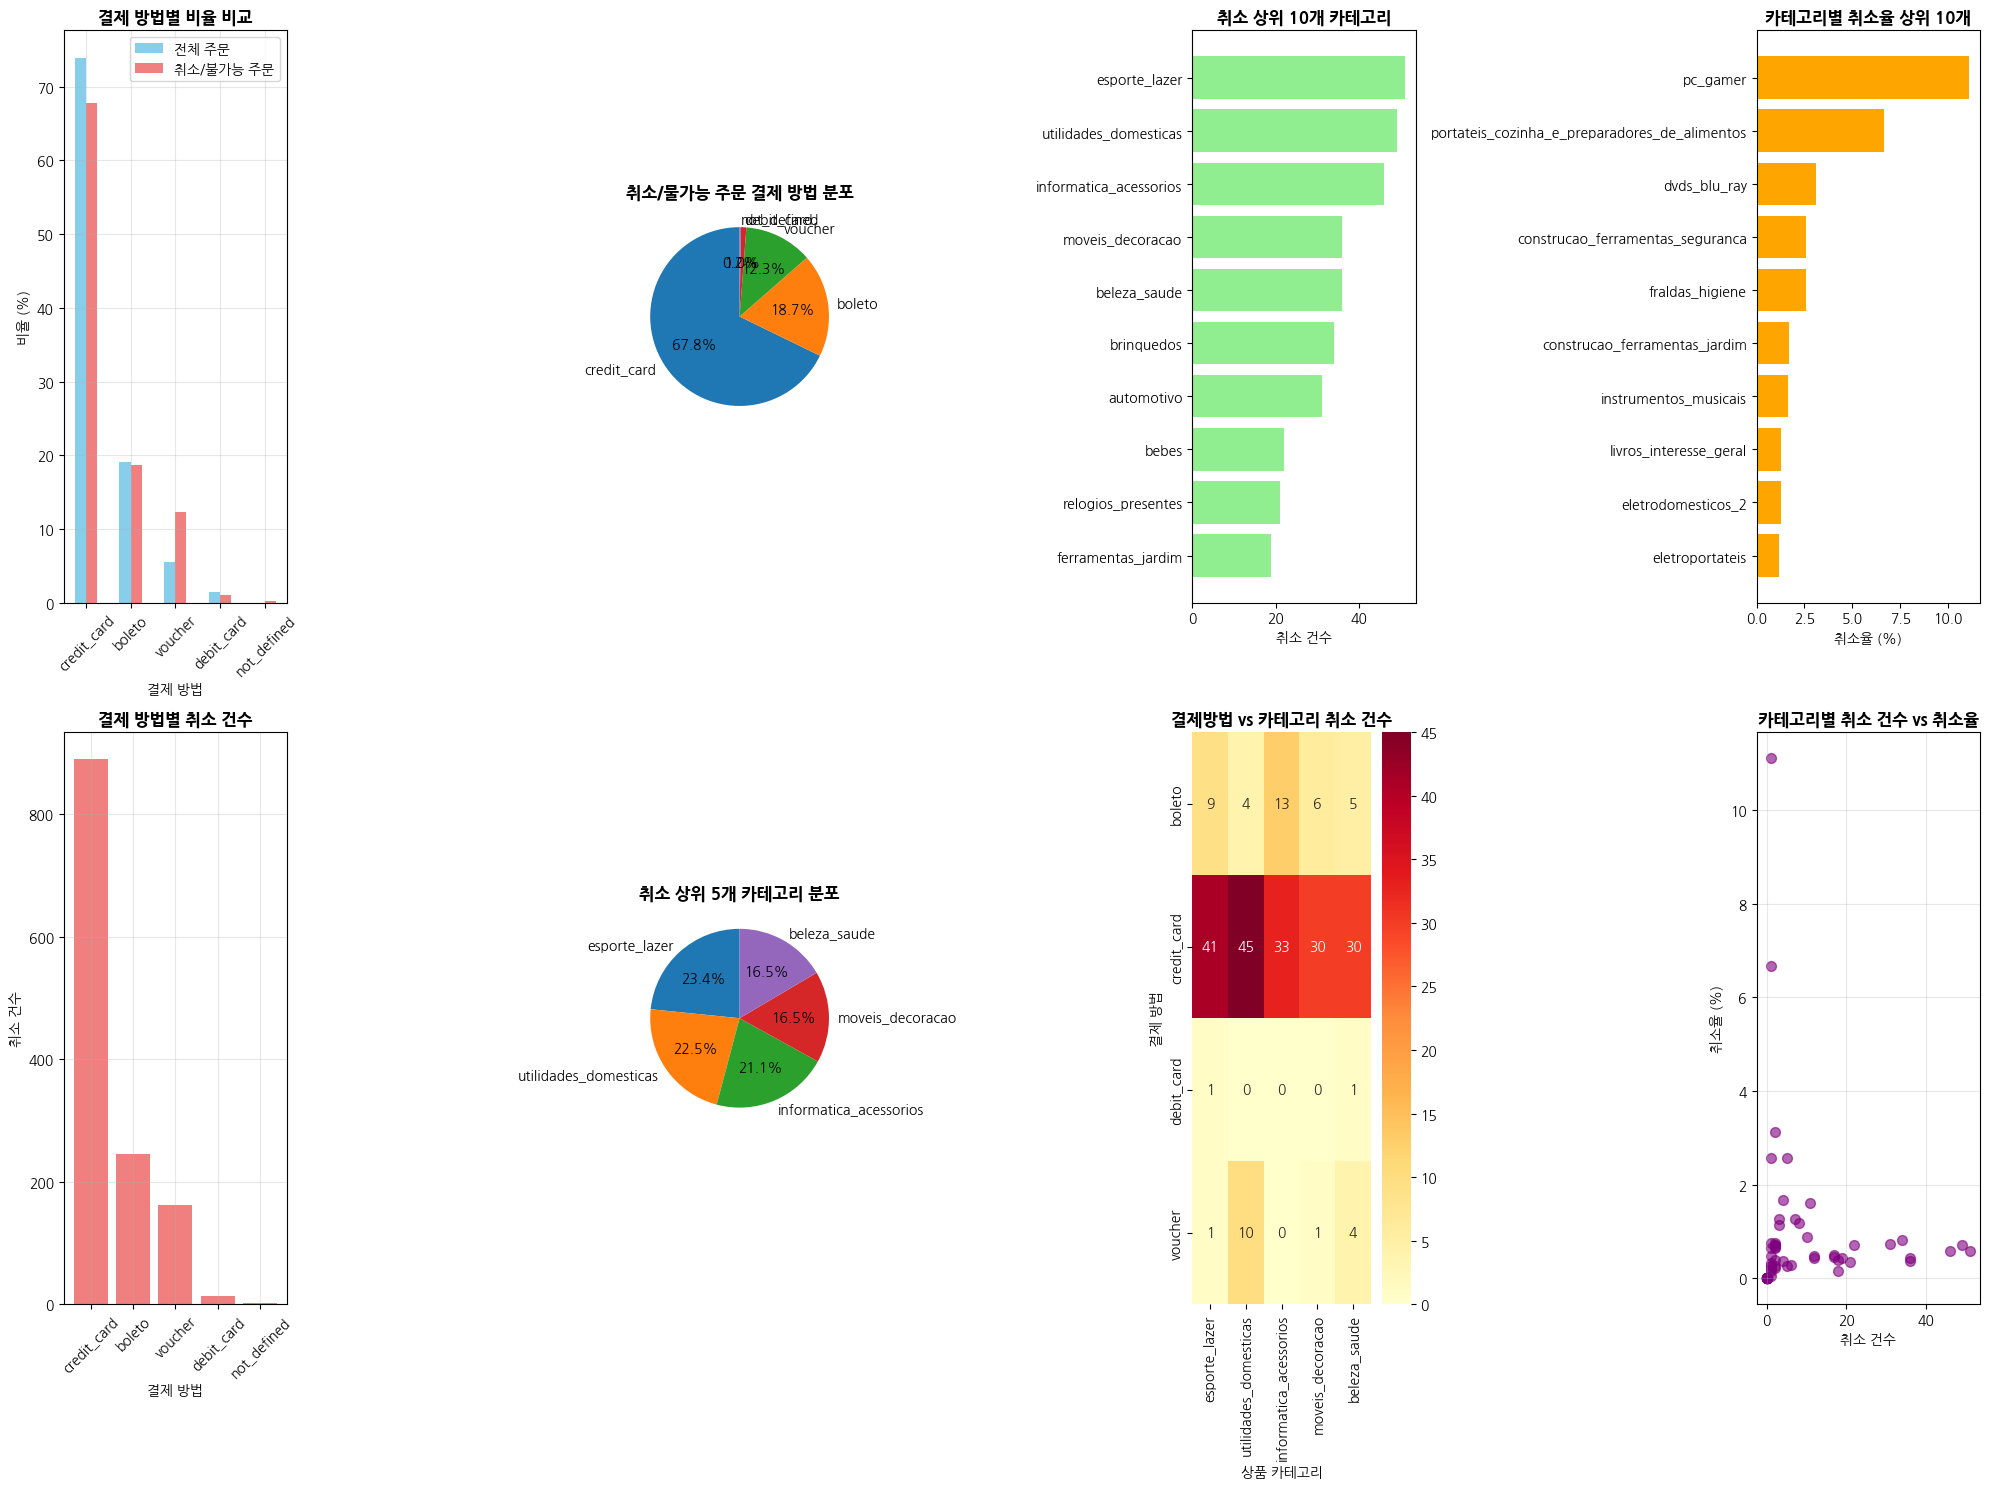


=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ ===
üìä Ï†ÑÏ≤¥ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏: 1,234Í±¥
üí≥ Ï£ºÏöî Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå ÌòÑÌô©:
   - credit_card: 890Í±¥ (67.8%)
   - boleto: 245Í±¥ (18.7%)
   - voucher: 162Í±¥ (12.3%)

üì¶ Ï∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:
   1. esporte_lazer: 51Í±¥ (3.9%)
   2. utilidades_domesticas: 49Í±¥ (3.7%)
   3. informatica_acessorios: 46Í±¥ (3.5%)
   4. moveis_decoracao: 36Í±¥ (2.7%)
   5. beleza_saude: 36Í±¥ (2.7%)

‚ö†Ô∏è Ï∑®ÏÜåÏú®Ïù¥ ÎÜíÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:
   71. pc_gamer: 11.11% (1/9)
   68. portateis_cozinha_e_preparadores_de_alimentos: 6.67% (1/15)
   57. dvds_blu_ray: 3.12% (2/64)
   48. construcao_ferramentas_seguranca: 2.58% (5/194)
   61. fraldas_higiene: 2.56% (1/39)


In [59]:
# Í≤∞Ï†úÏ∑®ÏÜåÏûêÏùò ÏÉÅÏúÑ Ïπ¥ÌÖåÍ≥†Î¶¨
# 1.Ïä§Ìè¨Ï∏†/Î†àÏ†Ä 2.ÏÉùÌôúÏö©Ìíà 3. Ïª¥Ìì®ÌÑ∞/IT Ïï°ÏÑ∏ÏÑúÎ¶¨ 4. Í∞ÄÍµ¨/Ïù∏ÌÖåÎ¶¨Ïñ¥ 5.Î∑∞Ìã∞ Í±¥Í∞ï
# Ïπ¥ÌÖåÍ≥†Î¶¨Ï§ë 1.PC_gamer 2. Ï£ºÎ∞©Ïö©ÏÜåÌòïÍ∞ÄÏ†Ñ Î∞è Ï°∞Î¶¨Í∏∞Íµ¨ 3. DVD/Î∏îÎ£®Î†àÏù¥ 4.Í±¥Ï∂ïÍ≥µÍµ¨ 5.Í∏∞Ï†ÄÍ∏∞ ÏúÑÏÉùÏö©Ìíí„ÖÅ


# 3. ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# Ï£ºÎ¨∏ ÏÉÅÌíà Ï†ïÎ≥¥ Î≥ëÌï© (order_items Îç∞Ïù¥ÌÑ∞ ÌïÑÏöî)
# order_items_datasetÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† ÏßÑÌñâ
try:
    # Ï£ºÎ¨∏ ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
    order_items_with_products = pd.merge(
        order_items,
        products_dataset[['product_id', 'product_category_name']],
        on='product_id',
        how='left'
    )

    # Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò ÏÉÅÌíà Ï†ïÎ≥¥ Ï∂îÏ∂ú
    cancel_orders_with_products = pd.merge(
        cancel_unable_orders[['order_id', 'order_status']],
        order_items_with_products[['order_id', 'product_category_name']],
        on='order_id',
        how='left'
    )

    print("\n=== ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÏÑù ===")
    print("Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏Ïùò ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨:")

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜå Í±¥Ïàò
    cancel_category_counts = cancel_orders_with_products['product_category_name'].value_counts()
    print("Ï∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 10Í∞ú:")
    print(cancel_category_counts.head(10))

    # ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏÑ∏ Î∂ÑÏÑù
    top5_categories = cancel_category_counts.head(5)
    print(f"\nÏ∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:")
    for i, (category, count) in enumerate(top5_categories.items(), 1):
        percentage = (count / len(cancel_orders_with_products)) * 100
        print(f"{i}. {category}: {count}Í±¥ ({percentage:.1f}%)")

    # Ï†ÑÏ≤¥ Ïπ¥ÌÖåÍ≥†Î¶¨ ÎåÄÎπÑ Ï∑®ÏÜåÏú® Î∂ÑÏÑù
    print(f"\n=== Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® Î∂ÑÏÑù ===")

    # Ï†ÑÏ≤¥ Ï£ºÎ¨∏ÏóêÏÑú Í∞Å Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Ï£ºÎ¨∏ Ïàò
    total_category_counts = order_items_with_products['product_category_name'].value_counts()

    # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® Í≥ÑÏÇ∞
    category_cancel_rates = []
    for category in total_category_counts.index:
        total_orders = total_category_counts[category]
        cancel_orders = cancel_category_counts.get(category, 0)
        cancel_rate = (cancel_orders / total_orders) * 100
        category_cancel_rates.append({
            'category': category,
            'total_orders': total_orders,
            'cancel_orders': cancel_orders,
            'cancel_rate': cancel_rate
        })

    cancel_rate_df = pd.DataFrame(category_cancel_rates)
    cancel_rate_df = cancel_rate_df.sort_values('cancel_rate', ascending=False)

    print("Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® ÏÉÅÏúÑ 10Í∞ú:")
    print(cancel_rate_df.head(10)[['category', 'cancel_rate']].round(2))

    category_analysis_available = True

except Exception as e:
    print(f"\nÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ order_items_datasetÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.")
    print("order_items_datasetÏùÑ Î°úÎìúÌïú ÌõÑ Îã§Ïãú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
    category_analysis_available = False

# 4. Í≤∞Ï†ú Î∞©Î≤ïÍ≥º Ïπ¥ÌÖåÍ≥†Î¶¨ ÍµêÏ∞® Î∂ÑÏÑù (Ïπ¥ÌÖåÍ≥†Î¶¨ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞)
if category_analysis_available:
    try:
        # Ï∑®ÏÜå Ï£ºÎ¨∏Ïùò Í≤∞Ï†ú Î∞©Î≤ïÍ≥º Ïπ¥ÌÖåÍ≥†Î¶¨ ÍµêÏ∞® Î∂ÑÏÑù
        cancel_payment_category = pd.merge(
            cancel_orders_with_payment,
            cancel_orders_with_products[['order_id', 'product_category_name']],
            on='order_id',
            how='inner'
        )

        print(f"\n=== Í≤∞Ï†ú Î∞©Î≤ï vs ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨ ÍµêÏ∞® Î∂ÑÏÑù ===")
        cross_analysis = pd.crosstab(
            cancel_payment_category['payment_type'],
            cancel_payment_category['product_category_name']
        )

        # ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨Îßå ÌëúÏãú
        top5_categories_list = top5_categories.index.tolist()
        cross_analysis_top5 = cross_analysis[top5_categories_list]
        print("Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∑®ÏÜå Í±¥Ïàò:")
        print(cross_analysis_top5)

        cross_analysis_available = True

    except Exception as e:
        print(f"ÍµêÏ∞® Î∂ÑÏÑù Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        cross_analysis_available = False
else:
    cross_analysis_available = False

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 15))

# 5-1. Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå ÎπÑÏú® ÎπÑÍµê
plt.subplot(2, 4, 1)
payment_comparison = pd.DataFrame({
    'Ï†ÑÏ≤¥ Ï£ºÎ¨∏': total_payment_ratio,
    'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏': cancel_payment_ratio
}).fillna(0)

payment_comparison.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ ÎπÑÏú® ÎπÑÍµê', fontsize=12, fontweight='bold')
plt.xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
plt.ylabel('ÎπÑÏú® (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# 5-2. Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï ÌååÏù¥Ï∞®Ìä∏
plt.subplot(2, 4, 2)
plt.pie(cancel_payment_counts.values, labels=cancel_payment_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title('Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ Í≤∞Ï†ú Î∞©Î≤ï Î∂ÑÌè¨', fontsize=12, fontweight='bold')

# 5-3. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜå Í±¥Ïàò (ÏÉÅÏúÑ 10Í∞ú)
if category_analysis_available:
    plt.subplot(2, 4, 3)
    top10_categories = cancel_category_counts.head(10)
    plt.barh(range(len(top10_categories)), top10_categories.values, color='lightgreen')
    plt.yticks(range(len(top10_categories)), top10_categories.index)
    plt.title('Ï∑®ÏÜå ÏÉÅÏúÑ 10Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨', fontsize=12, fontweight='bold')
    plt.xlabel('Ï∑®ÏÜå Í±¥Ïàò')
    plt.gca().invert_yaxis()

    # 5-4. Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® (ÏÉÅÏúÑ 10Í∞ú)
    plt.subplot(2, 4, 4)
    top10_cancel_rates = cancel_rate_df.head(10)
    plt.barh(range(len(top10_cancel_rates)), top10_cancel_rates['cancel_rate'], color='orange')
    plt.yticks(range(len(top10_cancel_rates)), top10_cancel_rates['category'])
    plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜåÏú® ÏÉÅÏúÑ 10Í∞ú', fontsize=12, fontweight='bold')
    plt.xlabel('Ï∑®ÏÜåÏú® (%)')
    plt.gca().invert_yaxis()

# 5-5. Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò
plt.subplot(2, 4, 5)
plt.bar(cancel_payment_counts.index, cancel_payment_counts.values, color='lightcoral')
plt.title('Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå Í±¥Ïàò', fontsize=12, fontweight='bold')
plt.xlabel('Í≤∞Ï†ú Î∞©Î≤ï')
plt.ylabel('Ï∑®ÏÜå Í±¥Ïàò')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 5-6. ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏÑ∏ Î∂ÑÏÑù
if category_analysis_available:
    plt.subplot(2, 4, 6)
    plt.pie(top5_categories.values, labels=top5_categories.index,
            autopct='%1.1f%%', startangle=90)
    plt.title('Ï∑®ÏÜå ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ Î∂ÑÌè¨', fontsize=12, fontweight='bold')

# 5-7. Í≤∞Ï†ú Î∞©Î≤ïÍ≥º Ïπ¥ÌÖåÍ≥†Î¶¨ ÌûàÌä∏Îßµ
if cross_analysis_available:
    plt.subplot(2, 4, 7)
    sns.heatmap(cross_analysis_top5, annot=True, fmt='d', cmap='YlOrRd')
    plt.title('Í≤∞Ï†úÎ∞©Î≤ï vs Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∑®ÏÜå Í±¥Ïàò', fontsize=12, fontweight='bold')
    plt.xlabel('ÏÉÅÌíà Ïπ¥ÌÖåÍ≥†Î¶¨')
    plt.ylabel('Í≤∞Ï†ú Î∞©Î≤ï')

# 5-8. Ï∑®ÏÜåÏú® vs Ï∑®ÏÜå Í±¥Ïàò Ïä§Ï∫êÌÑ∞ ÌîåÎ°Ø
if category_analysis_available:
    plt.subplot(2, 4, 8)
    plt.scatter(cancel_rate_df['cancel_orders'], cancel_rate_df['cancel_rate'],
                s=50, alpha=0.6, color='purple')
    plt.xlabel('Ï∑®ÏÜå Í±¥Ïàò')
    plt.ylabel('Ï∑®ÏÜåÏú® (%)')
    plt.title('Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï∑®ÏÜå Í±¥Ïàò vs Ï∑®ÏÜåÏú®', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ
print("\n" + "="*60)
print("=== Ï¢ÖÌï© Î∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ ===")
print("="*60)

print(f"üìä Ï†ÑÏ≤¥ Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏: {len(cancel_unable_orders):,}Í±¥")
print(f"üí≥ Ï£ºÏöî Í≤∞Ï†ú Î∞©Î≤ïÎ≥Ñ Ï∑®ÏÜå ÌòÑÌô©:")
for payment_type, count in cancel_payment_counts.head(3).items():
    percentage = (count / len(cancel_orders_with_payment)) * 100
    print(f"   - {payment_type}: {count:,}Í±¥ ({percentage:.1f}%)")

if category_analysis_available:
    print(f"\nüì¶ Ï∑®ÏÜåÎêú Í±∞Îûò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:")
    for i, (category, count) in enumerate(top5_categories.items(), 1):
        percentage = (count / len(cancel_orders_with_products)) * 100
        print(f"   {i}. {category}: {count:,}Í±¥ ({percentage:.1f}%)")

    print(f"\n‚ö†Ô∏è Ï∑®ÏÜåÏú®Ïù¥ ÎÜíÏùÄ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:")
    for i, row in cancel_rate_df.head(5).iterrows():
        print(f"   {i+1}. {row['category']}: {row['cancel_rate']:.2f}% "
              f"({row['cancel_orders']}/{row['total_orders']})")



In [ ]:
# Ïû¨Íµ¨Îß§ÏûêÏùò Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú
# 1. Ïπ®Íµ¨ÌÖåÏù¥Î∏îÏõ®Ïñ¥, ÏöïÏã§Ïö©Ìíà 2. Í∞ÄÍµ¨/Ïù∏ÌÖåÎ¶¨Ïñ¥ 3.Ïä§Ìè¨Ï∏†Î†àÏ†∏ 4.Î∑∞Ìã∞Í±¥Í∞ï 5.Ïª¥Ìì®ÌÑ∞ IT Ïï°ÏÑ∏ÏÑúÎ¶¨

# Ïû¨Íµ¨Îß§Ïûê Ï£ºÎ¨∏ÏóêÏÑú Ï£ºÎ¨∏ ÏïÑÏù¥ÌÖú Ï†ïÎ≥¥ Ï°∞Ïù∏
repeat_customer_items = pd.merge(
    repeat_customer_orders,
    order_items,
    on='order_id',
    how='inner'
)

# Ï£ºÎ¨∏ ÏïÑÏù¥ÌÖúÍ≥º Ï†úÌíà Ï†ïÎ≥¥ Ï°∞Ïù∏ÌïòÏó¨ Ïπ¥ÌÖåÍ≥†Î¶¨ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
repeat_customer_items_with_products = pd.merge(
    repeat_customer_items,
    products_dataset,
    on='product_id',
    how='left'
)

# Ïû¨Íµ¨Îß§ÏûêÎì§Ïùò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
category_counts = repeat_customer_items_with_products['product_category_name'].value_counts()

# ÏÉÅÏúÑ 5Í∞ú Ïπ¥ÌÖåÍ≥†Î¶¨ Ï∂îÏ∂ú
top_5_categories = category_counts.head(5)

print("Ïû¨Íµ¨Îß§Ïûê Íµ¨Îß§ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú:")
print(top_5_categories)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
top_5_categories_df = top_5_categories.reset_index()
top_5_categories_df.columns = ['product_category_name', 'purchase_count']

print("\nÎç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌòïÌÉú:")
print(top_5_categories_df)

# ÏãúÍ∞ÅÌôî (ÏÑ†ÌÉùÏÇ¨Ìï≠)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_categories_df, x='purchase_count', y='product_category_name')
plt.title('Ïû¨Íµ¨Îß§Ïûê Íµ¨Îß§ Ïπ¥ÌÖåÍ≥†Î¶¨ ÏÉÅÏúÑ 5Í∞ú')
plt.xlabel('Íµ¨Îß§ ÌöüÏàò')
plt.ylabel('Ï†úÌíà Ïπ¥ÌÖåÍ≥†Î¶¨')
plt.tight_layout()
plt.show()

Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÏÇ¨Ïö© ÌòÑÌô©:
payment_type
credit_card    4889
boleto         1184
voucher         570
debit_card       79
not_defined       1
Name: count, dtype: int64

Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÎπÑÏú®:
credit_card: 72.72%
boleto: 17.61%
voucher: 8.48%
debit_card: 1.18%
not_defined: 0.01%


<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='payment_type'>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÏÇ¨Ïö© ÌòÑÌô©')

Text(0.5, 0, 'ÏÇ¨Ïö© ÌöüÏàò')

Text(0, 0.5, 'Í≤∞Ï†úÏàòÎã®')

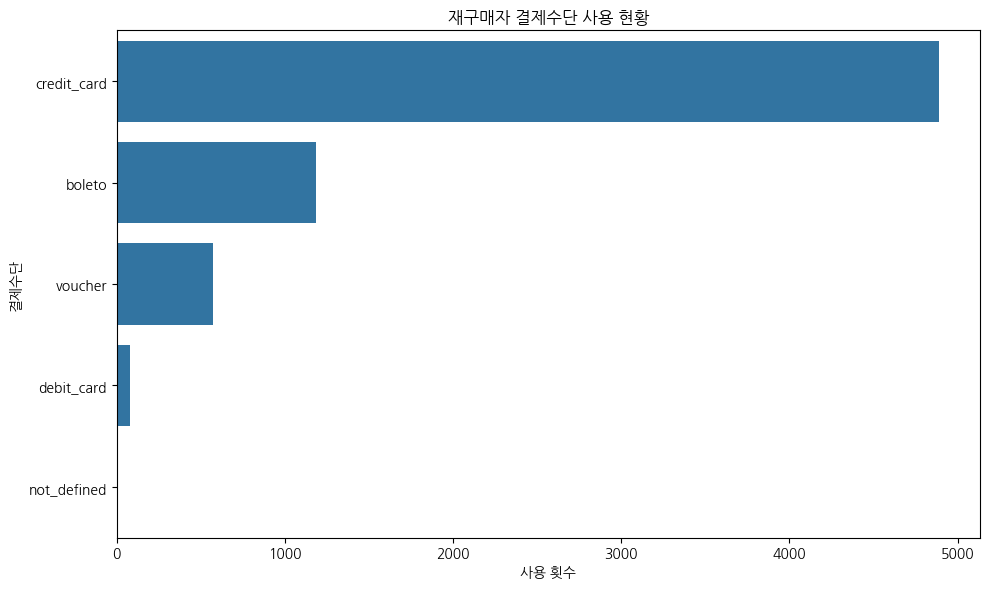

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7d3c6c8b2350>,
 [Text(-0.7201701187372509, 0.831477600466768, 'credit_card'),
  Text(0.4385177422442599, -1.0088122668450246, 'boleto'),
  Text(1.03661789863633, -0.3679990926983379, 'voucher'),
  Text(1.0992121233033134, -0.041625809097496656, 'debit_card'),
  Text(1.0999998799865385, -0.0005138381077398415, 'not_defined')],
 [Text(-0.3928200647657732, 0.453533236618237, '72.7%'),
  Text(0.23919149576959628, -0.5502612364609224, '17.6%'),
  Text(0.5654279447107253, -0.20072677783545703, '8.5%'),
  Text(0.5995702490745346, -0.02270498678045272, '1.2%'),
  Text(0.5999999345381118, -0.000280275331494459, '0.0%')])

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÎπÑÏú®')

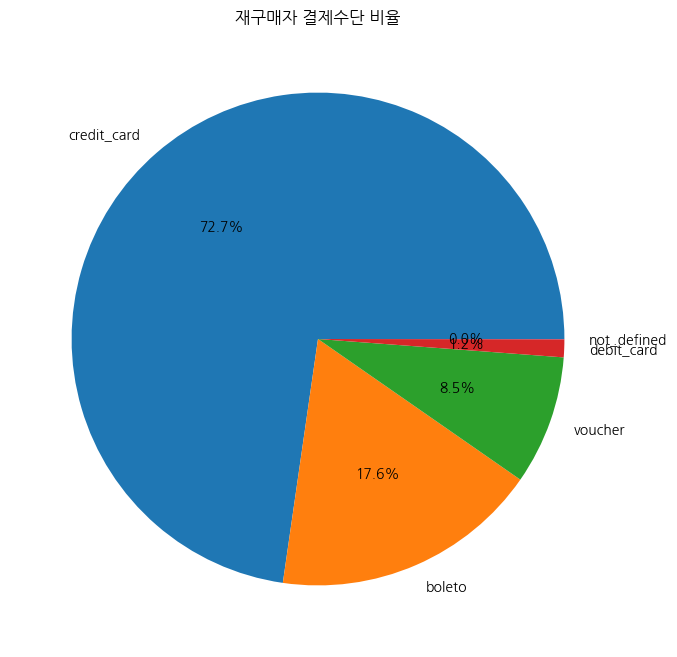

In [31]:
# Ïû¨Íµ¨Îß§Ïûê Ï£ºÎ¨∏Í≥º Í≤∞Ï†ú Ï†ïÎ≥¥ Ï°∞Ïù∏
repeat_customer_payments = pd.merge(
    repeat_customer_orders,
    order_payments,
    on='order_id',
    how='inner'
)

# Ïû¨Íµ¨Îß§ÏûêÎì§Ïùò Í≤∞Ï†úÏàòÎã®Î≥Ñ ÏÇ¨Ïö© ÌöüÏàò Í≥ÑÏÇ∞
payment_method_counts = repeat_customer_payments['payment_type'].value_counts()

print("Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÏÇ¨Ïö© ÌòÑÌô©:")
print(payment_method_counts)

# Í≤∞Ï†úÏàòÎã®Î≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
payment_method_ratio = repeat_customer_payments['payment_type'].value_counts(normalize=True) * 100

print("\nÏû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÎπÑÏú®:")
for method, ratio in payment_method_ratio.items():
    print(f"{method}: {ratio:.2f}%")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.values, y=payment_method_counts.index)
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÏÇ¨Ïö© ÌòÑÌô©')
plt.xlabel('ÏÇ¨Ïö© ÌöüÏàò')
plt.ylabel('Í≤∞Ï†úÏàòÎã®')
plt.tight_layout()
plt.show()

# ÌååÏù¥Ï∞®Ìä∏Î°úÎèÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts.values, labels=payment_method_counts.index, autopct='%1.1f%%')
plt.title('Ïû¨Íµ¨Îß§Ïûê Í≤∞Ï†úÏàòÎã® ÎπÑÏú®')
plt.show()

In [32]:
# Í≥†Í∞ùÍ≤ΩÌóò Îã®Í≥ÑÎ≥Ñ Î∂ÑÏÑùÍ≥ºÏ†ï 1. Ï£ºÎ¨∏Îã®Í≥Ñ (ÏÉÅÌíàÏÑ§Î™Ö Î¨¥Í¥Ä) (Ïö∞ÏßÑ)

customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# Ï¥ù 6342Í∞ú ÎÇòÏò§Îäî Îç∞Ïù¥ÌÑ∞


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342Í∞ú Ï§ë 92 Í∞ú unavailable 44Í∞ú ÎäòÏñ¥ÎÇòÏÑú Ï¥ù 136 Í∞ú




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
0802a1a217680f13264a70ddb7220823     2
634420a0ea42302205032ed44ac7fccc     2
bb99e6ae642f462d7bf05db05fc9aa11     2
e7688fef5438be571d0c39bbb3e8e998     2
e65862da4f9f183565831cf7e1cbb7a5     2
Name: count, Length: 2997, dtype: int64

5        879864dab9bc3047522c92c82e1212b8
8        5adf08e34b2e993982a47070956c5c65
13       eabebad39a88bb6f5b52376faec28612
32       2d5831cb2dff7cdefba62e950ae3dc7b
33       b2bed119388167a954382cca36c4777f
                       ...               
99324    5b46a0d983eec8c97363bea78d4a69dd
99327    c1affa46f9f3b514555259049a0307b9
99336    ebf46ff530343a129926adc1f831dea4
99353    282fbce48e4d2077aad602dd125c9225
99406    d9110683c7a282144e9fc97660026a28
Name: customer_id, Length: 6342, dtype: object

Repeat customers have canceled or unavailable orders. Here are the details:


order_id                       customer_id  \
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2296   f0df036e9be21fc238f131bbfcdde769  1fa16395beca89233661543954ca6cf1   
3094   5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
...                                 ...                               ...   
95932  a144aa25d9d14f25ee9f3ec4118e5517  9353974c6d727e3739a8370ff655a774   
96315  ae443cb420061bab1f2c5e3ad279fde8  3d59638a168c209ccb33a27424fc06da   
96996  5a14c8b3d919a4ef3f3428b0459c47b2  666094835d60d986eb87350b31efdcae   
97100  b34369ee8397436dd7ceb8bb7783671d  c96771504b0c9d89ad8da161e0e3d092   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp    order_approved_at  \
613       canceled      2018-01-26 21:34:08  2018-01-26 21:58:39   
1801      canceled      2018-09-20 13:54:16                  NaN   
2161      canceled      2017-05-01 16:12:39                  NaN   
2296   unavailable      2017-02-24 23:39:21  2017-02-24 23:45:14   
3094      canceled      2018-08-21 10:25:18                  NaN   
...            ...                      ...                  ...   
95932  unavailable      2017-11-06 17:36:36  2017-11-07 03:31:02   
96315  unavailable      2018-03-03 09:32:36  2018-03-03 09:48:36   
96996     canceled      2017-05-29 23:53:39                  NaN   
97100     canceled      2017-06-07 20:11:29                  NaN   
99347     canceled      2018-09-06 18:45:47                  NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
613            2018-01-29 22:33:25                           NaN   
1801                           NaN                           NaN   
2161                           NaN                           NaN   
2296                           NaN                           NaN   
3094                           NaN                           NaN   
...                            ...                           ...   
95932                          NaN                           NaN   
96315                          NaN                           NaN   
96996                          NaN                           NaN   
97100                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  year  
613             2018-02-22 00:00:00  2018  
1801            2018-10-17 00:00:00  2018  
2161            2017-05-30 00:00:00  2017  
2296            2017-04-07 00:00:00  2017  
3094            2018-09-06 00:00:00  2018  
...                             ...   ...  
95932           2017-11-24 00:00:00  2017  
96315           2018-03-28 00:00:00  2018  
96996           2017-06-23 00:00:00  2017  
97100           2017-07-04 00:00:00  2017  
99347           2018-09-27 00:00:00  2018  

[136 rows x 9 columns]

Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
15  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16  403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
44  ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
46  d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   

   order_status order_purchase_timestamp    order_approved_at  \
0     delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
15    delivered      2018-06-07 19:03:12  2018-06-12 23:31:02   
16    delivered      2018-01-02 19:00:43  2018-01-02 19:09:04   
44      shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
46    delivered      2017-05-14 20:28:25  2017-05-14 20:42:45   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
15          2018-06-11 14:54:00           2018-06-21 15:34:32   
16          2018-01-03 18:19:09           2018-01-20 01:38:59   
44          2018-06-05 14:32:00                           NaN   
46          2017-05-16 08:17:46           2017-05-25 09:14:31   

   order_estimated_delivery_date  year  
0            2017-10-18 00:00:00  2017  
15           2018-07-04 00:00:00  2018  
16           2018-02-06 00:00:00  2018  
44           2018-06-28 00:00:00  2018  
46           2017-06-12 00:00:00  2017

(6342, 9)


order_id                        product_id
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523

(7568, 2)


order_id                        product_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a   
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73   
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672   
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0   
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523   

   product_description_lenght  product_photos_qty  
0                       268.0                 4.0  
1                       991.0                 3.0  
2                       143.0                 2.0  
3                      1782.0                 1.0  
4                       521.0                 1.0

(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


<Figure size 1200x500 with 0 Axes>

<Axes: >

([<matplotlib.patches.Wedge at 0x7d3c68775c50>,
 [Text(-1.092040284201082, 0.13209094473892083, 'delivered'),
  Text(1.079115527660869, -0.21332997436179557, 'canceled'),
  Text(1.0930528748150103, -0.12343181461293243, 'shipped'),
  Text(1.0984261940119946, -0.05882088326711953, 'unavailable'),
  Text(1.0996890663893237, -0.02615257661833102, 'invoiced'),
  Text(1.099961000084241, -0.00926273683511382, 'processing'),
  Text(1.0999998648353124, -0.0005453093565330418, 'created')],
 [Text(-0.5956583368369537, 0.07204960622122954, '96.2%'),
  Text(0.5886084696332012, -0.11636180419734303, '1.5%'),
  Text(0.5962106589900056, -0.06732644433432677, '1.2%'),
  Text(0.5991415603701788, -0.032084118145701564, '0.7%'),
  Text(0.599830399848722, -0.014265041791816917, '0.3%'),
  Text(0.5999787273186769, -0.005052401910062084, '0.2%'),
  Text(0.5999999262738067, -0.00029744146719984095, '0.0%')])

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏ ÏÉÅÌÉú Î∂ÑÌè¨')

<Axes: >

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏')

Text(0, 0.5, 'Í±¥Ïàò')

Text(0.5, 0, 'Ï£ºÎ¨∏ ÏÉÅÌÉú')

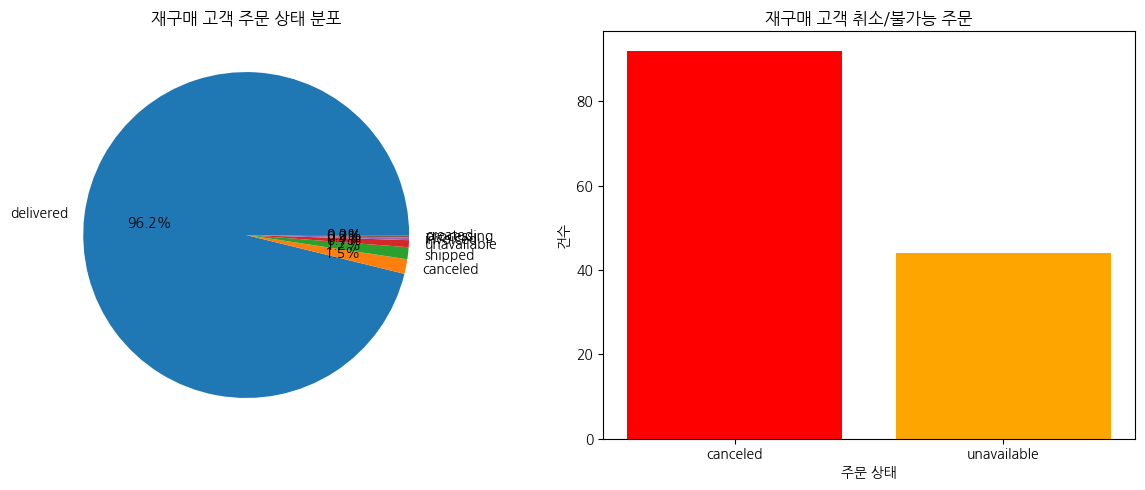

<Figure size 1500x500 with 0 Axes>

<Axes: >

(array([1.6489e+04, 6.2630e+03, 3.8600e+03, 2.4280e+03, 1.4840e+03,
        9.6800e+02, 3.4300e+02, 1.9200e+02, 1.0500e+02, 9.5000e+01,
        4.6000e+01, 3.5000e+01, 9.0000e+00, 5.0000e+00, 8.0000e+00,
        0.0000e+00, 7.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

(array([4.094e+03, 1.447e+03, 7.300e+02, 0.000e+00, 5.020e+02, 3.230e+02,
        0.000e+00, 2.230e+02, 8.600e+01, 0.000e+00, 2.700e+01, 1.500e+01,
        1.200e+01, 0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ,
         8.7,  9.4, 10.1, 10.8, 11.5, 12.2, 12.9, 13.6, 14.3, 15. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')

Text(0, 0.5, 'ÎπàÎèÑ')

Text(0.5, 1.0, 'Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ Î∂ÑÌè¨')

<Axes: >

(array([1273., 4304., 4690., 4191., 3744., 3121., 2427., 1561., 1302.,
        1047.,  886.,  647.,  534.,  392.,  379.,  416.,  265.,  166.,
         165.,  126.,   96.,   87.,   74.,   85.,   61.,   55.,   55.,
          45.,   68.,   79.]),
 array([   4.        ,  136.93333333,  269.86666667,  402.8       ,
         535.73333333,  668.66666667,  801.6       ,  934.53333333,
        1067.46666667, 1200.4       , 1333.33333333, 1466.26666667,
        1599.2       , 1732.13333333, 1865.06666667, 1998.        ,
        2130.93333333, 2263.86666667, 2396.8       , 2529.73333333,
        2662.66666667, 2795.6       , 2928.53333333, 3061.46666667,
        3194.4       , 3327.33333333, 3460.26666667, 3593.2       ,
        3726.13333333, 3859.06666667, 3992.        ]),
 <BarContainer object of 30 artists>)

(array([ 318., 1063., 1212., 1002.,  944.,  614.,  510.,  358.,  255.,
         242.,  136.,  152.,   90.,   76.,   99.,   50.,   57.,   28.,
          44.,   29.,   18.,   23.,   29.,   21.,    8.,    6.,   16.,
          17.,   22.,   30.]),
 array([   4.        ,  135.73333333,  267.46666667,  399.2       ,
         530.93333333,  662.66666667,  794.4       ,  926.13333333,
        1057.86666667, 1189.6       , 1321.33333333, 1453.06666667,
        1584.8       , 1716.53333333, 1848.26666667, 1980.        ,
        2111.73333333, 2243.46666667, 2375.2       , 2506.93333333,
        2638.66666667, 2770.4       , 2902.13333333, 3033.86666667,
        3165.6       , 3297.33333333, 3429.06666667, 3560.8       ,
        3692.53333333, 3824.26666667, 3956.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥')

Text(0, 0.5, 'ÎπàÎèÑ')

Text(0.5, 1.0, 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥ Î∂ÑÌè¨')

<Axes: >

/tmp/ipython-input-33-292495994.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Ï†ÑÏ≤¥ Ï†úÌíà', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7d3c6b402f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7d3c6b418790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d3c6b4004d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7d3c6b41ad10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d3c6b41cf10>,
 'means': []}

Text(0, 0.5, 'Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')

Text(0.5, 1.0, 'Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ Î∞ïÏä§ÌîåÎ°Ø')

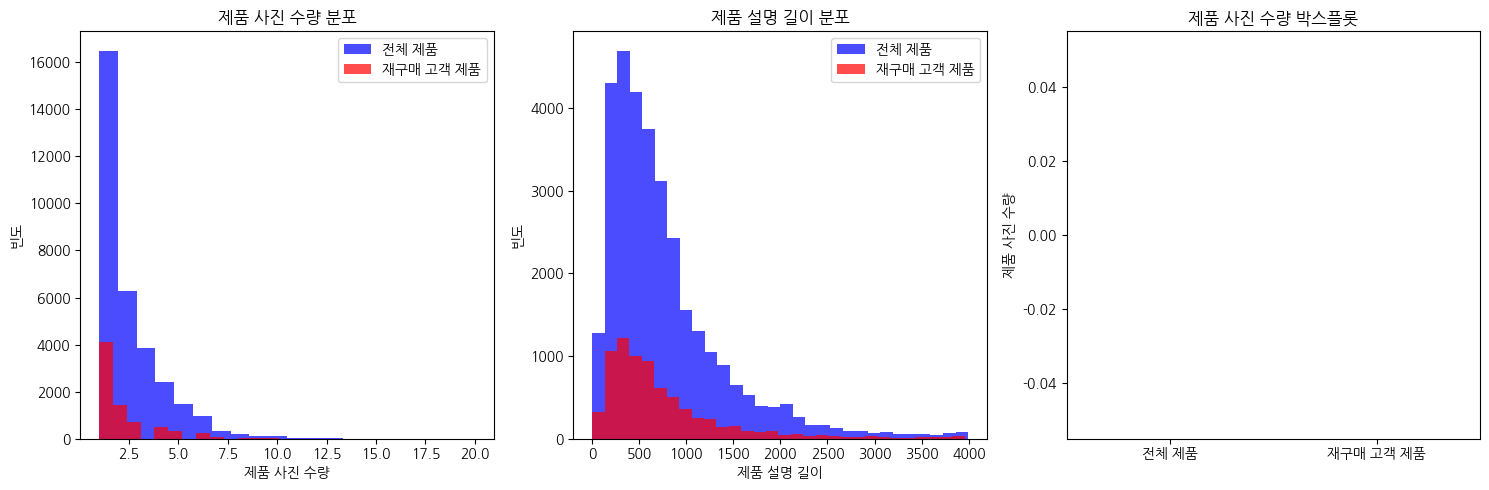

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Ï†ÑÏ≤¥ Ï†úÌíà vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌÜµÍ≥Ñ ÎπÑÍµê')

Text(0, 0.5, 'Í∞í')

Text(0.5, 0, 'ÌÜµÍ≥Ñ Ìï≠Î™©')

(array([0, 1]), [Text(0, 0, 'ÌèâÍ∑† ÏÇ¨ÏßÑ ÏàòÎüâ'), Text(1, 0, 'ÌèâÍ∑† ÏÑ§Î™Ö Í∏∏Ïù¥')])

<Figure size 1000x600 with 0 Axes>

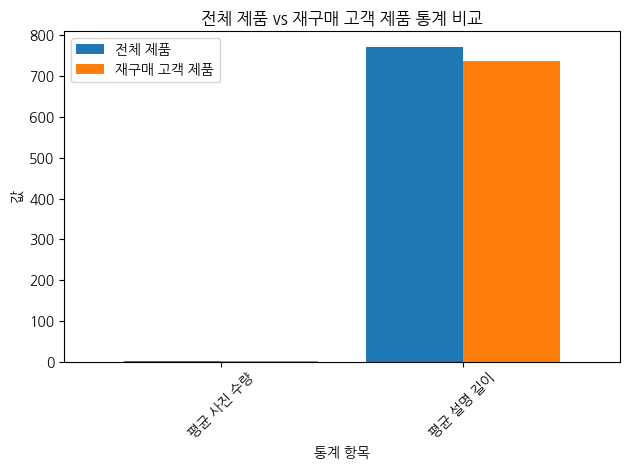


=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===
          Íµ¨Î∂Ñ     Í±¥Ïàò   ÎπÑÏú®(%)
0      Ï†ÑÏ≤¥ Í≥†Í∞ù  99441  100.00
1     Ïû¨Íµ¨Îß§ Í≥†Í∞ù   6342    6.38
2  Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏   6342    6.38
3  Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏    136    2.14


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='product_description_lenght', ylabel='product_photos_qty'>

Text(0.5, 1.0, 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà: ÏÑ§Î™Ö Í∏∏Ïù¥ vs ÏÇ¨ÏßÑ ÏàòÎüâ')

Text(0.5, 0, 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥')

Text(0, 0.5, 'Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')

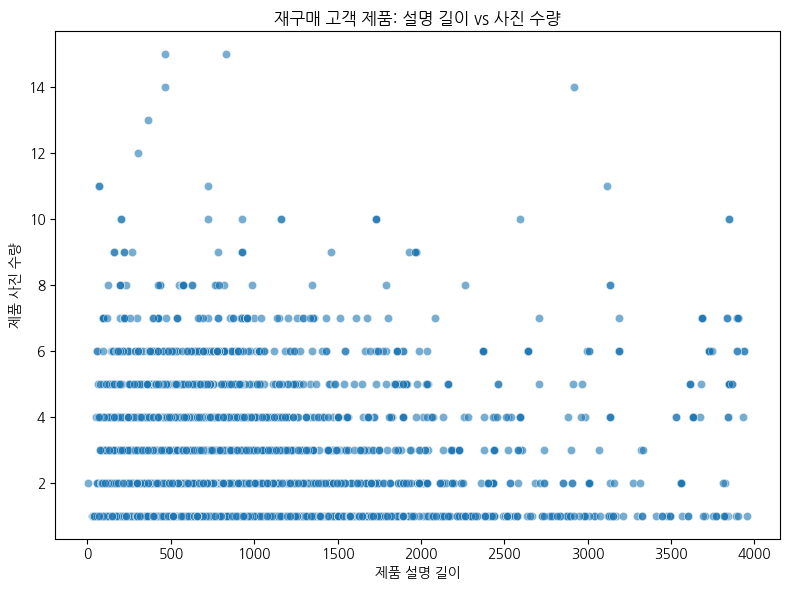


ÏÑ§Î™Ö Í∏∏Ïù¥ÏôÄ ÏÇ¨ÏßÑ ÏàòÎüâ ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.151


In [33]:
# 1. Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏ ÏÉÅÌÉú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# ÏÑúÎ∏åÌîåÎ°Ø 1: Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏ ÏÉÅÌÉú
plt.subplot(1, 2, 1)
order_status_counts = repeat_customer_orders['order_status'].value_counts()
plt.pie(order_status_counts.values, labels=order_status_counts.index, autopct='%1.1f%%')
plt.title('Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏ ÏÉÅÌÉú Î∂ÑÌè¨')

# ÏÑúÎ∏åÌîåÎ°Ø 2: Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏ ÏÉÅÏÑ∏
plt.subplot(1, 2, 2)
if not canceled_and_unavailable_repeat_orders.empty:
    canceled_status_counts = canceled_and_unavailable_repeat_orders['order_status'].value_counts()
    plt.bar(canceled_status_counts.index, canceled_status_counts.values, color=['red', 'orange'])
    plt.title('Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏')
    plt.ylabel('Í±¥Ïàò')
    plt.xlabel('Ï£ºÎ¨∏ ÏÉÅÌÉú')

plt.tight_layout()
plt.show()

# 2. Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù)
plt.figure(figsize=(15, 5))

# ÏÑúÎ∏åÌîåÎ°Ø 1: Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ Î∂ÑÌè¨
plt.subplot(1, 3, 1)
plt.hist(products_dataset['product_photos_qty'], bins=20, alpha=0.7, label='Ï†ÑÏ≤¥ Ï†úÌíà', color='blue')
plt.hist(repeat_customer_product_details['product_photos_qty'], bins=20, alpha=0.7, label='Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà', color='red')
plt.xlabel('Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')
plt.ylabel('ÎπàÎèÑ')
plt.title('Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ Î∂ÑÌè¨')
plt.legend()

# ÏÑúÎ∏åÌîåÎ°Ø 2: Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥ Î∂ÑÌè¨
plt.subplot(1, 3, 2)
plt.hist(products_dataset['product_description_lenght'], bins=30, alpha=0.7, label='Ï†ÑÏ≤¥ Ï†úÌíà', color='blue')
plt.hist(repeat_customer_product_details['product_description_lenght'], bins=30, alpha=0.7, label='Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà', color='red')
plt.xlabel('Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥')
plt.ylabel('ÎπàÎèÑ')
plt.title('Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥ Î∂ÑÌè¨')
plt.legend()

# ÏÑúÎ∏åÌîåÎ°Ø 3: Î∞ïÏä§ÌîåÎ°Ø ÎπÑÍµê
plt.subplot(1, 3, 3)
data_to_plot = [
    products_dataset['product_photos_qty'],
    repeat_customer_product_details['product_photos_qty']
]
plt.boxplot(data_to_plot, labels=['Ï†ÑÏ≤¥ Ï†úÌíà', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà'])
plt.ylabel('Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')
plt.title('Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ Î∞ïÏä§ÌîåÎ°Ø')

plt.tight_layout()
plt.show()

# 3. ÌÜµÍ≥Ñ ÎπÑÍµê ÏãúÍ∞ÅÌôî
stats_comparison = pd.DataFrame({
    'Ï†ÑÏ≤¥ Ï†úÌíà': [mean_photos, mean_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà': [mean_photos_repeat, mean_description_length_repeat]
}, index=['ÌèâÍ∑† ÏÇ¨ÏßÑ ÏàòÎüâ', 'ÌèâÍ∑† ÏÑ§Î™Ö Í∏∏Ïù¥'])

plt.figure(figsize=(10, 6))
stats_comparison.plot(kind='bar', width=0.8)
plt.title('Ï†ÑÏ≤¥ Ï†úÌíà vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌÜµÍ≥Ñ ÎπÑÍµê')
plt.ylabel('Í∞í')
plt.xlabel('ÌÜµÍ≥Ñ Ìï≠Î™©')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ÌÖåÏù¥Î∏î
print("\n=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===")
summary_table = pd.DataFrame({
    'Íµ¨Î∂Ñ': ['Ï†ÑÏ≤¥ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏', 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏'],
    'Í±¥Ïàò': [
        len(customers),
        len(repeat_customer_ids),
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ],
    'ÎπÑÏú®(%)': [
        100.0,
        (len(repeat_customer_ids) / len(customers)) * 100,
        (len(repeat_customer_orders) / len(orders_dataset)) * 100,
        (len(canceled_and_unavailable_repeat_orders) / len(repeat_customer_orders)) * 100 if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})

print(summary_table.round(2))

# 5. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
plt.figure(figsize=(8, 6))
correlation_data = repeat_customer_product_details[['product_description_lenght', 'product_photos_qty']]
sns.scatterplot(data=correlation_data, x='product_description_lenght', y='product_photos_qty', alpha=0.6)
plt.title('Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà: ÏÑ§Î™Ö Í∏∏Ïù¥ vs ÏÇ¨ÏßÑ ÏàòÎüâ')
plt.xlabel('Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥')
plt.ylabel('Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ')
plt.tight_layout()
plt.show()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = correlation_data.corr()
print(f"\nÏÑ§Î™Ö Í∏∏Ïù¥ÏôÄ ÏÇ¨ÏßÑ ÏàòÎüâ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation.iloc[0,1]:.3f}")

In [34]:
# 1. Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩÌëú
print("=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===")
summary_df = pd.DataFrame({
    'Íµ¨Î∂Ñ': ['Ï†ÑÏ≤¥ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏', 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏'],
    'Í±¥Ïàò': [
        len(customers),
        len(repeat_customer_ids),
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})
summary_df['ÎπÑÏú®(%)'] = (summary_df['Í±¥Ïàò'] / summary_df['Í±¥Ïàò'].iloc[0] * 100).round(2)
print(summary_df.to_string(index=False))

# 2. Ï†úÌíà ÌäπÏÑ± ÎπÑÍµêÌëú
print("\n=== Ï†úÌíà ÌäπÏÑ± ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù) ===")
comparison_df = pd.DataFrame({
    'Ìï≠Î™©': ['Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ', 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥'],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌèâÍ∑†': [mean_photos, mean_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌèâÍ∑†': [mean_photos_repeat, mean_description_length_repeat],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos, std_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos_repeat, std_description_length_repeat]
})
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

# Î∞©Î≤ï 1: pandasÏùò style ÏÇ¨Ïö©
print("=== Ï†úÌíà ÌäπÏÑ± ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù) ===")
comparison_df = pd.DataFrame({
    'Ìï≠Î™©': ['Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ', 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥'],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌèâÍ∑†': [mean_photos, mean_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌèâÍ∑†': [mean_photos_repeat, mean_description_length_repeat],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos, std_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos_repeat, std_description_length_repeat]
})
comparison_df = comparison_df.round(2)

# Ìëú Ïä§ÌÉÄÏùº Ï†ÅÏö©
styled_table = comparison_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody td:first-child', 'props': [('text-align', 'left'), ('font-weight', 'bold')]}
])
display(styled_table)



=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===
       Íµ¨Î∂Ñ    Í±¥Ïàò  ÎπÑÏú®(%)
    Ï†ÑÏ≤¥ Í≥†Í∞ù 99441 100.00
   Ïû¨Íµ¨Îß§ Í≥†Í∞ù  6342   6.38
Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏  6342   6.38
Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏   136   0.14

=== Ï†úÌíà ÌäπÏÑ± ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù) ===
      Ìï≠Î™©  Ï†ÑÏ≤¥ Ï†úÌíà ÌèâÍ∑†  Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌèâÍ∑†  Ï†ÑÏ≤¥ Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®  Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®
Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ      2.19          2.05        1.74            1.60
Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥    771.50        736.24      635.12          642.46
=== Ï†úÌíà ÌäπÏÑ± ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù) ===


In [37]:

# 1. Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩÌëú
print("=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===")
summary_df = pd.DataFrame({
    'Íµ¨Î∂Ñ': ['Ï†ÑÏ≤¥ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù', '1Ìöå Íµ¨Îß§ Í≥†Í∞ù', 'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏', 'Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏'],
    'Í±¥Ïàò': [
        len(customers),
        len(repeat_customer_ids),
        len(customers) - len(repeat_customer_ids),  # 1Ìöå Íµ¨Îß§Ïûê Ïàò
        len(repeat_customer_orders),
        len(canceled_and_unavailable_repeat_orders) if not canceled_and_unavailable_repeat_orders.empty else 0
    ]
})
summary_df['ÎπÑÏú®(%)'] = (summary_df['Í±¥Ïàò'] / summary_df['Í±¥Ïàò'].iloc[0] * 100).round(2)
print(summary_df.to_string(index=False))

# 1Ìöå Íµ¨Îß§Ïûê Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
one_time_customer_ids = customers[~customers['customer_id'].isin(repeat_customer_ids)]
one_time_customer_orders = orders[orders['customer_id'].isin(one_time_customer_ids['customer_id'])]

# 1Ìöå Íµ¨Îß§Ïûê ÏÉÅÌíà Ï†ïÎ≥¥
one_time_products = one_time_customer_orders.merge(products, on='product_id', how='left')

# 1Ìöå Íµ¨Îß§Ïûê ÏÉÅÌíàÏùò ÏÇ¨ÏßÑ ÏàòÏôÄ ÏÑ§Î™Ö Í∏∏Ïù¥ Í≥ÑÏÇ∞
mean_photos_one_time = one_time_products['product_photos'].mean()
mean_description_length_one_time = one_time_products['product_description_length'].mean()
std_photos_one_time = one_time_products['product_photos'].std()
std_description_length_one_time = one_time_products['product_description_length'].std()

# 2. Ï†úÌíà ÌäπÏÑ± ÎπÑÍµêÌëú (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù vs 1Ìöå Íµ¨Îß§Ïûê)
print("\n=== Ï†úÌíà ÌäπÏÑ± ÎπÑÍµê (Ï†ÑÏ≤¥ vs Ïû¨Íµ¨Îß§ Í≥†Í∞ù vs 1Ìöå Íµ¨Îß§Ïûê) ===")
comparison_df = pd.DataFrame({
    'Ìï≠Î™©': ['Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ', 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥'],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌèâÍ∑†': [mean_photos, mean_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌèâÍ∑†': [mean_photos_repeat, mean_description_length_repeat],
    '1Ìöå Íµ¨Îß§Ïûê Ï†úÌíà ÌèâÍ∑†': [mean_photos_one_time, mean_description_length_one_time],
    'Ï†ÑÏ≤¥ Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos, std_description_length],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos_repeat, std_description_length_repeat],
    '1Ìöå Íµ¨Îß§Ïûê Ï†úÌíà ÌëúÏ§ÄÌé∏Ï∞®': [std_photos_one_time, std_description_length_one_time]
})
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

# 3. Ïä§ÌÉÄÏùºÏù¥ Ï†ÅÏö©Îêú Ìëú Ï∂úÎ†• (Jupyter ÌôòÍ≤ΩÏóêÏÑú)
print("\n=== Ïä§ÌÉÄÏùºÏù¥ Ï†ÅÏö©Îêú Ï†úÌíà ÌäπÏÑ± ÎπÑÍµêÌëú ===")
styled_table = comparison_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f0f0f0'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tbody td:first-child', 'props': [('text-align', 'left'), ('font-weight', 'bold')]}
])
display(styled_table)

# 4. Ï∂îÍ∞Ä Î∂ÑÏÑù: Ïû¨Íµ¨Îß§ Í≥†Í∞ù vs 1Ìöå Íµ¨Îß§Ïûê ÏÉÅÌíà ÌäπÏÑ± Ï∞®Ïù¥
print("\n=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù vs 1Ìöå Íµ¨Îß§Ïûê ÏÉÅÌíà ÌäπÏÑ± Ï∞®Ïù¥ ===")
diff_df = pd.DataFrame({
    'Ìï≠Î™©': ['Ï†úÌíà ÏÇ¨ÏßÑ ÏàòÎüâ', 'Ï†úÌíà ÏÑ§Î™Ö Í∏∏Ïù¥'],
    'Ïû¨Íµ¨Îß§ Í≥†Í∞ù ÌèâÍ∑†': [mean_photos_repeat, mean_description_length_repeat],
    '1Ìöå Íµ¨Îß§Ïûê ÌèâÍ∑†': [mean_photos_one_time, mean_description_length_one_time],
    'Ï∞®Ïù¥ (Ïû¨Íµ¨Îß§-1Ìöå)': [
        mean_photos_repeat - mean_photos_one_time,
        mean_description_length_repeat - mean_description_length_one_time
    ],
    'Ï∞®Ïù¥ ÎπÑÏú®(%)': [
        ((mean_photos_repeat - mean_photos_one_time) / mean_photos_one_time * 100) if mean_photos_one_time != 0 else 0,
        ((mean_description_length_repeat - mean_description_length_one_time) / mean_description_length_one_time * 100) if mean_description_length_one_time != 0 else 0
    ]
})
diff_df = diff_df.round(2)
print(diff_df.to_string(index=False))

=== Ïû¨Íµ¨Îß§ Í≥†Í∞ù Î∂ÑÏÑù ÏöîÏïΩ ===
       Íµ¨Î∂Ñ    Í±¥Ïàò  ÎπÑÏú®(%)
    Ï†ÑÏ≤¥ Í≥†Í∞ù 99441 100.00
   Ïû¨Íµ¨Îß§ Í≥†Í∞ù  6342   6.38
 1Ìöå Íµ¨Îß§ Í≥†Í∞ù 93099  93.62
Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ï£ºÎ¨∏  6342   6.38
Ï∑®ÏÜå/Î∂àÍ∞ÄÎä• Ï£ºÎ¨∏   136   0.14


NameError: name 'orders' is not defined

In [48]:
orders_with_customers = pd.merge(orders_dataset, customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')

# Convert the 'order_purchase_timestamp' column to datetime objects
orders_with_customers['order_purchase_timestamp'] = pd.to_datetime(orders_with_customers['order_purchase_timestamp'])
orders_with_customers['order_purchase_year'] = orders_with_customers['order_purchase_timestamp'].dt.year
orders_with_customers['order_purchase_month'] = orders_with_customers['order_purchase_timestamp'].dt.month

# Calculate the monthly purchase count ...
grouped_columns = ['order_purchase_year', 'customer_unique_id']
monthly_purchase_counts = orders_with_customers.groupby(grouped_columns).size().reset_index(name='monthly_purchase_count')

# Identify customers with a monthly purchase count of 2 or more
repurchasing_customers_monthly = set(monthly_purchase_counts[monthly_purchase_counts['monthly_purchase_count'] >= 2]['customer_unique_id'].unique())
print("Repurchasing customer IDs (monthly, first few):")

# Calculate the yearly repurchase rate
total_unique_customers_per_year = orders_with_customers.groupby('order_purchase_year')['customer_unique_id'].nunique()

repurchasing_customers_per_year = orders_with_customers[orders_with_customers['customer_unique_id'].isin(repurchasing_customers_monthly)].groupby('order_purchase_year')['customer_unique_id'].nunique()

repurchase_rate_per_year = (repurchasing_customers_per_year / total_unique_customers_per_year) * 100

# Calculate the number of repurchasing customers for each year based on the calculated rate
# repurchase_rate_per_yearÎäî Ïù¥ÎØ∏ %Î°ú Í≥ÑÏÇ∞ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# total_unique_customers_per_year Series ÏÇ¨Ïö©

repurchasing_customers_per_year_calculated = (repurchase_rate_per_year / 100) * total_unique_customers_per_year

# Assuming a 1 percentage point increase in repurchase rate for each year
repurchase_rate_increase = 1

# Calculate the estimated new repurchase rate
estimated_new_repurchase_rate = repurchase_rate_per_year + repurchase_rate_increase

# Calculate the estimated number of new repurchasing customers based on the increased rate
estimated_new_repurchasing_customers = (estimated_new_repurchase_rate / 100) * total_unique_customers_per_year

# Calculate the number of *additional* repurchasing customers
additional_repurchasing_customers = estimated_new_repurchasing_customers - repurchasing_customers_per_year_calculated

# Estimate the number of orders from these additional repurchasing customers
# Assuming each additional repurchasing customer makes at least 2 orders in the year (based on the definition)
# For a simplified estimation, we'll assume they make an average of 2 orders.
estimated_additional_orders = additional_repurchasing_customers * 2

# Calculate the total number of orders in the dataset
total_orders = len(orders_with_customers)

# Calculate the estimated percentage increase in total orders
# This is an approximation of the revenue increase assuming constant AOV
estimated_revenue_increase_percentage = (estimated_additional_orders.sum() / total_orders) * 100

print(f"Ïû¨Íµ¨Îß§Ïú®Ïù¥ Í∞Å Ïó∞ÎèÑÎ≥ÑÎ°ú 1%p ÏÉÅÏäπÌñàÏùÑ Îïå,")
display("ÏòàÏÉÅÎêòÎäî Ï∂îÍ∞Ä Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ïàò:", additional_repurchasing_customers)
display("ÏòàÏÉÅÎêòÎäî Ï∂îÍ∞Ä Ï£ºÎ¨∏ Ïàò:", estimated_additional_orders)
print(f"\nÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°Ïù¥ ÎèôÏùºÌïòÎã§Í≥† Í∞ÄÏ†ïÌï† Îïå, Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Ïàò ÎåÄÎπÑ ÏòàÏÉÅÎêòÎäî ÏàòÏùµ Ï¶ùÍ∞ÄÏú®ÏùÄ ÏïΩ {estimated_revenue_increase_percentage:.2f}% ÏûÖÎãàÎã§.")

Repurchasing customer IDs (monthly, first few):
Ïû¨Íµ¨Îß§Ïú®Ïù¥ Í∞Å Ïó∞ÎèÑÎ≥ÑÎ°ú 1%p ÏÉÅÏäπÌñàÏùÑ Îïå,


'ÏòàÏÉÅÎêòÎäî Ï∂îÍ∞Ä Ïû¨Íµ¨Îß§ Í≥†Í∞ù Ïàò:'

order_purchase_year
2016      3.26
2017    437.13
2018    527.49
Name: customer_unique_id, dtype: float64

'ÏòàÏÉÅÎêòÎäî Ï∂îÍ∞Ä Ï£ºÎ¨∏ Ïàò:'

order_purchase_year
2016       6.52
2017     874.26
2018    1054.98
Name: customer_unique_id, dtype: float64


ÌèâÍ∑† Ï£ºÎ¨∏ Í∏àÏï°Ïù¥ ÎèôÏùºÌïòÎã§Í≥† Í∞ÄÏ†ïÌï† Îïå, Ï†ÑÏ≤¥ Ï£ºÎ¨∏ Ïàò ÎåÄÎπÑ ÏòàÏÉÅÎêòÎäî ÏàòÏùµ Ï¶ùÍ∞ÄÏú®ÏùÄ ÏïΩ 1.95% ÏûÖÎãàÎã§.


In [77]:
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# Ï¥ù 6342Í∞ú ÎÇòÏò§Îäî Îç∞Ïù¥ÌÑ∞


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342Í∞ú Ï§ë 92 Í∞ú unavailable 44Í∞ú ÎäòÏñ¥ÎÇòÏÑú Ï¥ù 136 Í∞ú




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
0802a1a217680f13264a70ddb7220823     2
634420a0ea42302205032ed44ac7fccc     2
bb99e6ae642f462d7bf05db05fc9aa11     2
e7688fef5438be571d0c39bbb3e8e998     2
e65862da4f9f183565831cf7e1cbb7a5     2
Name: count, Length: 2997, dtype: int64

5        879864dab9bc3047522c92c82e1212b8
8        5adf08e34b2e993982a47070956c5c65
13       eabebad39a88bb6f5b52376faec28612
32       2d5831cb2dff7cdefba62e950ae3dc7b
33       b2bed119388167a954382cca36c4777f
                       ...               
99324    5b46a0d983eec8c97363bea78d4a69dd
99327    c1affa46f9f3b514555259049a0307b9
99336    ebf46ff530343a129926adc1f831dea4
99353    282fbce48e4d2077aad602dd125c9225
99406    d9110683c7a282144e9fc97660026a28
Name: customer_id, Length: 6342, dtype: object

Repeat customers have canceled or unavailable orders. Here are the details:


order_id                       customer_id  \
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2296   f0df036e9be21fc238f131bbfcdde769  1fa16395beca89233661543954ca6cf1   
3094   5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
...                                 ...                               ...   
95932  a144aa25d9d14f25ee9f3ec4118e5517  9353974c6d727e3739a8370ff655a774   
96315  ae443cb420061bab1f2c5e3ad279fde8  3d59638a168c209ccb33a27424fc06da   
96996  5a14c8b3d919a4ef3f3428b0459c47b2  666094835d60d986eb87350b31efdcae   
97100  b34369ee8397436dd7ceb8bb7783671d  c96771504b0c9d89ad8da161e0e3d092   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp    order_approved_at  \
613       canceled      2018-01-26 21:34:08  2018-01-26 21:58:39   
1801      canceled      2018-09-20 13:54:16                  NaN   
2161      canceled      2017-05-01 16:12:39                  NaN   
2296   unavailable      2017-02-24 23:39:21  2017-02-24 23:45:14   
3094      canceled      2018-08-21 10:25:18                  NaN   
...            ...                      ...                  ...   
95932  unavailable      2017-11-06 17:36:36  2017-11-07 03:31:02   
96315  unavailable      2018-03-03 09:32:36  2018-03-03 09:48:36   
96996     canceled      2017-05-29 23:53:39                  NaN   
97100     canceled      2017-06-07 20:11:29                  NaN   
99347     canceled      2018-09-06 18:45:47                  NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
613            2018-01-29 22:33:25                           NaN   
1801                           NaN                           NaN   
2161                           NaN                           NaN   
2296                           NaN                           NaN   
3094                           NaN                           NaN   
...                            ...                           ...   
95932                          NaN                           NaN   
96315                          NaN                           NaN   
96996                          NaN                           NaN   
97100                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  year  
613             2018-02-22 00:00:00  2018  
1801            2018-10-17 00:00:00  2018  
2161            2017-05-30 00:00:00  2017  
2296            2017-04-07 00:00:00  2017  
3094            2018-09-06 00:00:00  2018  
...                             ...   ...  
95932           2017-11-24 00:00:00  2017  
96315           2018-03-28 00:00:00  2018  
96996           2017-06-23 00:00:00  2017  
97100           2017-07-04 00:00:00  2017  
99347           2018-09-27 00:00:00  2018  

[136 rows x 9 columns]

Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
15  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16  403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
44  ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
46  d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   

   order_status order_purchase_timestamp    order_approved_at  \
0     delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
15    delivered      2018-06-07 19:03:12  2018-06-12 23:31:02   
16    delivered      2018-01-02 19:00:43  2018-01-02 19:09:04   
44      shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
46    delivered      2017-05-14 20:28:25  2017-05-14 20:42:45   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
15          2018-06-11 14:54:00           2018-06-21 15:34:32   
16          2018-01-03 18:19:09           2018-01-20 01:38:59   
44          2018-06-05 14:32:00                           NaN   
46          2017-05-16 08:17:46           2017-05-25 09:14:31   

   order_estimated_delivery_date  year  
0            2017-10-18 00:00:00  2017  
15           2018-07-04 00:00:00  2018  
16           2018-02-06 00:00:00  2018  
44           2018-06-28 00:00:00  2018  
46           2017-06-12 00:00:00  2017

(6342, 9)


order_id                        product_id
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523

(7568, 2)


order_id                        product_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a   
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73   
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672   
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0   
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523   

   product_description_lenght  product_photos_qty  
0                       268.0                 4.0  
1                       991.0                 3.0  
2                       143.0                 2.0  
3                      1782.0                 1.0  
4                       521.0                 1.0

(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


In [74]:
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customers = customer_counts[customer_counts >= 2]
display(repeat_customers)



repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customers.index)]['customer_id']
display(repeat_customer_ids)
# Ï¥ù 6342Í∞ú ÎÇòÏò§Îäî Îç∞Ïù¥ÌÑ∞


# Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Check if any of these orders have a 'canceled' or 'unavailable' status
canceled_and_unavailable_repeat_orders = repeat_customer_orders[repeat_customer_orders['order_status'].isin(['canceled', 'unavailable'])]

# Display the canceled and unavailable orders from repeat customers
if not canceled_and_unavailable_repeat_orders.empty:
    print("Repeat customers have canceled or unavailable orders. Here are the details:")
    display(canceled_and_unavailable_repeat_orders)
else:
    print("No canceled or unavailable orders found for repeat customers.")
#6342Í∞ú Ï§ë 92 Í∞ú unavailable 44Í∞ú ÎäòÏñ¥ÎÇòÏÑú Ï¥ù 136 Í∞ú




# Calculate the mean, sum, and standard deviation of product_photos_qty
mean_photos = products_dataset['product_photos_qty'].mean()
sum_photos = products_dataset['product_photos_qty'].sum()
std_photos = products_dataset['product_photos_qty'].std()

# Calculate the mean, sum, and standard deviation of product_description_lenght
mean_description_length = products_dataset['product_description_lenght'].mean()
sum_description_length = products_dataset['product_description_lenght'].sum()
std_description_length = products_dataset['product_description_lenght'].std()


# Display the results
print(f"Average Product Photos Quantity: {mean_photos}")
print(f"Total Product Photos Quantity: {sum_photos}")
print(f"Standard Deviation of Product Photos Quantity: {std_photos}")
print(f"Average Product Description Length: {mean_description_length}")
print(f"Total Product Description Length: {sum_description_length}")
print(f"Standard Deviation of Product Description Length: {std_description_length}")



# Step 1: Identify repeat customers
customer_counts = customers['customer_unique_id'].value_counts()
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Filter orders_dataset for orders from repeat customers
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: Display the first few rows and the shape of repeat_customer_orders
display(repeat_customer_orders.head())
print(repeat_customer_orders.shape)

repeat_customer_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_customer_products = repeat_customer_products[['order_id', 'product_id']]
display(repeat_customer_products.head())
print(repeat_customer_products.shape)

repeat_customer_product_details = pd.merge(repeat_customer_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')
display(repeat_customer_product_details.head())
print(repeat_customer_product_details.shape)

# Calculate statistics for product_description_lenght
mean_description_length_repeat = repeat_customer_product_details['product_description_lenght'].mean()
sum_description_length_repeat = repeat_customer_product_details['product_description_lenght'].sum()
std_description_length_repeat = repeat_customer_product_details['product_description_lenght'].std()

# Calculate statistics for product_photos_qty
mean_photos_repeat = repeat_customer_product_details['product_photos_qty'].mean()
sum_photos_repeat = repeat_customer_product_details['product_photos_qty'].sum()
std_photos_repeat = repeat_customer_product_details['product_photos_qty'].std()

# Display the results
print(f"Statistics for products purchased by repeat customers:")
print(f"  Product Description Length:")
print(f"    Mean: {mean_description_length_repeat}")
print(f"    Sum: {sum_description_length_repeat}")
print(f"    Standard Deviation: {std_description_length_repeat}")
print(f"  Product Photos Quantity:")
print(f"    Mean: {mean_photos_repeat}")
print(f"    Sum: {sum_photos_repeat}")
print(f"    Standard Deviation: {std_photos_repeat}")

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
0802a1a217680f13264a70ddb7220823     2
634420a0ea42302205032ed44ac7fccc     2
bb99e6ae642f462d7bf05db05fc9aa11     2
e7688fef5438be571d0c39bbb3e8e998     2
e65862da4f9f183565831cf7e1cbb7a5     2
Name: count, Length: 2997, dtype: int64

5        879864dab9bc3047522c92c82e1212b8
8        5adf08e34b2e993982a47070956c5c65
13       eabebad39a88bb6f5b52376faec28612
32       2d5831cb2dff7cdefba62e950ae3dc7b
33       b2bed119388167a954382cca36c4777f
                       ...               
99324    5b46a0d983eec8c97363bea78d4a69dd
99327    c1affa46f9f3b514555259049a0307b9
99336    ebf46ff530343a129926adc1f831dea4
99353    282fbce48e4d2077aad602dd125c9225
99406    d9110683c7a282144e9fc97660026a28
Name: customer_id, Length: 6342, dtype: object

Repeat customers have canceled or unavailable orders. Here are the details:


order_id                       customer_id  \
613    714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
2296   f0df036e9be21fc238f131bbfcdde769  1fa16395beca89233661543954ca6cf1   
3094   5290c34bd38a8a095b885f13958db1e1  92af427e290117f39d9ff908566072e0   
...                                 ...                               ...   
95932  a144aa25d9d14f25ee9f3ec4118e5517  9353974c6d727e3739a8370ff655a774   
96315  ae443cb420061bab1f2c5e3ad279fde8  3d59638a168c209ccb33a27424fc06da   
96996  5a14c8b3d919a4ef3f3428b0459c47b2  666094835d60d986eb87350b31efdcae   
97100  b34369ee8397436dd7ceb8bb7783671d  c96771504b0c9d89ad8da161e0e3d092   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp    order_approved_at  \
613       canceled      2018-01-26 21:34:08  2018-01-26 21:58:39   
1801      canceled      2018-09-20 13:54:16                  NaN   
2161      canceled      2017-05-01 16:12:39                  NaN   
2296   unavailable      2017-02-24 23:39:21  2017-02-24 23:45:14   
3094      canceled      2018-08-21 10:25:18                  NaN   
...            ...                      ...                  ...   
95932  unavailable      2017-11-06 17:36:36  2017-11-07 03:31:02   
96315  unavailable      2018-03-03 09:32:36  2018-03-03 09:48:36   
96996     canceled      2017-05-29 23:53:39                  NaN   
97100     canceled      2017-06-07 20:11:29                  NaN   
99347     canceled      2018-09-06 18:45:47                  NaN   

      order_delivered_carrier_date order_delivered_customer_date  \
613            2018-01-29 22:33:25                           NaN   
1801                           NaN                           NaN   
2161                           NaN                           NaN   
2296                           NaN                           NaN   
3094                           NaN                           NaN   
...                            ...                           ...   
95932                          NaN                           NaN   
96315                          NaN                           NaN   
96996                          NaN                           NaN   
97100                          NaN                           NaN   
99347                          NaN                           NaN   

      order_estimated_delivery_date  year  
613             2018-02-22 00:00:00  2018  
1801            2018-10-17 00:00:00  2018  
2161            2017-05-30 00:00:00  2017  
2296            2017-04-07 00:00:00  2017  
3094            2018-09-06 00:00:00  2018  
...                             ...   ...  
95932           2017-11-24 00:00:00  2017  
96315           2018-03-28 00:00:00  2018  
96996           2017-06-23 00:00:00  2017  
97100           2017-07-04 00:00:00  2017  
99347           2018-09-27 00:00:00  2018  

[136 rows x 9 columns]

Average Product Photos Quantity: 2.1889861166939797
Total Product Photos Quantity: 70794.0
Standard Deviation of Product Photos Quantity: 1.7367656379315015
Average Product Description Length: 771.4952846232337
Total Product Description Length: 24950929.0
Standard Deviation of Product Description Length: 635.1152246349546


order_id                       customer_id  \
0   e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
15  dcb36b511fcac050b97cd5c05de84dc3  3b6828a50ffe546942b7a473d70ac0fc   
16  403b97836b0c04a622354cf531062e5f  738b086814c6fcc74b8cc583f8516ee3   
44  ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
46  d17dc4a904426827ca80f2ccb3a6be56  569cf68214806a39acc0f39344aea67f   

   order_status order_purchase_timestamp    order_approved_at  \
0     delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
15    delivered      2018-06-07 19:03:12  2018-06-12 23:31:02   
16    delivered      2018-01-02 19:00:43  2018-01-02 19:09:04   
44      shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
46    delivered      2017-05-14 20:28:25  2017-05-14 20:42:45   

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
15          2018-06-11 14:54:00           2018-06-21 15:34:32   
16          2018-01-03 18:19:09           2018-01-20 01:38:59   
44          2018-06-05 14:32:00                           NaN   
46          2017-05-16 08:17:46           2017-05-25 09:14:31   

   order_estimated_delivery_date  year  
0            2017-10-18 00:00:00  2017  
15           2018-07-04 00:00:00  2018  
16           2018-02-06 00:00:00  2018  
44           2018-06-28 00:00:00  2018  
46           2017-06-12 00:00:00  2017

(6342, 9)


order_id                        product_id
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523

(7568, 2)


order_id                        product_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  87285b34884572647811a353c7ac498a   
1  dcb36b511fcac050b97cd5c05de84dc3  009c09f439988bc06a93d6b8186dce73   
2  403b97836b0c04a622354cf531062e5f  638bbb2a5e4f360b71f332ddfebfd672   
3  ee64d42b8cf066f35eac1cf57de1aa85  c50ca07e9e4db9ea5011f06802c0aea0   
4  d17dc4a904426827ca80f2ccb3a6be56  ba4bfbf74dbe7ab37e263b9326da0523   

   product_description_lenght  product_photos_qty  
0                       268.0                 4.0  
1                       991.0                 3.0  
2                       143.0                 2.0  
3                      1782.0                 1.0  
4                       521.0                 1.0

(7568, 4)
Statistics for products purchased by repeat customers:
  Product Description Length:
    Mean: 736.2352389878163
    Sum: 5498941.0
    Standard Deviation: 642.4637022341578
  Product Photos Quantity:
    Mean: 2.053688579461775
    Sum: 15339.0
    Standard Deviation: 1.5984673497413144


In [76]:
# Step 1: 1Ìöå Íµ¨Îß§ÏûêÏôÄ Ïû¨Íµ¨Îß§Ïûê Íµ¨Î∂Ñ
customer_counts = customers['customer_unique_id'].value_counts()

# 1Ìöå Íµ¨Îß§Ïûê
one_time_customer_unique_ids = customer_counts[customer_counts == 1].index
one_time_customer_ids = customers[customers['customer_unique_id'].isin(one_time_customer_unique_ids)]['customer_id']

# Ïû¨Íµ¨Îß§Ïûê
repeat_customer_unique_ids = customer_counts[customer_counts > 1].index
repeat_customer_ids = customers[customers['customer_unique_id'].isin(repeat_customer_unique_ids)]['customer_id']

# Step 2: Í∞Å Í∑∏Î£πÏùò Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
one_time_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(one_time_customer_ids)]
repeat_customer_orders = orders_dataset[orders_dataset['customer_id'].isin(repeat_customer_ids)]

# Step 3: ÏÉÅÌíà Ï†ïÎ≥¥ÏôÄ Î≥ëÌï©
# 1Ìöå Íµ¨Îß§Ïûê
one_time_products = pd.merge(one_time_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
one_time_product_details = pd.merge(one_time_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')

# Ïû¨Íµ¨Îß§Ïûê
repeat_products = pd.merge(repeat_customer_orders, order_items[['order_id', 'product_id']], on='order_id', how='inner')
repeat_product_details = pd.merge(repeat_products, products_dataset[['product_id', 'product_description_lenght', 'product_photos_qty']], on='product_id', how='inner')

# Step 4: ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
# 1Ìöå Íµ¨Îß§Ïûê ÌÜµÍ≥Ñ
one_time_stats = {
    'description_length_mean': one_time_product_details['product_description_lenght'].mean(),
    'description_length_sum': one_time_product_details['product_description_lenght'].sum(),
    'description_length_std': one_time_product_details['product_description_lenght'].std(),
    'photos_qty_mean': one_time_product_details['product_photos_qty'].mean(),
    'photos_qty_sum': one_time_product_details['product_photos_qty'].sum(),
    'photos_qty_std': one_time_product_details['product_photos_qty'].std(),
    'total_orders': len(one_time_product_details)
}

# Ïû¨Íµ¨Îß§Ïûê ÌÜµÍ≥Ñ
repeat_stats = {
    'description_length_mean': repeat_product_details['product_description_lenght'].mean(),
    'description_length_sum': repeat_product_details['product_description_lenght'].sum(),
    'description_length_std': repeat_product_details['product_description_lenght'].std(),
    'photos_qty_mean': repeat_product_details['product_photos_qty'].mean(),
    'photos_qty_sum': repeat_product_details['product_photos_qty'].sum(),
    'photos_qty_std': repeat_product_details['product_photos_qty'].std(),
    'total_orders': len(repeat_product_details)
}

# Step 5: ÎπÑÍµê Ìëú ÏÉùÏÑ±
comparison_table = pd.DataFrame({
    '1Ìöå Íµ¨Îß§Ïûê': [
        f"{one_time_stats['description_length_mean']:.2f}",
        f"{one_time_stats['description_length_sum']:,.0f}",
        f"{one_time_stats['description_length_std']:.2f}",
        f"{one_time_stats['photos_qty_mean']:.2f}",
        f"{one_time_stats['photos_qty_sum']:,.0f}",
        f"{one_time_stats['photos_qty_std']:.2f}",
        f"{one_time_stats['total_orders']:,}"
    ],
    'Ïû¨Íµ¨Îß§Ïûê': [
        f"{repeat_stats['description_length_mean']:.2f}",
        f"{repeat_stats['description_length_sum']:,.0f}",
        f"{repeat_stats['description_length_std']:.2f}",
        f"{repeat_stats['photos_qty_mean']:.2f}",
        f"{repeat_stats['photos_qty_sum']:,.0f}",
        f"{repeat_stats['photos_qty_std']:.2f}",
        f"{repeat_stats['total_orders']:,}"
    ]
}, index=[
    'ÏÉÅÌíàÏÑ§Î™Ö ÌèâÍ∑† Í∏ÄÏûêÏàò',
    'ÏÉÅÌíàÏÑ§Î™Ö Ï¥ù Í∏ÄÏûêÏàò',
    'ÏÉÅÌíàÏÑ§Î™Ö Í∏ÄÏûêÏàò ÌëúÏ§ÄÌé∏Ï∞®',
    'ÏÉÅÌíàÏÇ¨ÏßÑ ÌèâÍ∑† Í∞úÏàò',
    'ÏÉÅÌíàÏÇ¨ÏßÑ Ï¥ù Í∞úÏàò',
    'ÏÉÅÌíàÏÇ¨ÏßÑ Í∞úÏàò ÌëúÏ§ÄÌé∏Ï∞®',
    'Ï¥ù Ï£ºÎ¨∏ ÏÉÅÌíà Ïàò'
])

# Step 6: Ï∞®Ïù¥ Í≥ÑÏÇ∞ (Ïû¨Íµ¨Îß§Ïûê - 1Ìöå Íµ¨Îß§Ïûê)
comparison_table['Ï∞®Ïù¥'] = [
    f"{repeat_stats['description_length_mean'] - one_time_stats['description_length_mean']:.2f}",
    f"{repeat_stats['description_length_sum'] - one_time_stats['description_length_sum']:,.0f}",
    f"{repeat_stats['description_length_std'] - one_time_stats['description_length_std']:.2f}",
    f"{repeat_stats['photos_qty_mean'] - one_time_stats['photos_qty_mean']:.2f}",
    f"{repeat_stats['photos_qty_sum'] - one_time_stats['photos_qty_sum']:,.0f}",
    f"{repeat_stats['photos_qty_std'] - one_time_stats['photos_qty_std']:.2f}",
    f"{repeat_stats['total_orders'] - one_time_stats['total_orders']:,}"
]

print("="*60)
print("1Ìöå Íµ¨Îß§Ïûê vs Ïû¨Íµ¨Îß§Ïûê ÏÉÅÌíà ÌäπÏÑ± ÎπÑÍµê")
print("="*60)
display(comparison_table)

# Ï∂îÍ∞Ä Î∂ÑÏÑù: ÎπÑÏú® ÎπÑÍµê
print("\n" + "="*60)
print("ÎπÑÏú® Í∏∞Ï§Ä ÎπÑÍµê (Ïû¨Íµ¨Îß§Ïûê Í∏∞Ï§Ä)")
print("="*60)
ratio_comparison = pd.DataFrame({
    'Ìï≠Î™©': ['ÏÉÅÌíàÏÑ§Î™Ö ÌèâÍ∑† Í∏ÄÏûêÏàò', 'ÏÉÅÌíàÏÇ¨ÏßÑ ÌèâÍ∑† Í∞úÏàò'],
    '1Ìöå Íµ¨Îß§Ïûê': [one_time_stats['description_length_mean'], one_time_stats['photos_qty_mean']],
    'Ïû¨Íµ¨Îß§Ïûê': [repeat_stats['description_length_mean'], repeat_stats['photos_qty_mean']],

})
display(ratio_comparison)

1Ìöå Íµ¨Îß§Ïûê vs Ïû¨Íµ¨Îß§Ïûê ÏÉÅÌíà ÌäπÏÑ± ÎπÑÍµê


1Ìöå Íµ¨Îß§Ïûê       Ïû¨Íµ¨Îß§Ïûê           Ï∞®Ïù¥
ÏÉÅÌíàÏÑ§Î™Ö ÌèâÍ∑† Í∏ÄÏûêÏàò        791.59     736.24       -55.35
ÏÉÅÌíàÏÑ§Î™Ö Ï¥ù Í∏ÄÏûêÏàò     81,991,329  5,498,941  -76,492,388
ÏÉÅÌíàÏÑ§Î™Ö Í∏ÄÏûêÏàò ÌëúÏ§ÄÌé∏Ï∞®      652.67     642.46       -10.21
ÏÉÅÌíàÏÇ¨ÏßÑ ÌèâÍ∑† Í∞úÏàò           2.22       2.05        -0.17
ÏÉÅÌíàÏÇ¨ÏßÑ Ï¥ù Í∞úÏàò         230,043     15,339     -214,704
ÏÉÅÌíàÏÇ¨ÏßÑ Í∞úÏàò ÌëúÏ§ÄÌé∏Ï∞®         1.73       1.60        -0.13
Ï¥ù Ï£ºÎ¨∏ ÏÉÅÌíà Ïàò         105,082      7,568      -97,514


ÎπÑÏú® Í∏∞Ï§Ä ÎπÑÍµê (Ïû¨Íµ¨Îß§Ïûê Í∏∞Ï§Ä)


Ìï≠Î™©      1Ìöå Íµ¨Îß§Ïûê        Ïû¨Íµ¨Îß§Ïûê
0  ÏÉÅÌíàÏÑ§Î™Ö ÌèâÍ∑† Í∏ÄÏûêÏàò  791.590193  736.235239
1   ÏÉÅÌíàÏÇ¨ÏßÑ ÌèâÍ∑† Í∞úÏàò    2.220964    2.053689

from matplotlib import pyplot as plt
ratio_comparison['1Ìöå Íµ¨Îß§Ïûê'].plot(kind='hist', bins=20, title='1Ìöå Íµ¨Îß§Ïûê')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['Ïû¨Íµ¨Îß§Ïûê'].plot(kind='hist', bins=20, title='Ïû¨Íµ¨Îß§Ïûê')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
ratio_comparison.groupby('Ìï≠Î™©').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison.plot(kind='scatter', x='1Ìöå Íµ¨Îß§Ïûê', y='Ïû¨Íµ¨Îß§Ïûê', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['1Ìöå Íµ¨Îß§Ïûê'].plot(kind='line', figsize=(8, 4), title='1Ìöå Íµ¨Îß§Ïûê')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ratio_comparison['Ïû¨Íµ¨Îß§Ïûê'].plot(kind='line', figsize=(8, 4), title='Ïû¨Íµ¨Îß§Ïûê')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ratio_comparison['Ìï≠Î™©'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ratio_comparison, x='1Ìöå Íµ¨Îß§Ïûê', y='Ìï≠Î™©', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(ratio_comparison['Ìï≠Î™©'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(ratio_comparison, x='Ïû¨Íµ¨Îß§Ïûê', y='Ìï≠Î™©', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)